# Preliminaries

In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)

# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model

from sklearn.utils.class_weight import compute_sample_weight

pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2


In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
def extract_images(df, variables, verbose=False):
    number_of_img, rows, cols = len(df.time.unique()), len(df.latitude.unique()), len(df.longitude.unique())
    images = np.zeros( (number_of_img, rows, cols, len(variables)) )
    
    df = df.sort_values(by=['time','latitude','longitude'])
    k=0
    
    for day in range(0,number_of_img):
        
        a=df.iloc[377*day:377*(day+1)]
        i=0
        for var in variables:
            images[day,:,:,i] = a.pivot(index='latitude', columns='longitude')[var]
            i+=1
        k+=1
        if (k%100==0) & (verbose==True): print(k)
    return images

# Data

In [5]:
train = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/training_sets_withrealtom.csv')
val = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/validation_sets_withrealtom.csv')
test = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')
test = test.loc[test.time>='2016-04-01']

train['shear'] = train.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
val['shear'] = val.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
test['shear'] = test.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)


## Features

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
train_std,val_std,test_std = train,val,test

# apply standardization on numerical features
train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])


In [7]:
#training set has 11323 days
variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
train_img_std = extract_images(train_std, variables, verbose=True)
print(train_img_std.shape)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
(11323, 13, 29, 9)


In [8]:
val_img_std = extract_images(val_std, variables, verbose=False)
print(val_img_std.shape)

(1826, 13, 29, 9)


In [9]:
test_img_std = extract_images(test_std, variables, verbose=False)
print(test_img_std.shape)

(2466, 13, 29, 9)


## Target of the next day: TC in the next 48 hours, with and without land

In [10]:
train['target'] = train.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
test['target'] = test.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
val['target'] = val.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)

y_train = train.loc[:,['target','latitude','longitude','time']]
y_val = val.loc[:,['target','latitude','longitude','time']]
y_test = test.loc[:,['target','latitude','longitude','time']]

In [11]:
variables = [ 'target']
y_train_img = extract_images(y_train, variables, verbose=True)
print(y_train_img.shape)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
(11323, 13, 29, 1)


In [12]:
variables = [ 'target']
y_val_img = extract_images(y_val, variables, verbose=False)
print(y_val_img.shape)


(1826, 13, 29, 1)


In [13]:
variables = [ 'target']
y_test_img = extract_images(y_test, variables, verbose=False)
print(y_test_img.shape)


(2466, 13, 29, 1)


In [27]:
### Extract new images, 48h aggregations, one day ahead, no sea

mask = pd.read_csv('sea_mask.csv')
sea_latLon = list(mask.apply(lambda x: [x.latitude,x.longitude], axis=1))

train['target_sea'] = train.apply(lambda x: x.target if [x.latitude,x.longitude] in sea_latLon else 0, axis=1)
val['target_sea'] = val.apply(lambda x: x.target if [x.latitude,x.longitude] in sea_latLon else 0, axis=1)
test['target_sea'] = test.apply(lambda x: x.target if [x.latitude,x.longitude] in sea_latLon else 0, axis=1)

y_train_sea = train.loc[:,['target_sea','latitude','longitude','time']]
y_val_sea = val.loc[:,['target_sea','latitude','longitude','time']]
y_test_sea = test.loc[:,['target_sea','latitude','longitude','time']]

variables = [ 'target_sea']
y_train_img_sea = extract_images(y_train_sea, variables, verbose=True)
y_val_img_sea = extract_images(y_val_sea, variables, verbose=True)
y_test_img_sea = extract_images(y_test_sea, variables, verbose=True)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


# Models

## Same of old target

In [14]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Metal device set to: Apple M1


2023-03-09 11:06:16.831836: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-09 11:06:16.834335: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 15, 8)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 30, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d (Cropping2D)     (None, 13, 29, 1)         0

In [15]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-09 11:07:13.424566: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-09 11:07:14.384809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0628

2023-03-09 11:07:18.056339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 5s 10ms/step - loss: 0.0628 - val_loss: 0.0167
Epoch 2/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0172 - val_loss: 0.0146
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0155 - val_loss: 0.0136
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0147 - val_loss: 0.0129
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0141 - val_loss: 0.0121
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0136 - val_loss: 0.0120
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0132 - val_loss: 0.0116
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0129 - val_loss: 0.0113
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0127 - val_loss: 0.0113
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0125 - val_loss: 0.0109


354/354 [==============================] - 3s 8ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 82/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0103 - val_loss: 0.0107
Epoch 83/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0103 - val_loss: 0.0101
Epoch 83: early stopping


42/78 [===============>..............] - ETA: 0s

2023-03-09 11:11:33.696489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 0s 2ms/step


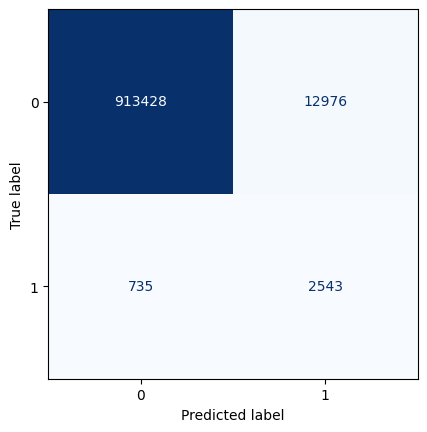

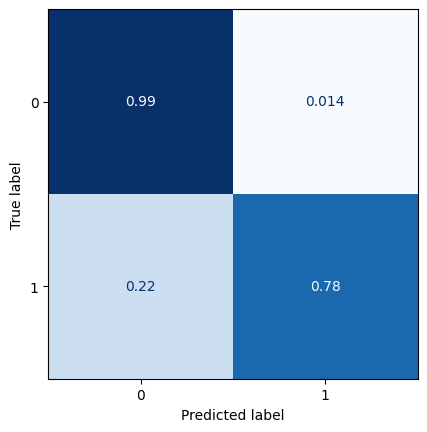

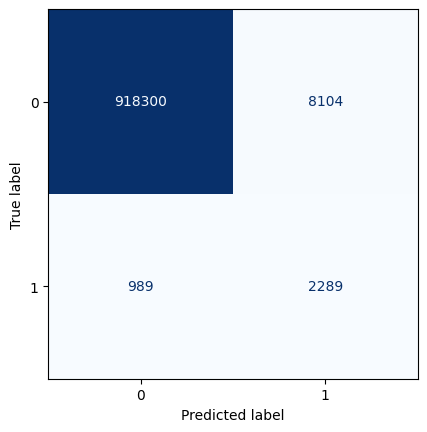

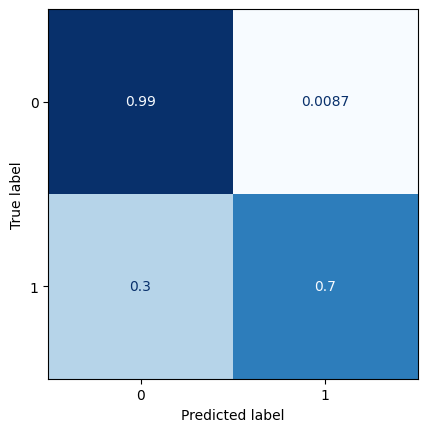

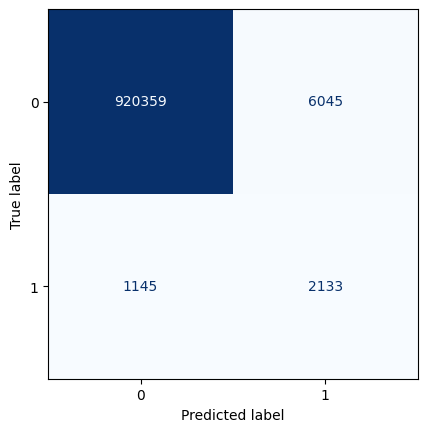

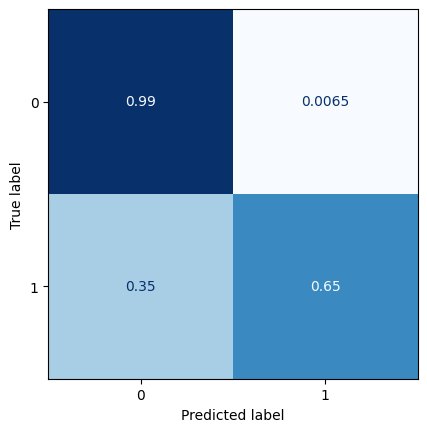

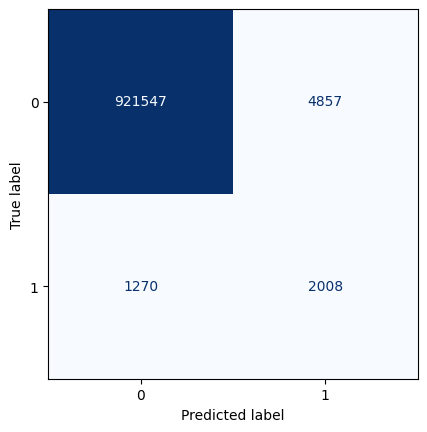

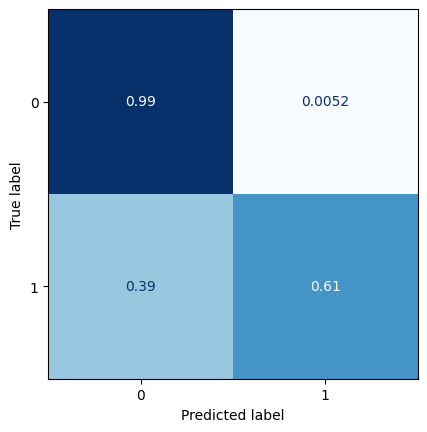

In [16]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    t = model.predict(test_img_std)
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

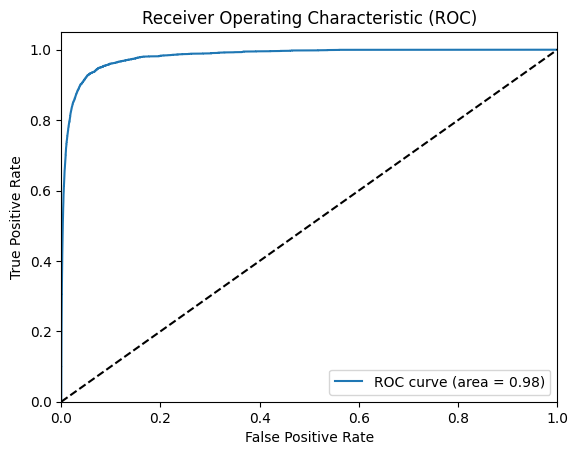

In [17]:
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

8


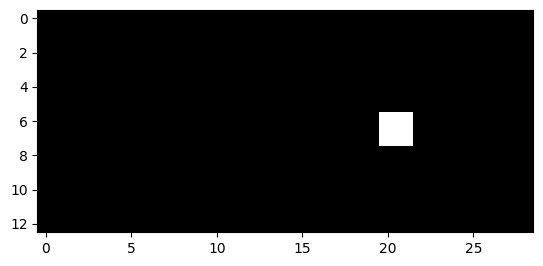

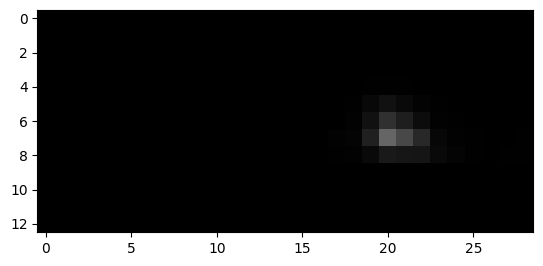

9


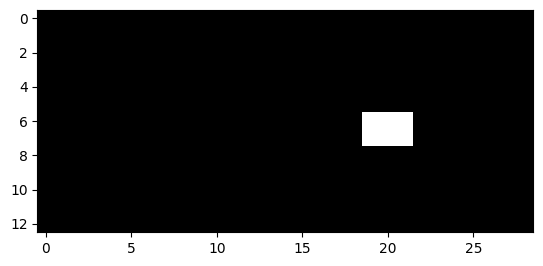

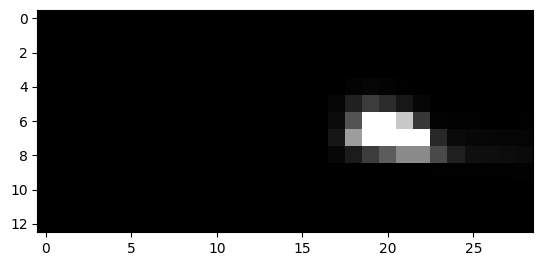

10


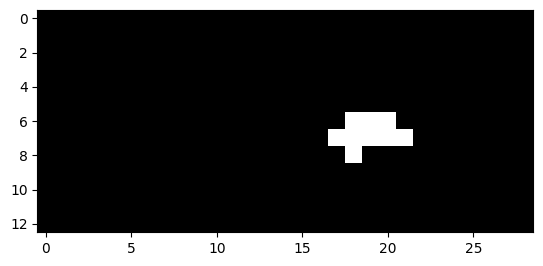

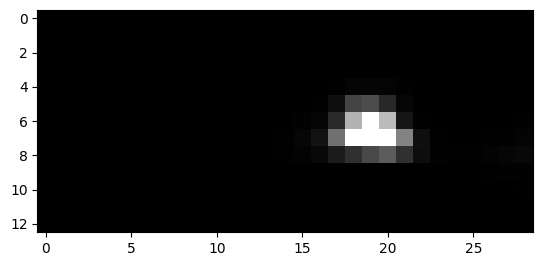

11


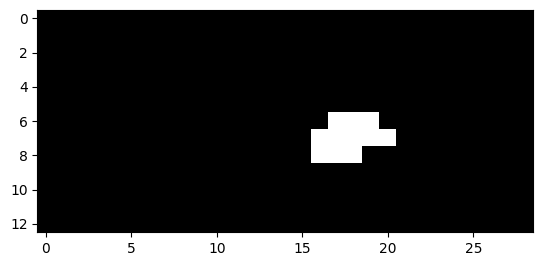

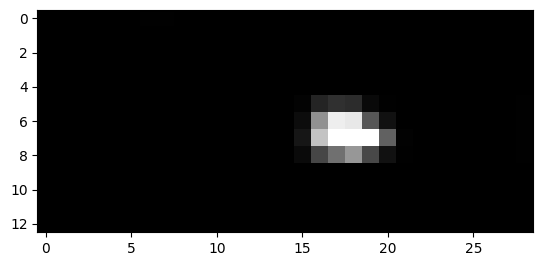

12


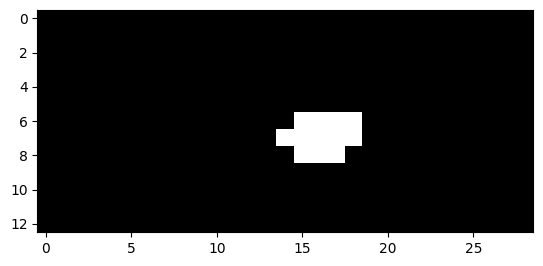

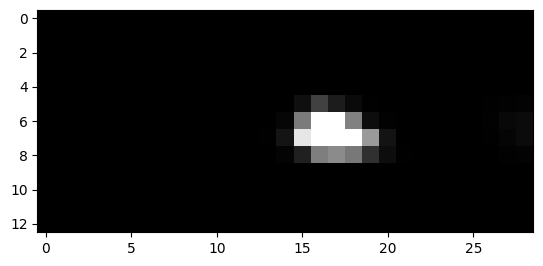

13


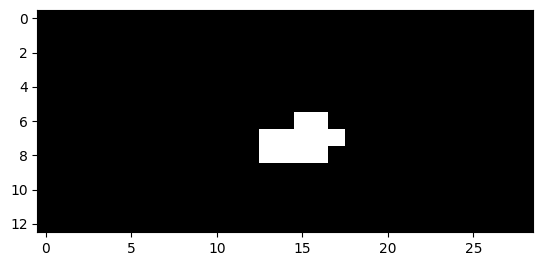

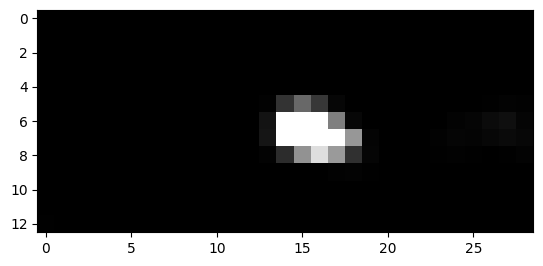

14


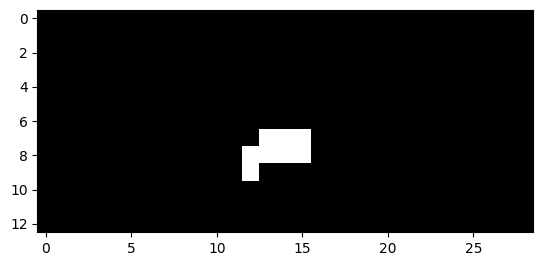

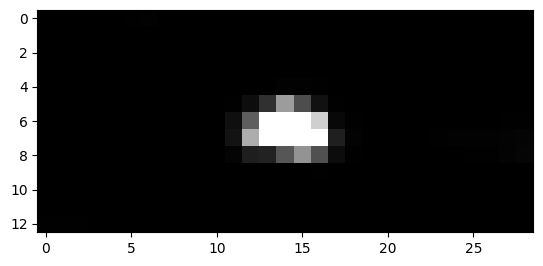

15


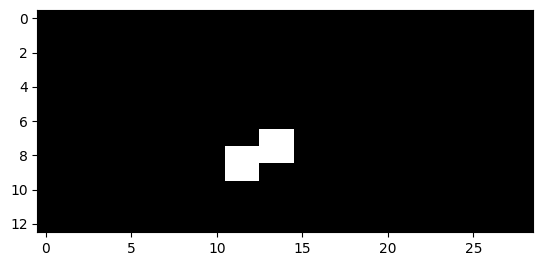

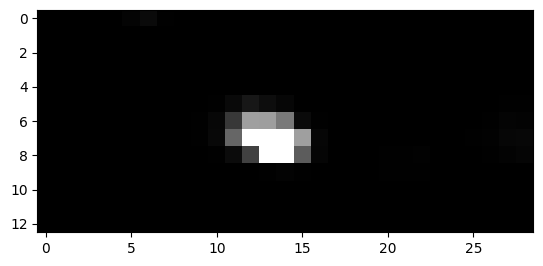

16


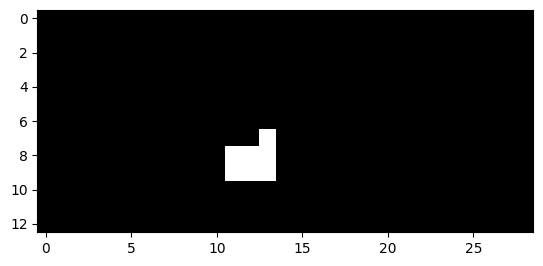

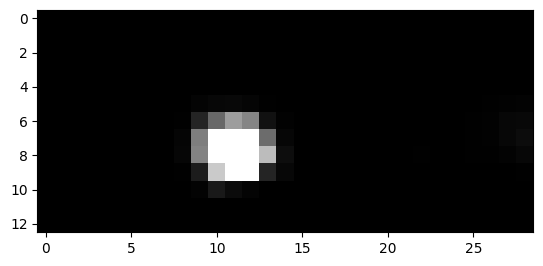

17


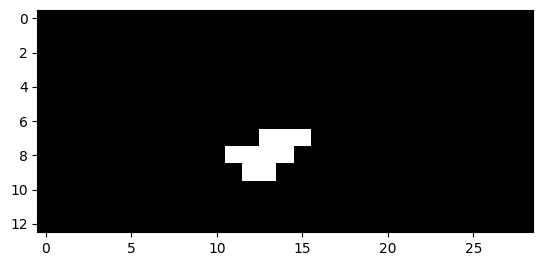

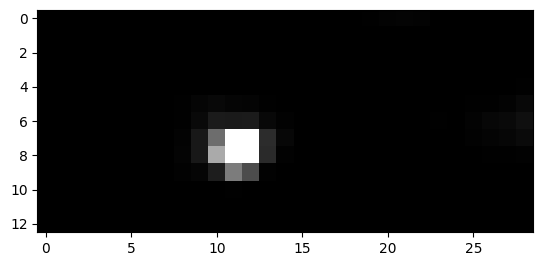

18


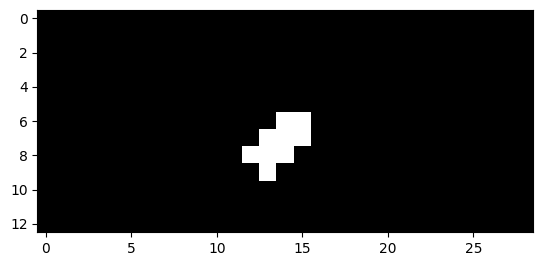

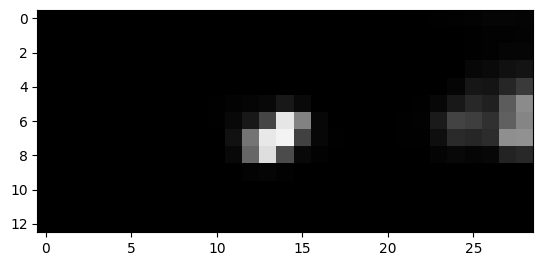

19


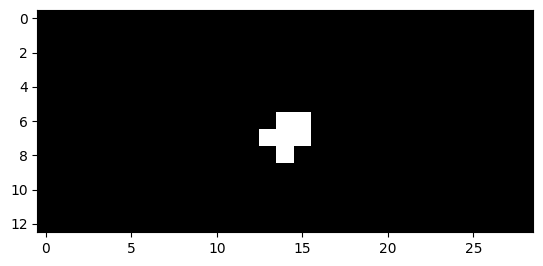

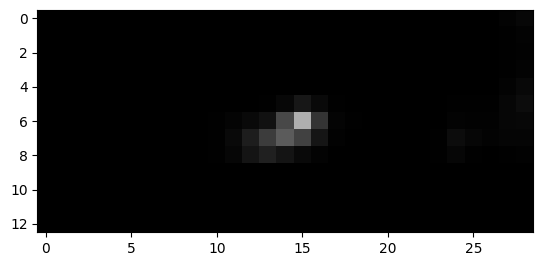

20


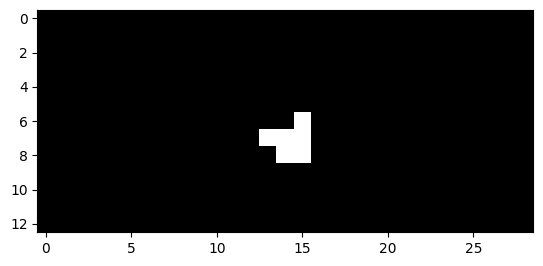

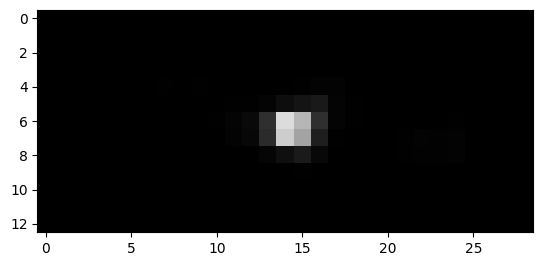

21


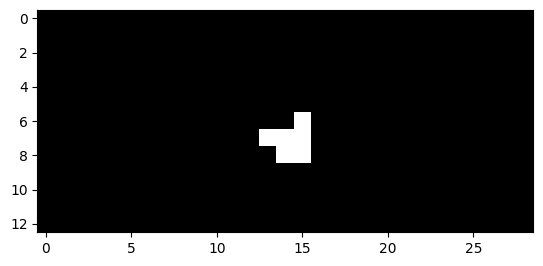

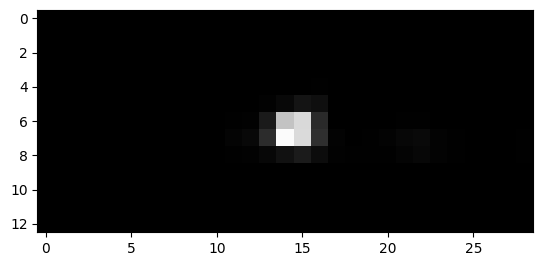

104


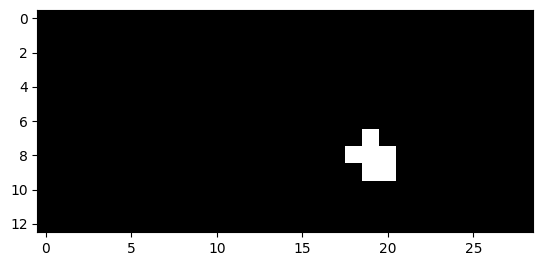

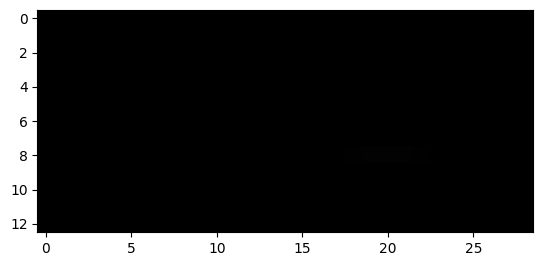

105


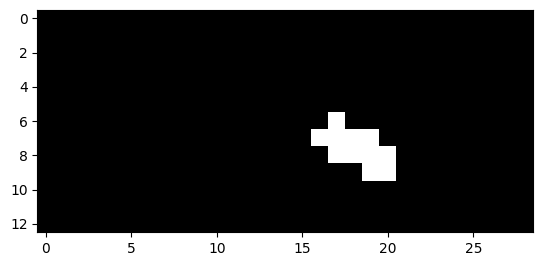

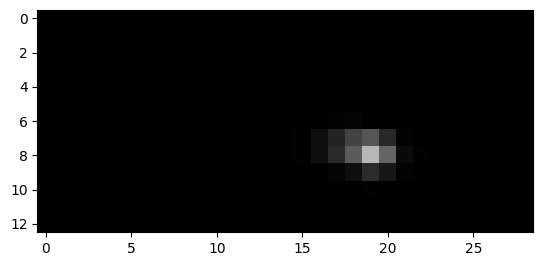

106


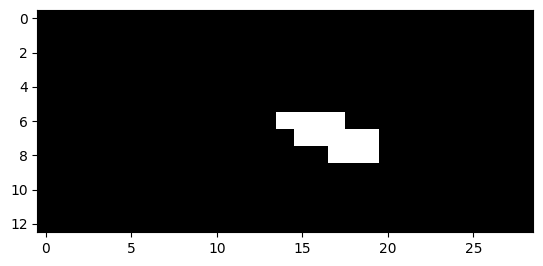

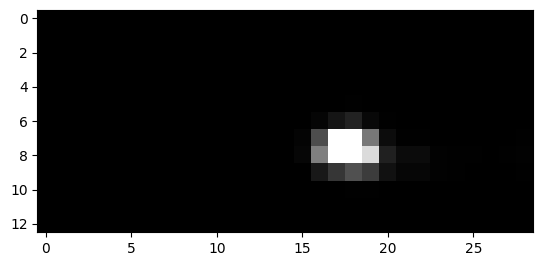

107


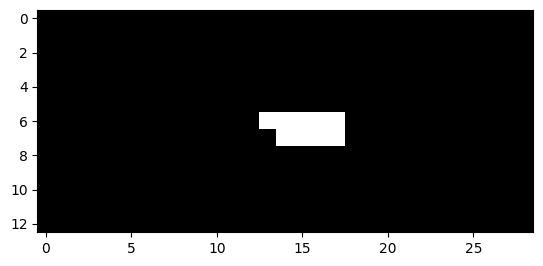

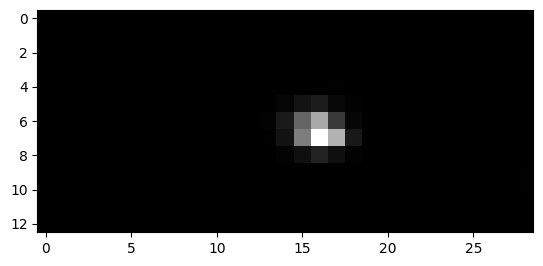

108


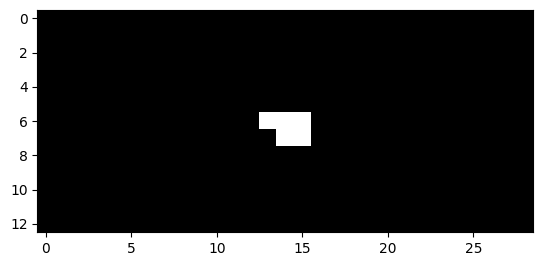

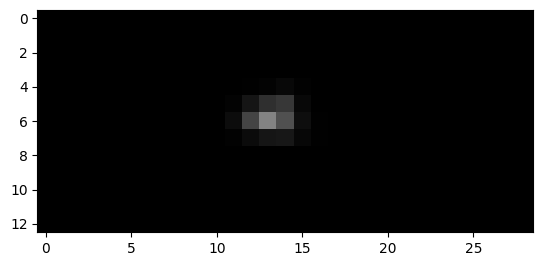

183


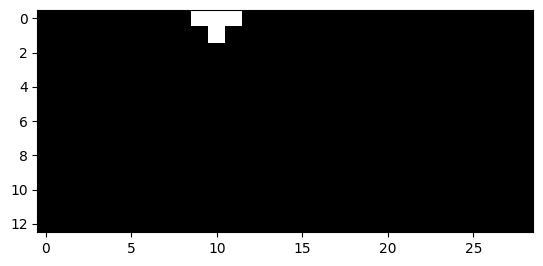

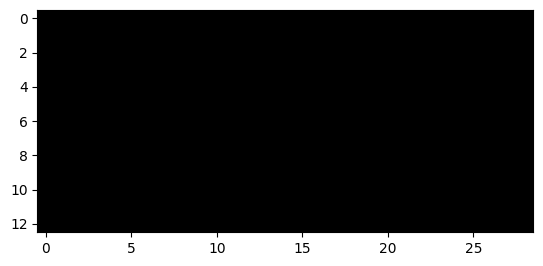

184


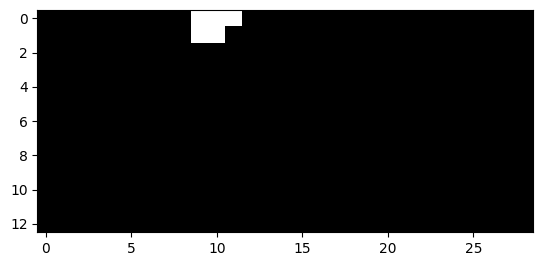

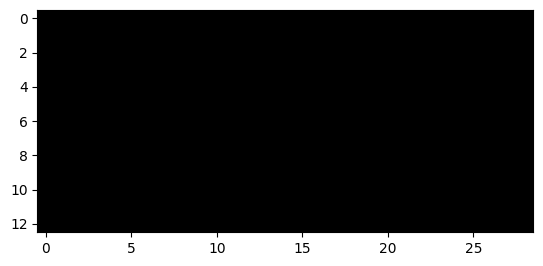

185


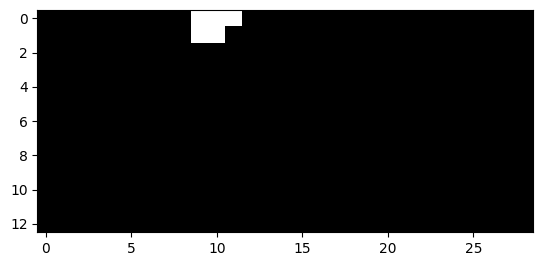

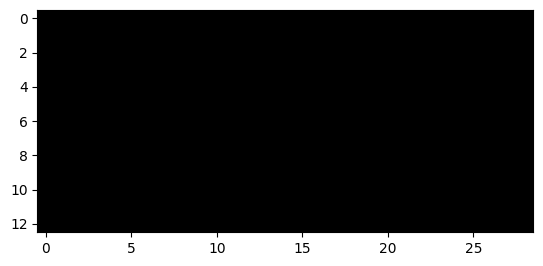

186


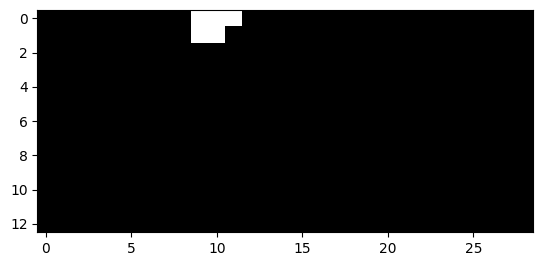

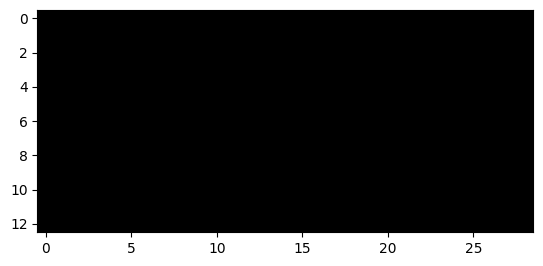

187


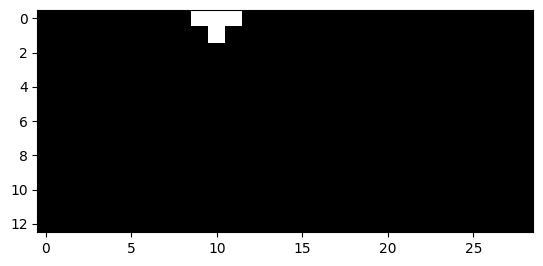

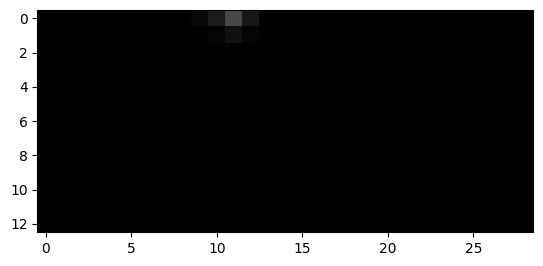

307


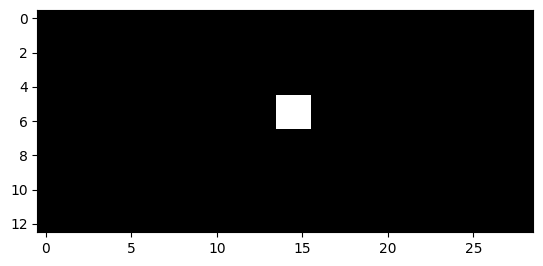

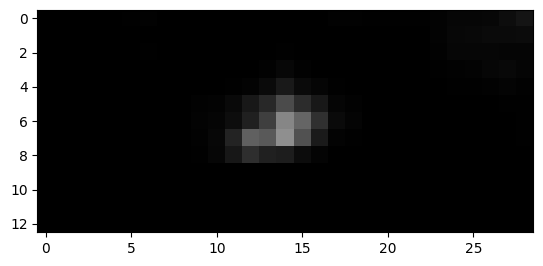

308


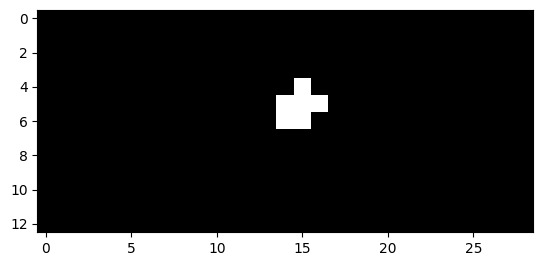

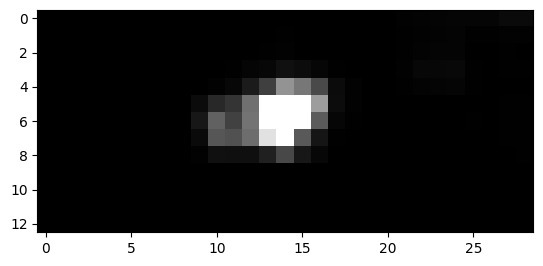

309


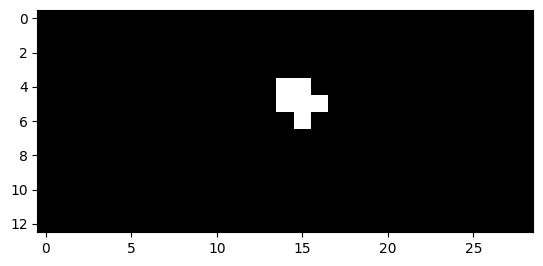

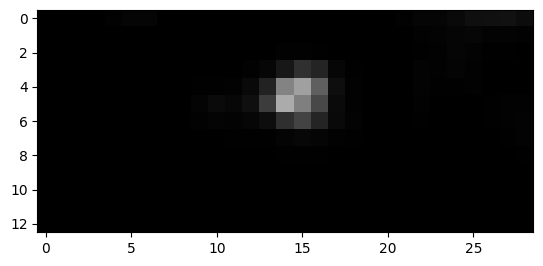

310


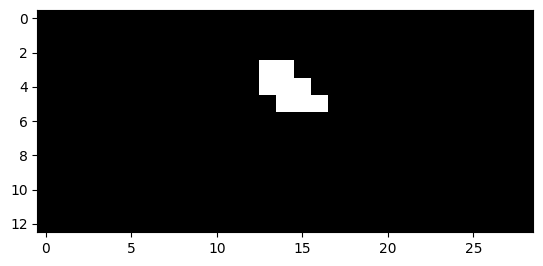

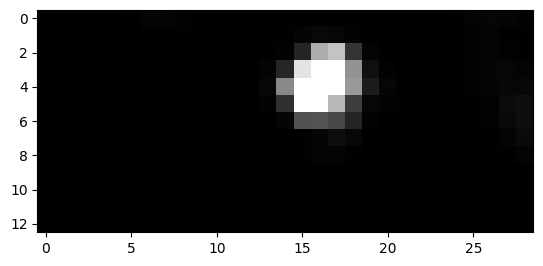

311


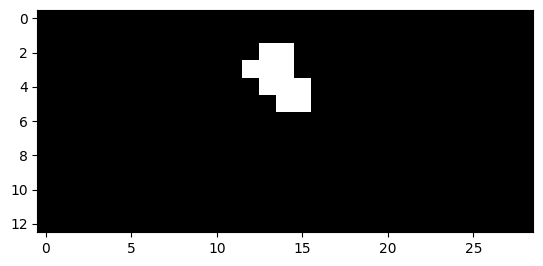

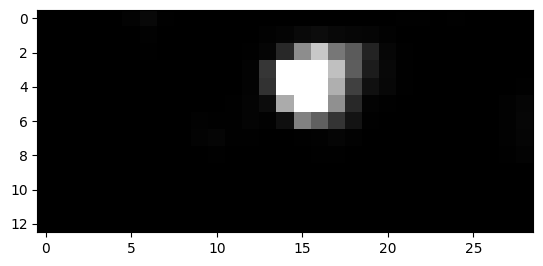

312


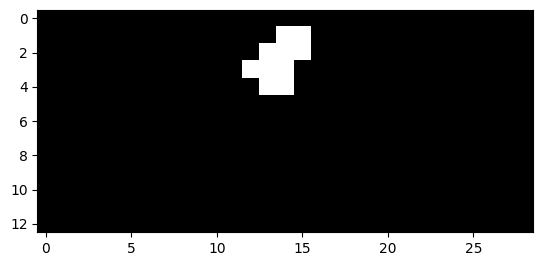

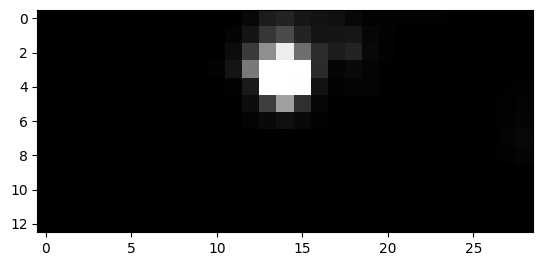

313


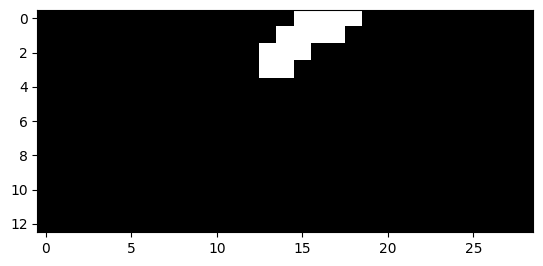

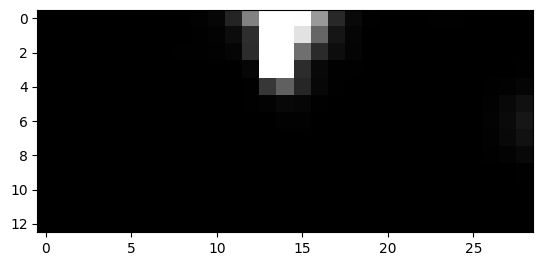

314


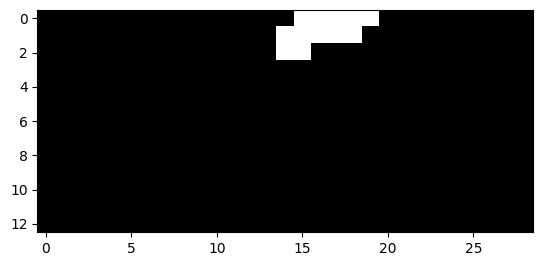

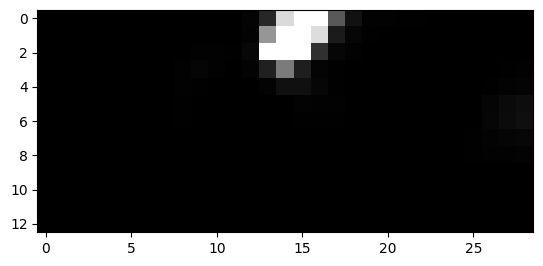

315


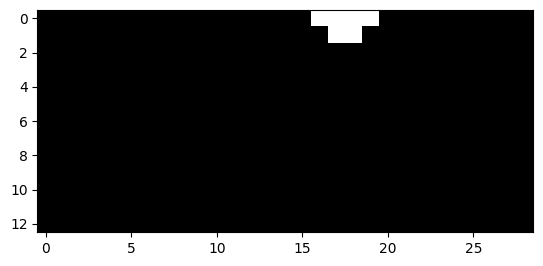

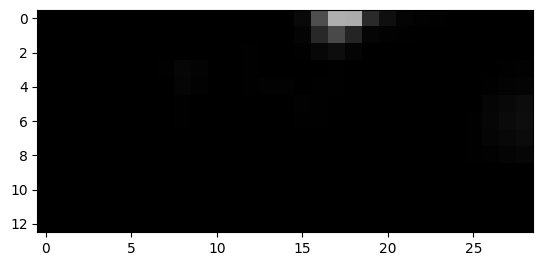

316


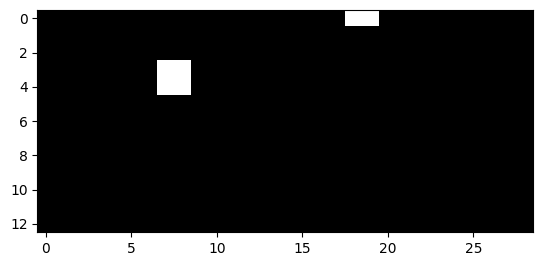

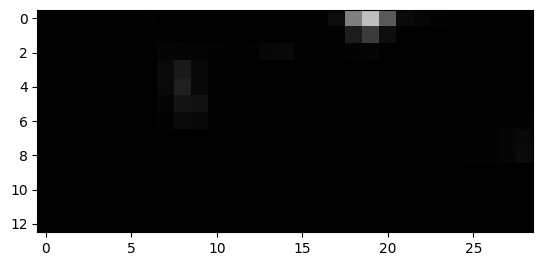

317


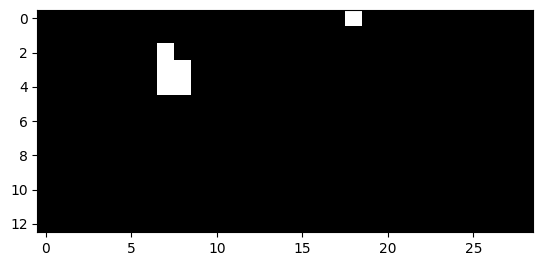

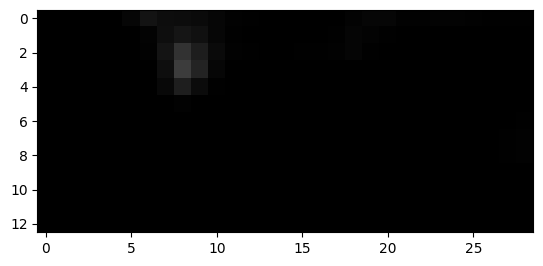

318


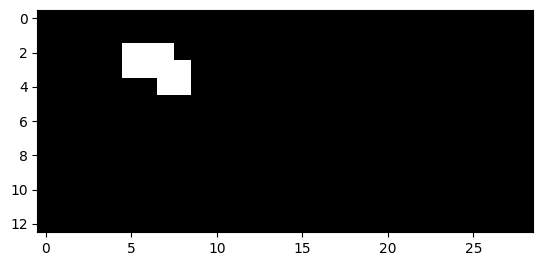

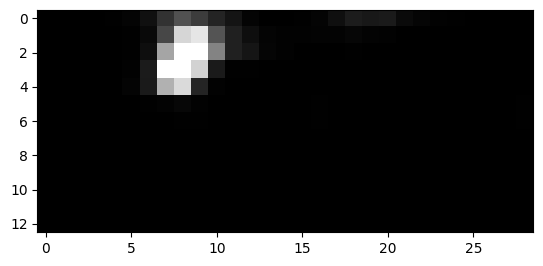

319


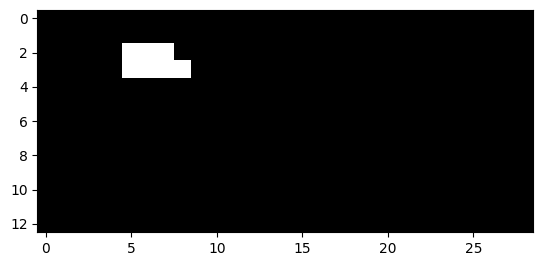

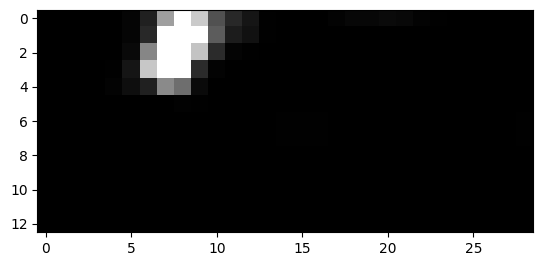

320


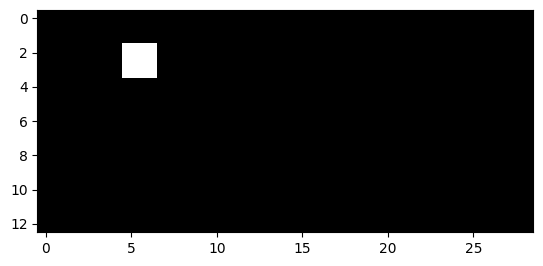

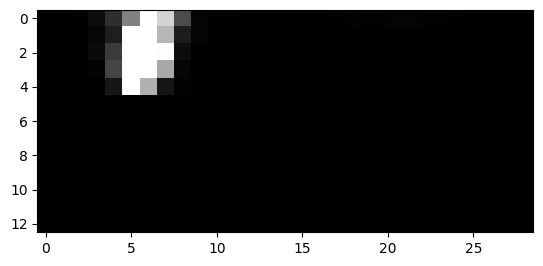

334


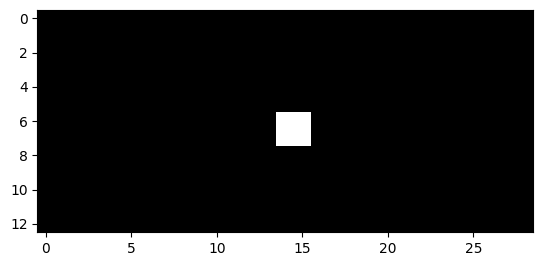

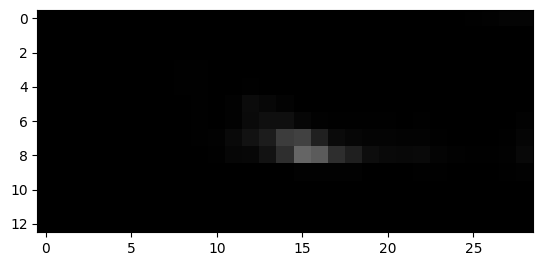

335


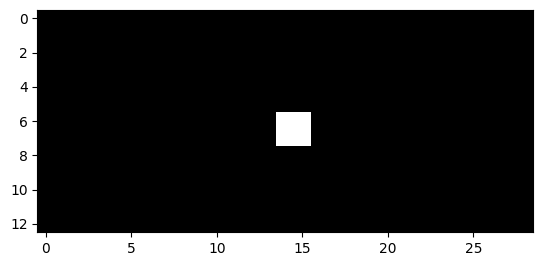

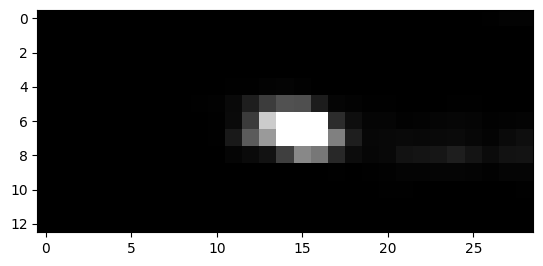

336


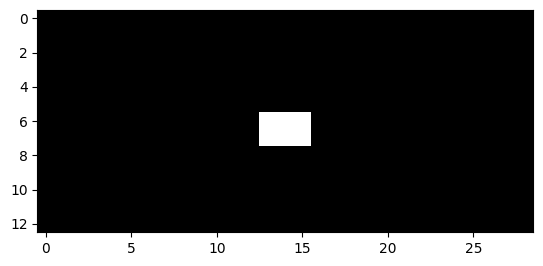

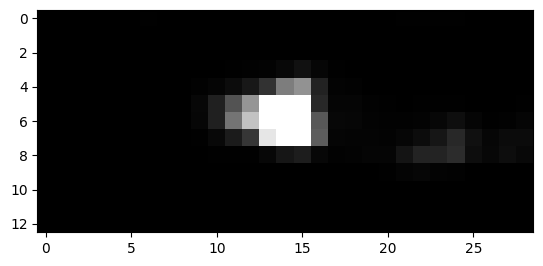

337


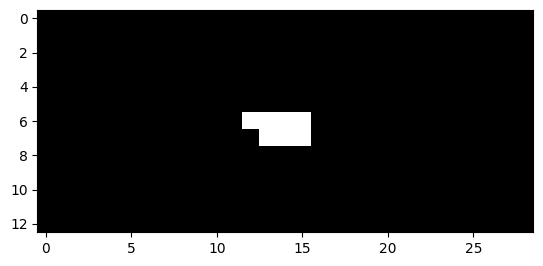

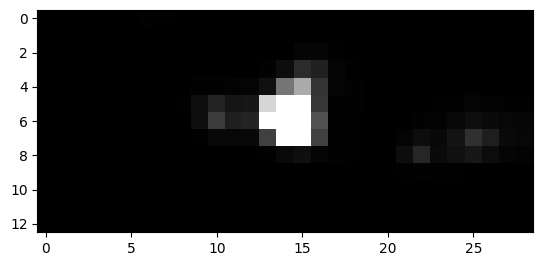

338


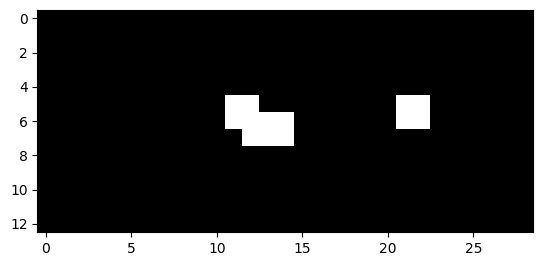

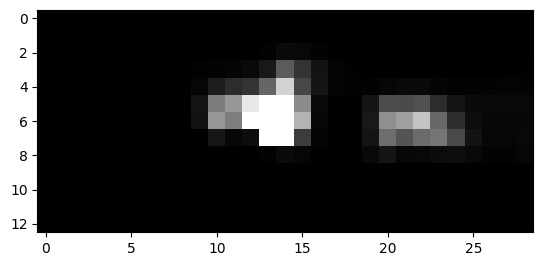

339


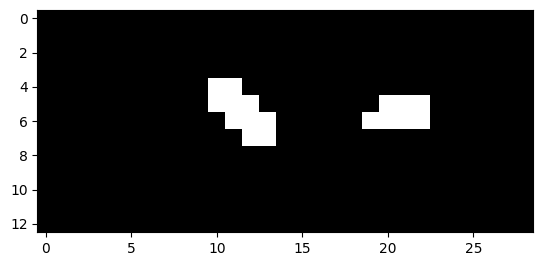

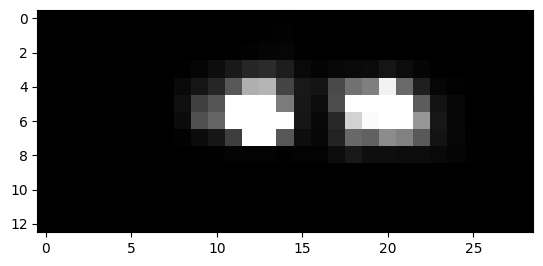

340


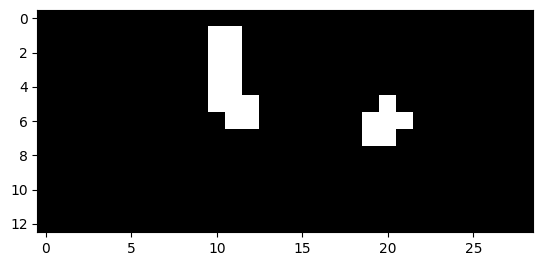

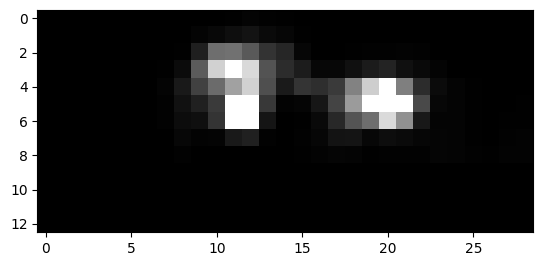

341


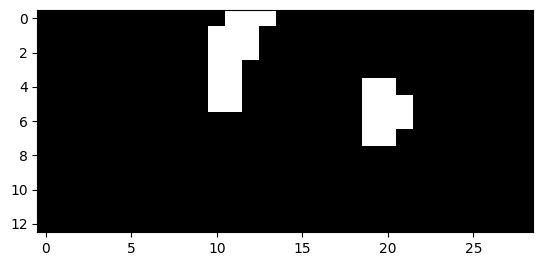

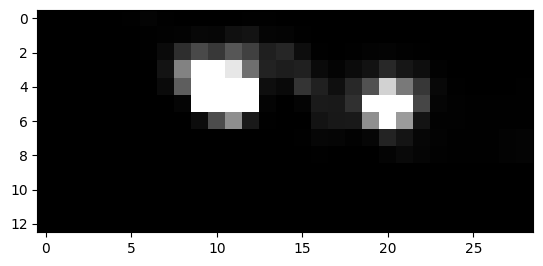

342


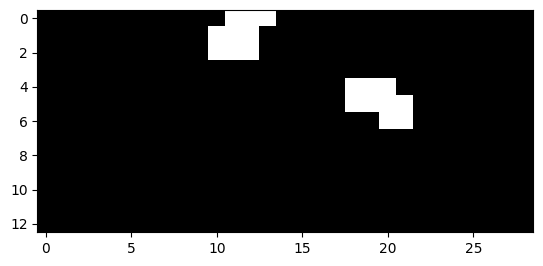

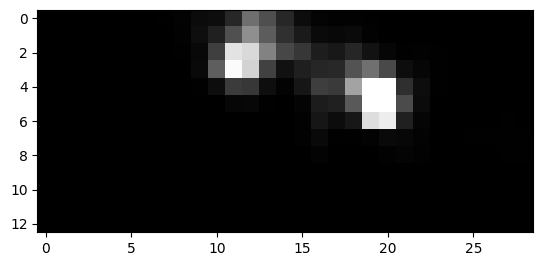

343


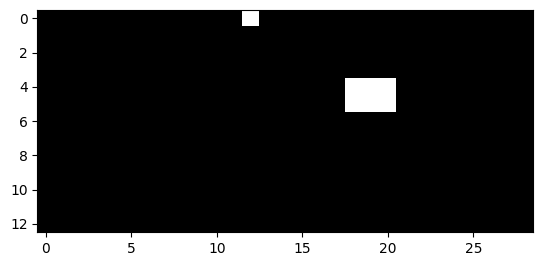

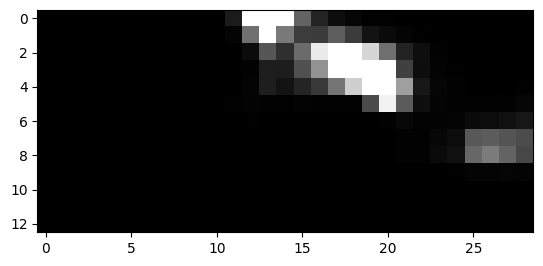

345


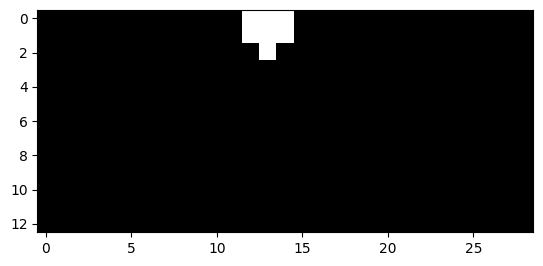

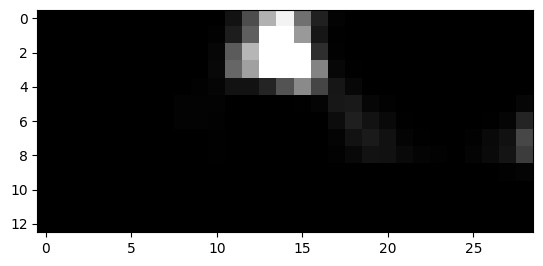

346


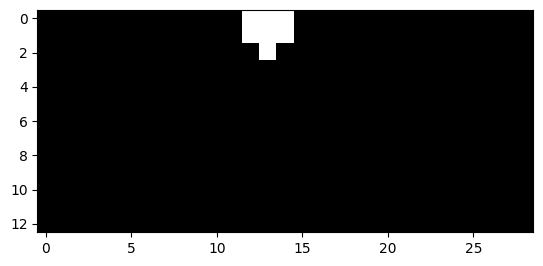

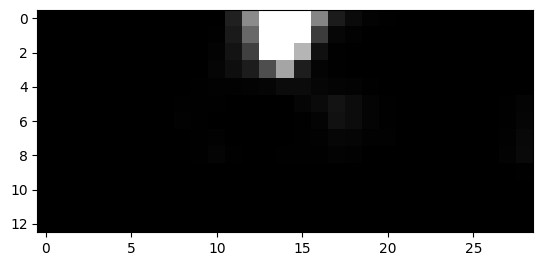

347


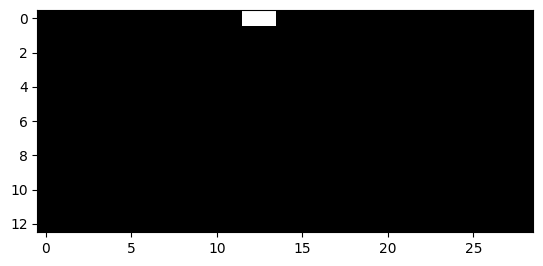

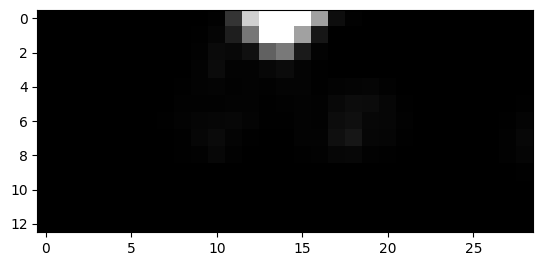

639


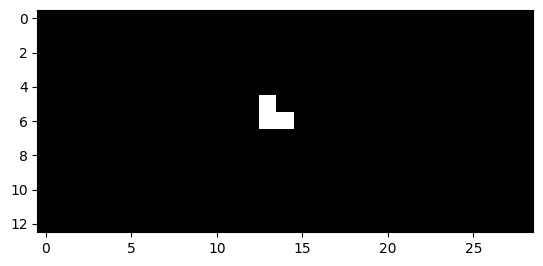

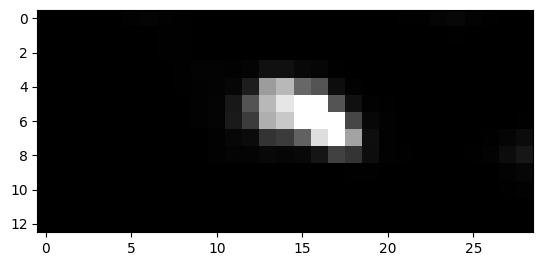

640


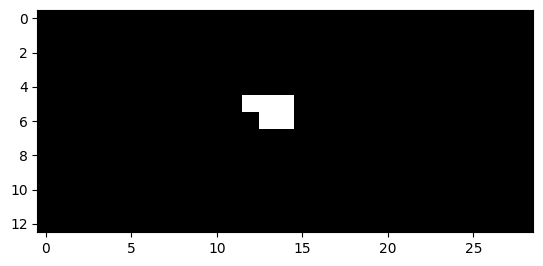

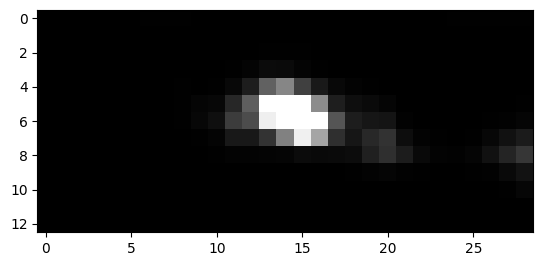

641


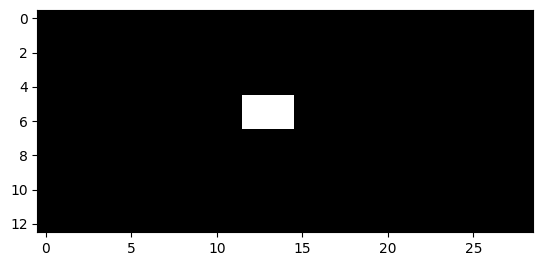

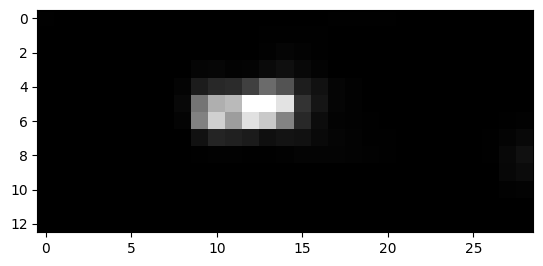

642


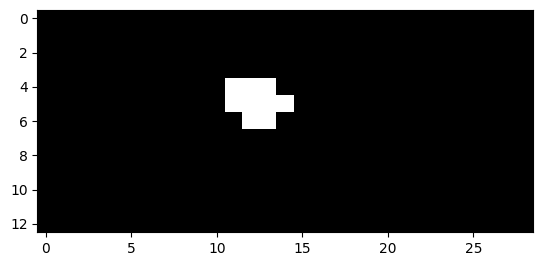

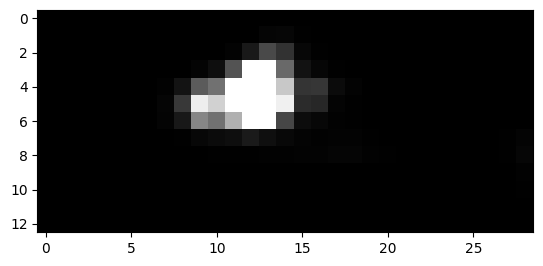

643


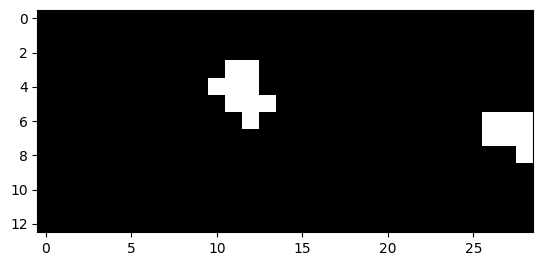

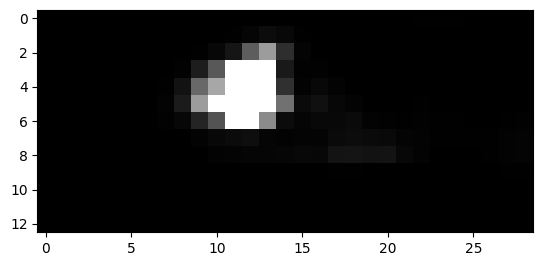

644


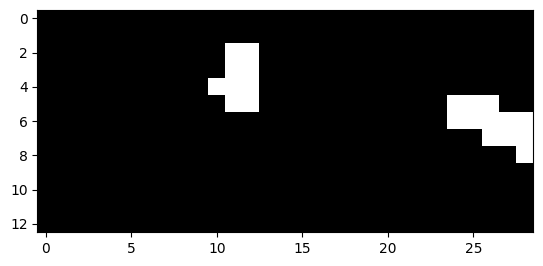

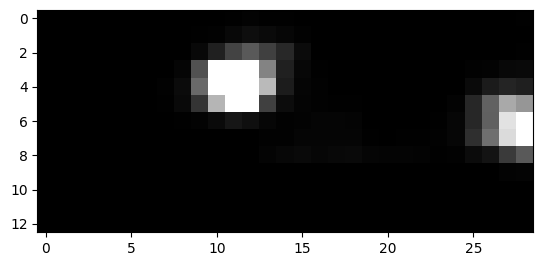

645


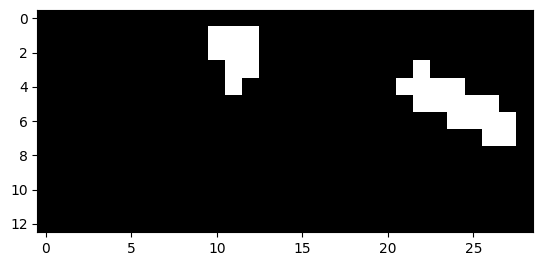

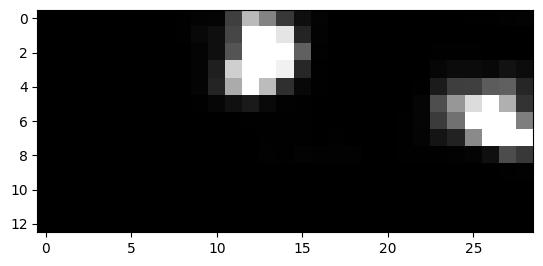

646


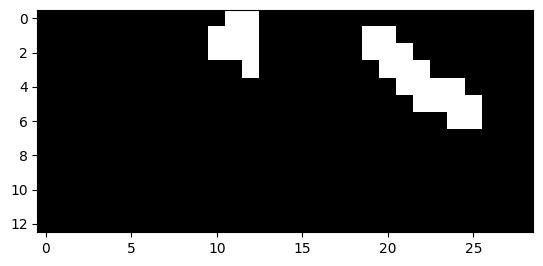

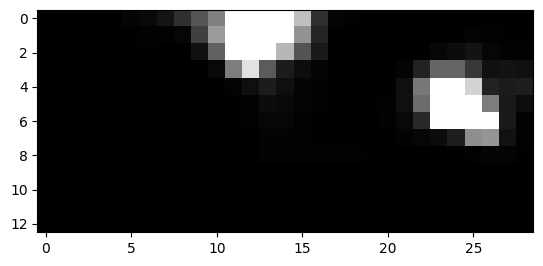

647


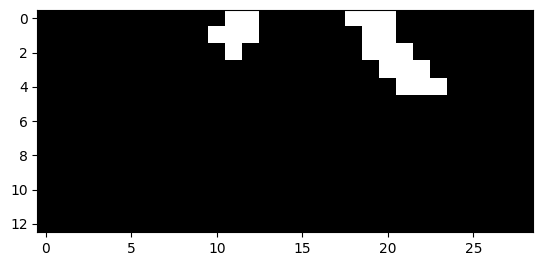

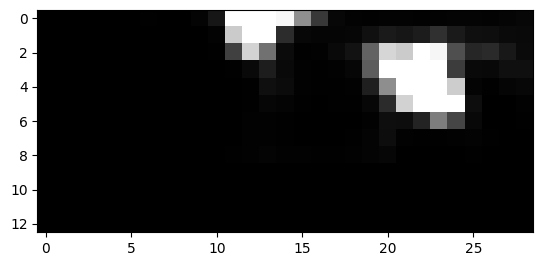

648


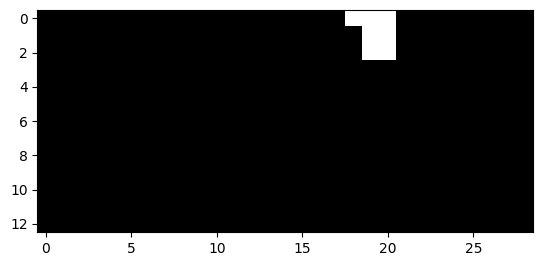

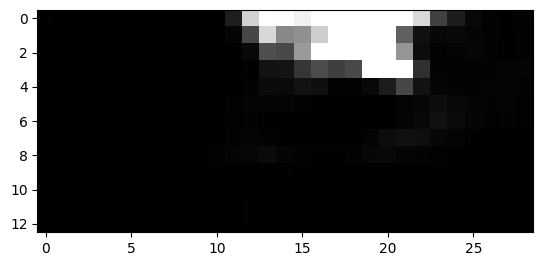

650


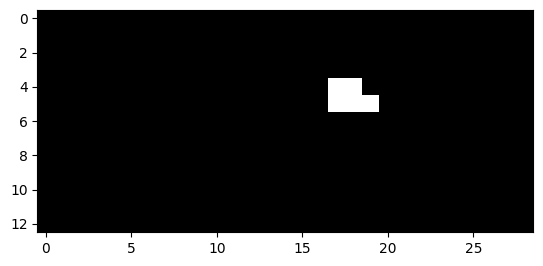

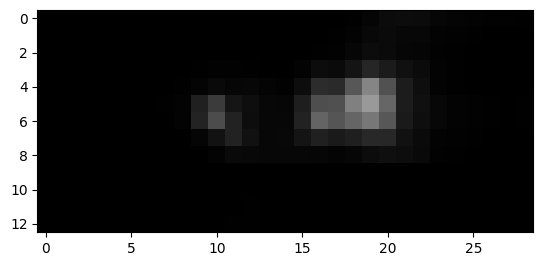

651


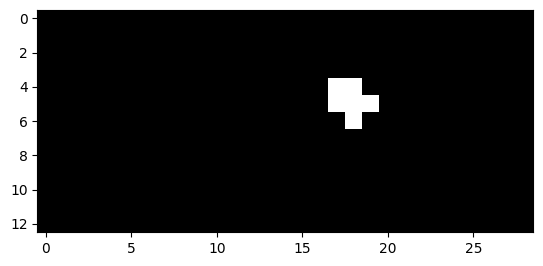

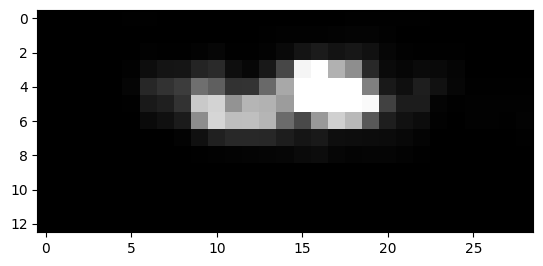

652


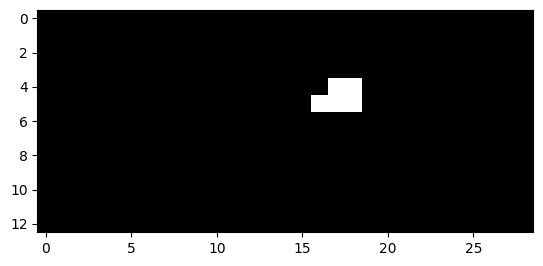

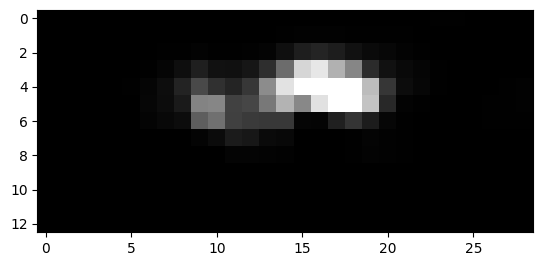

653


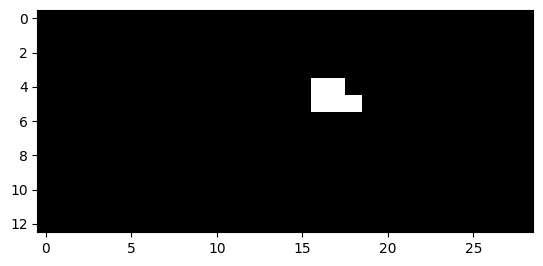

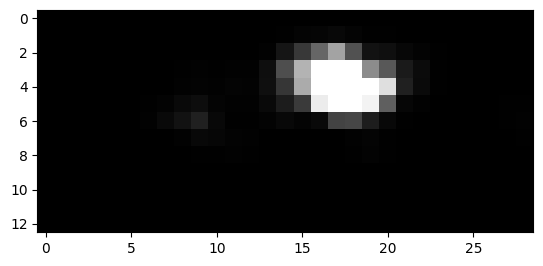

654


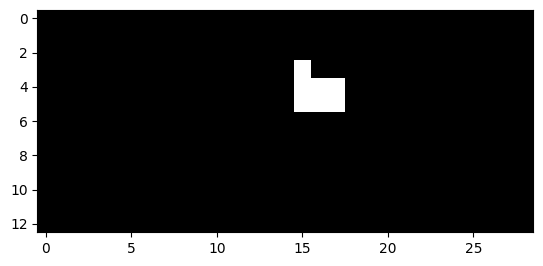

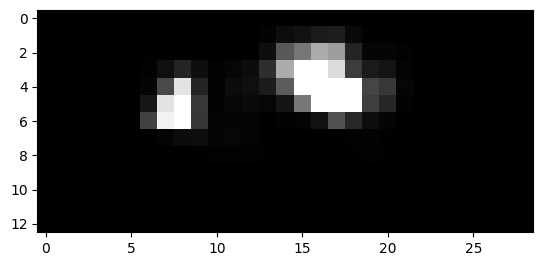

655


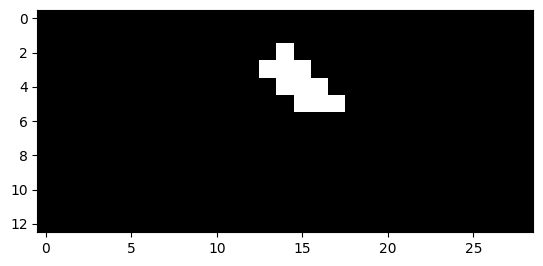

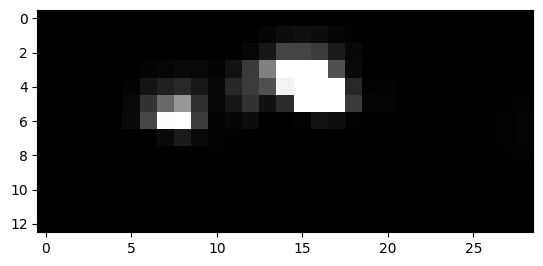

656


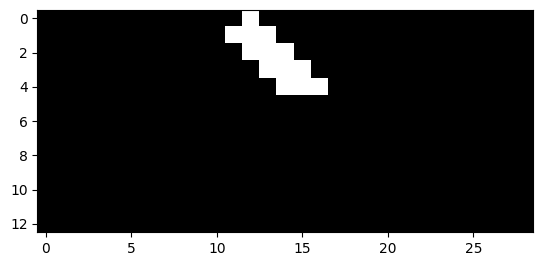

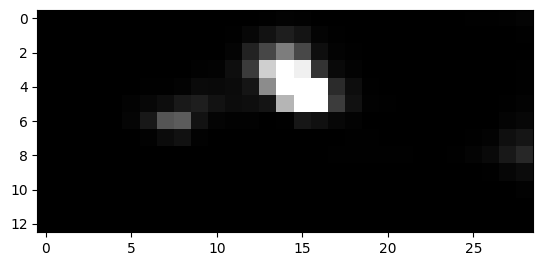

657


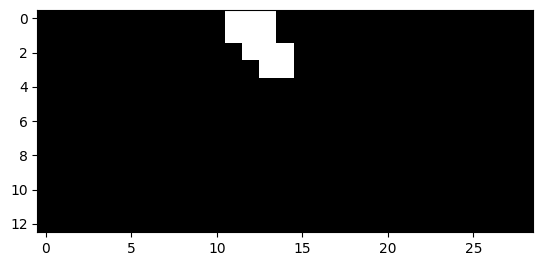

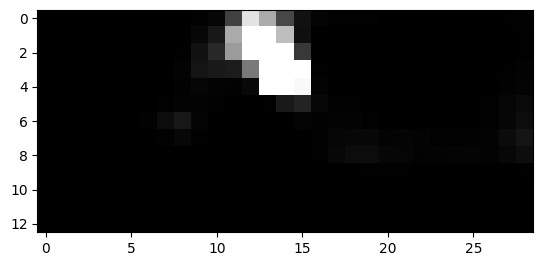

658


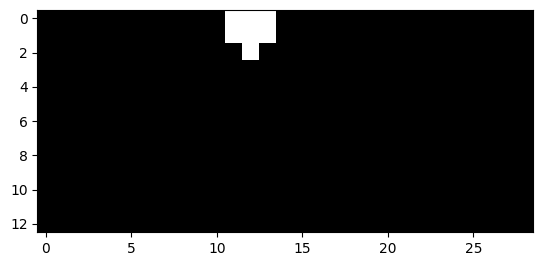

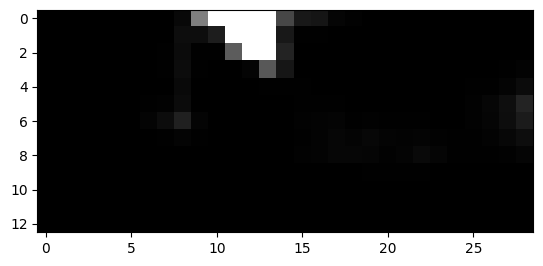

664


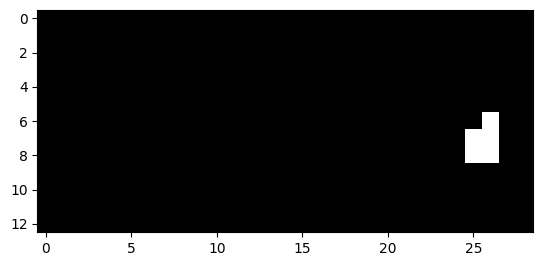

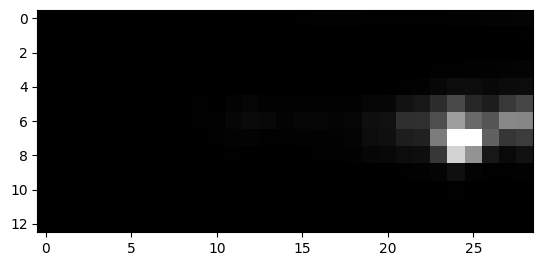

665


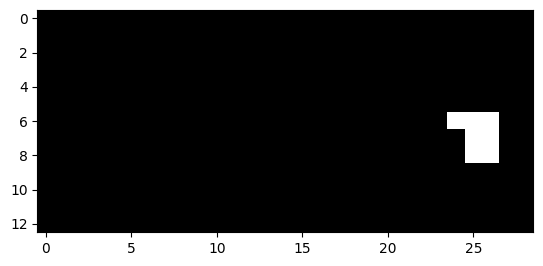

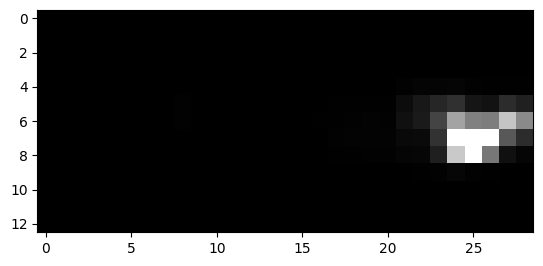

666


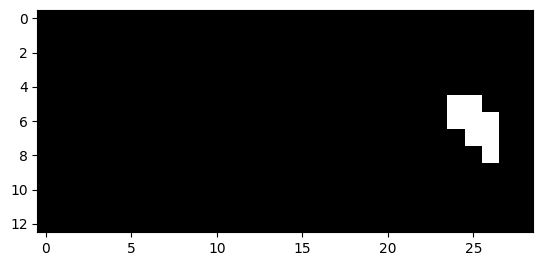

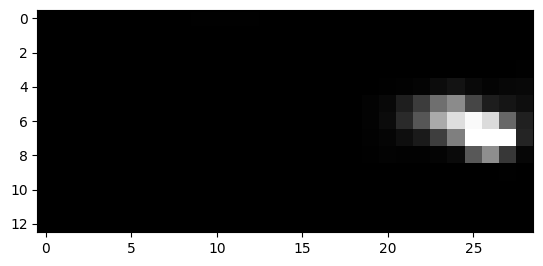

667


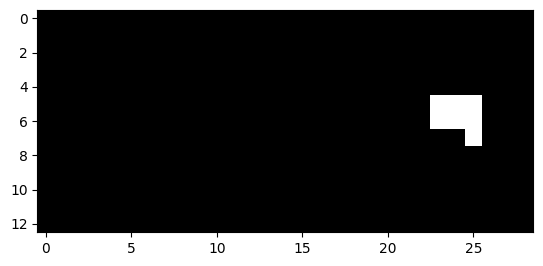

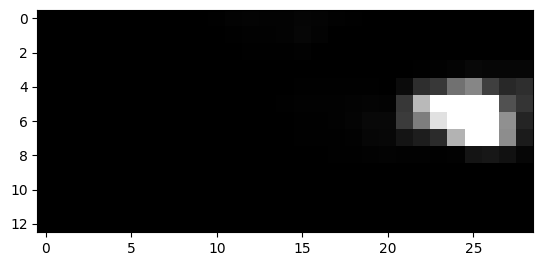

668


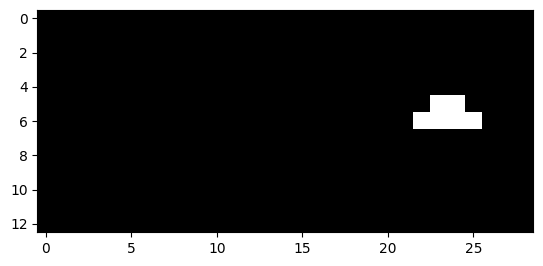

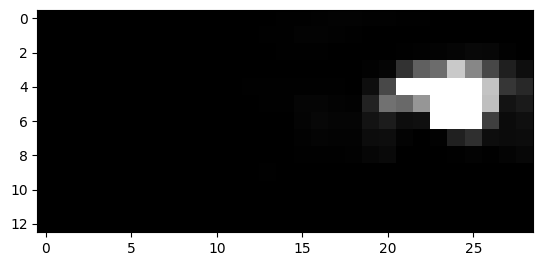

669


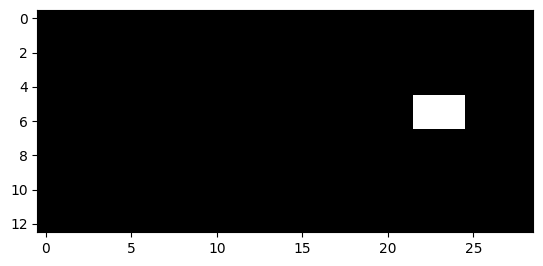

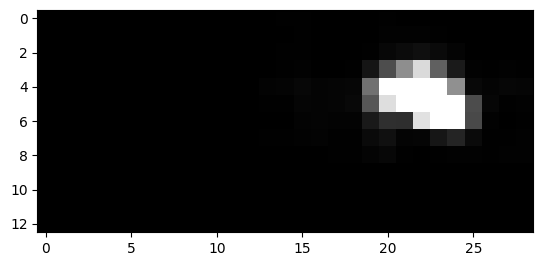

670


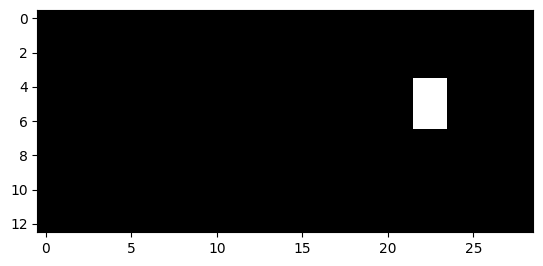

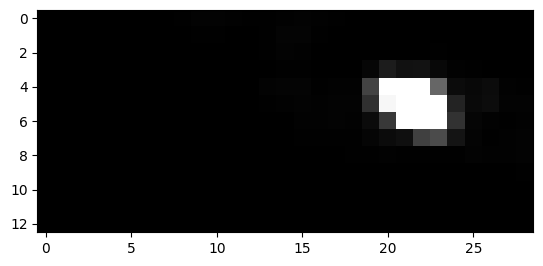

671


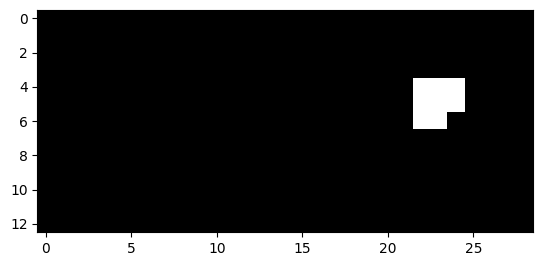

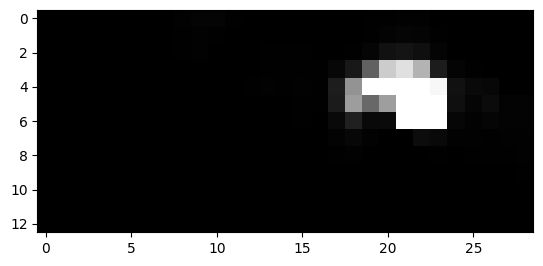

672


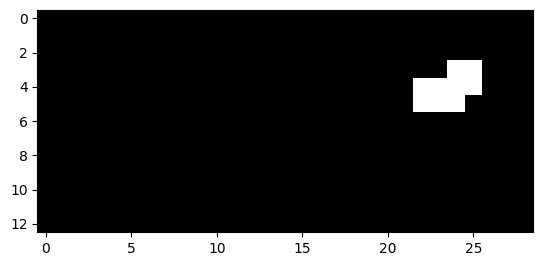

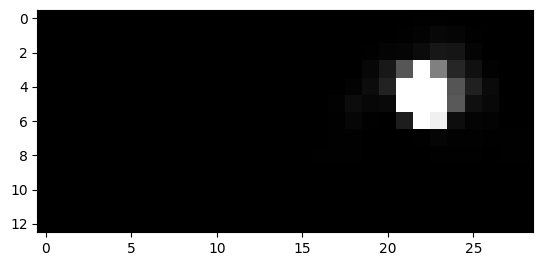

673


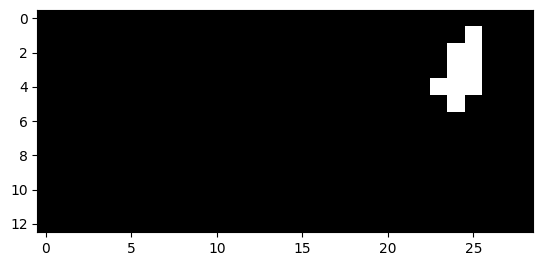

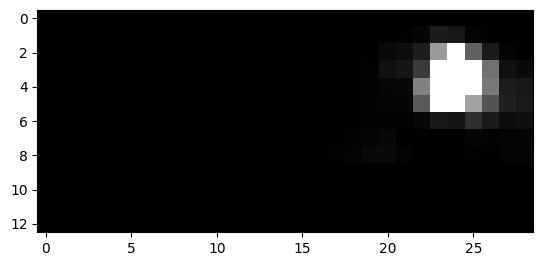

674


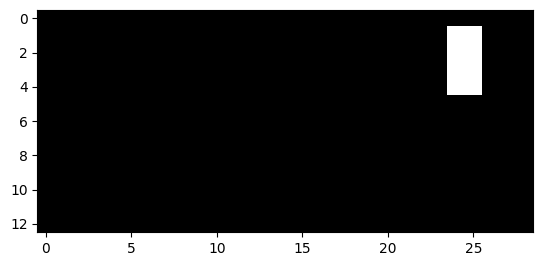

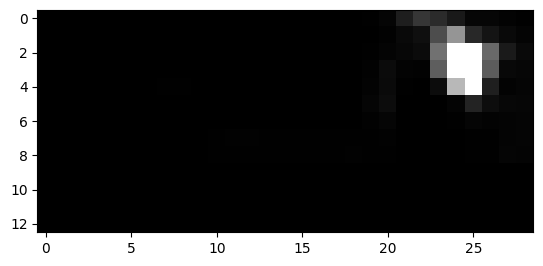

675


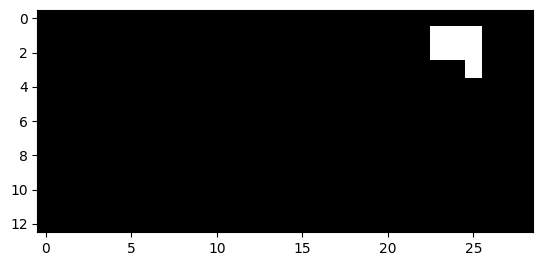

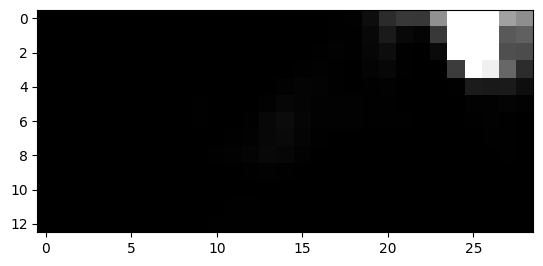

676


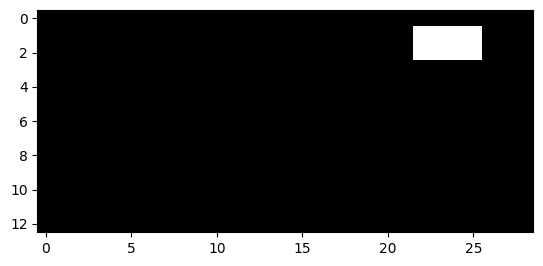

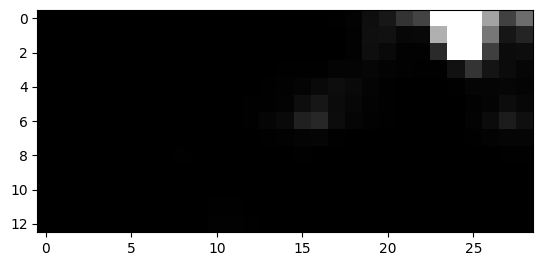

677


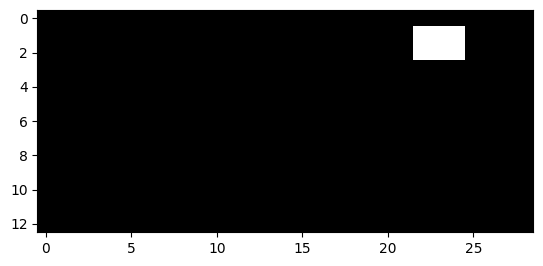

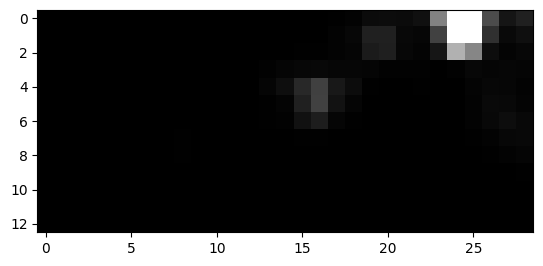

698


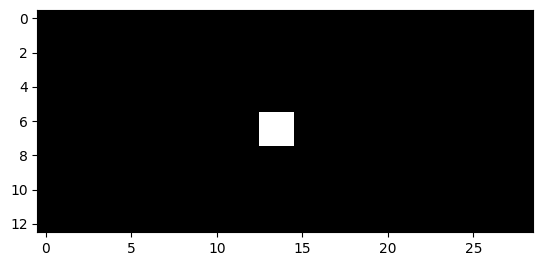

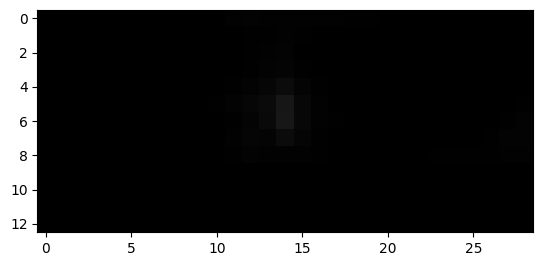

699


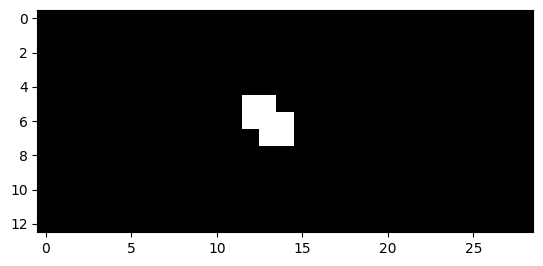

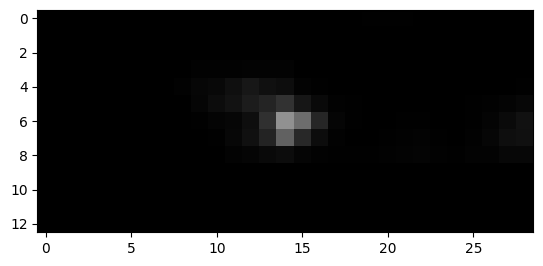

700


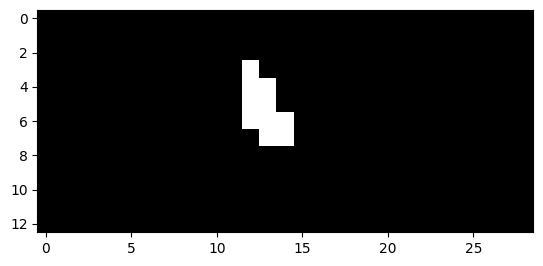

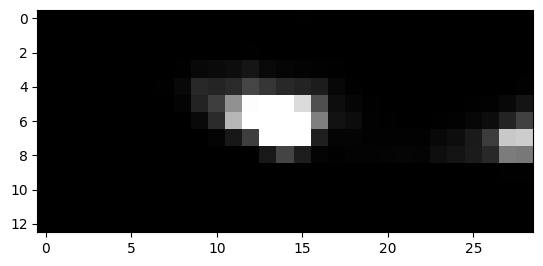

701


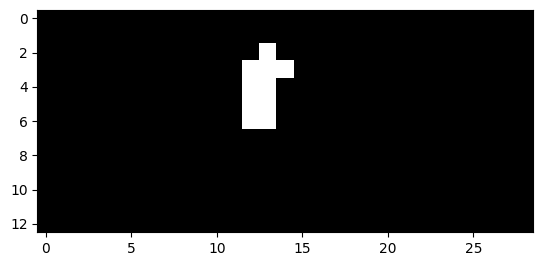

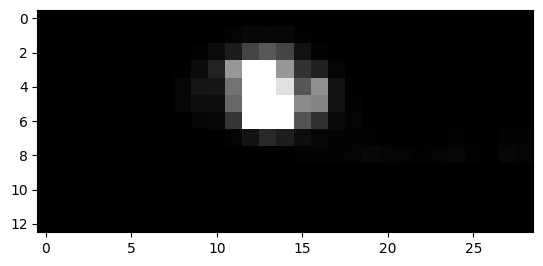

702


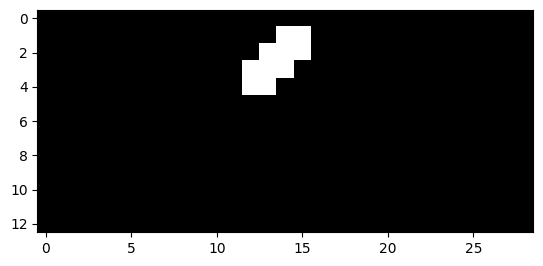

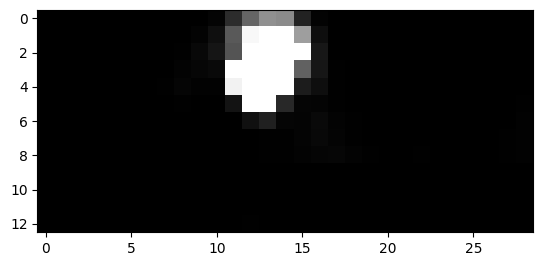

703


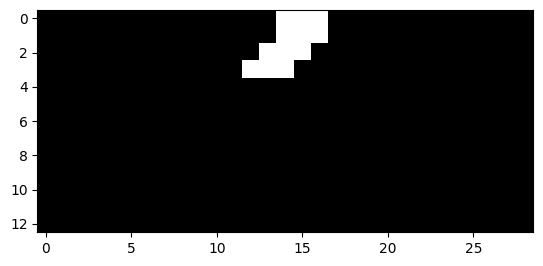

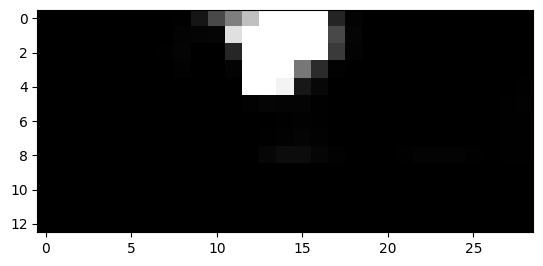

704


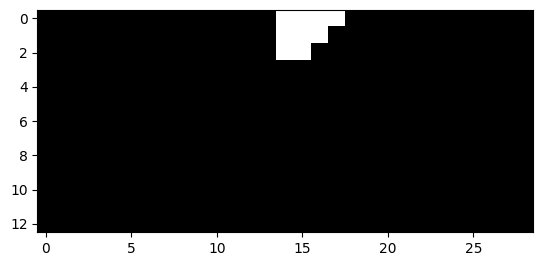

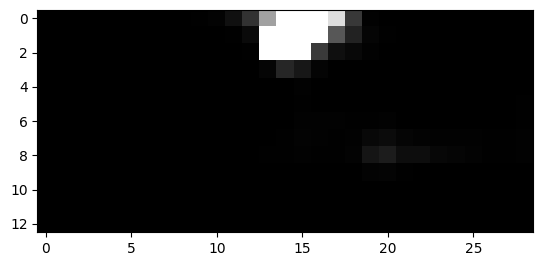

705


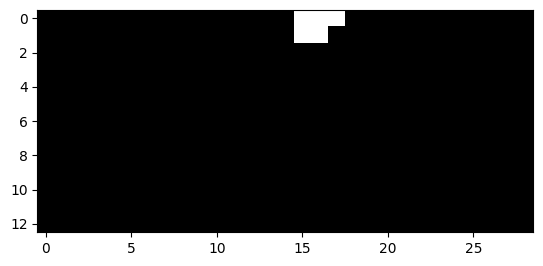

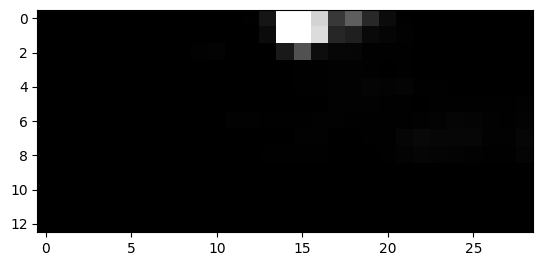

710


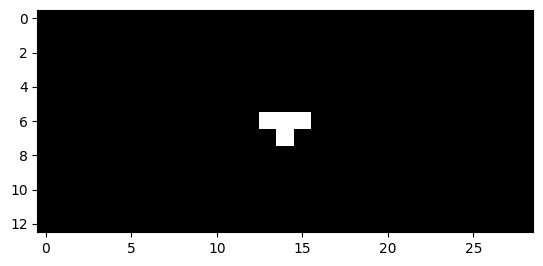

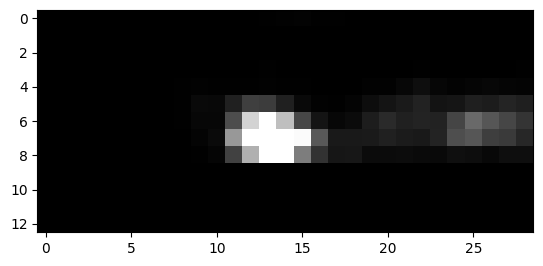

711


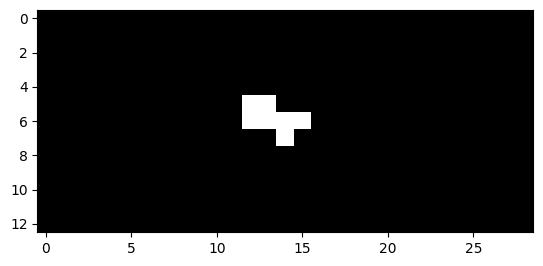

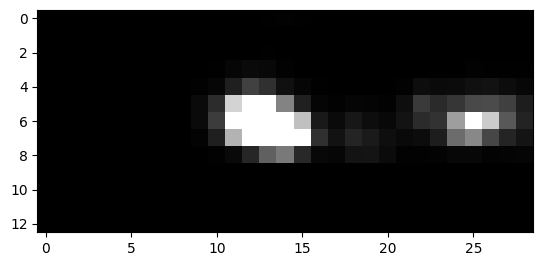

712


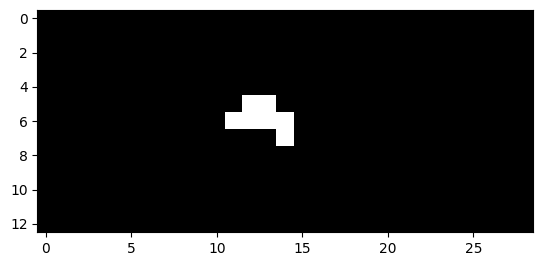

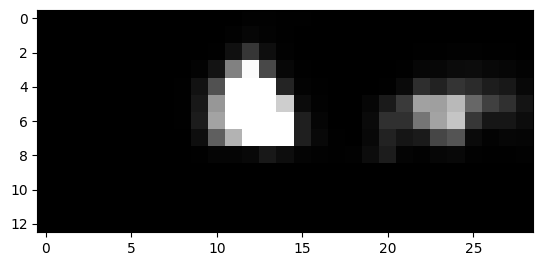

713


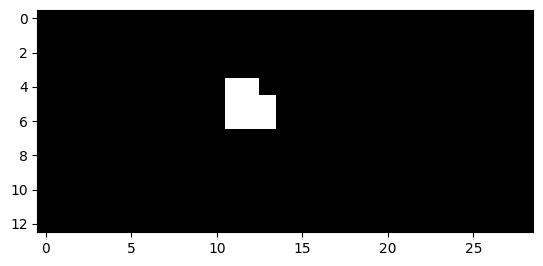

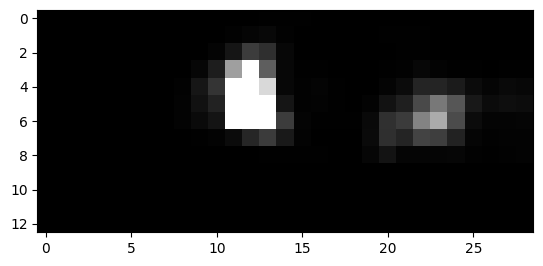

714


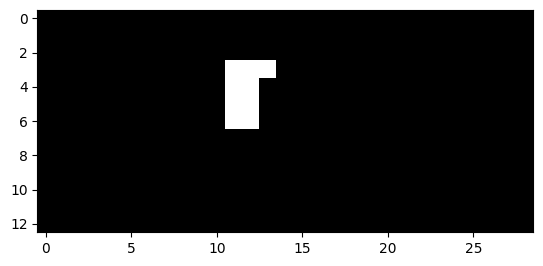

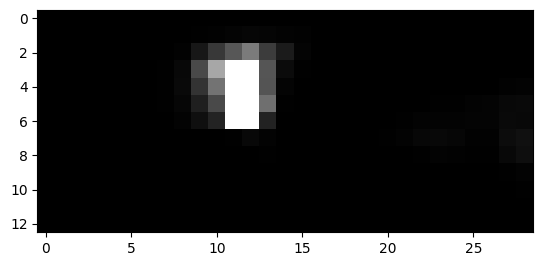

715


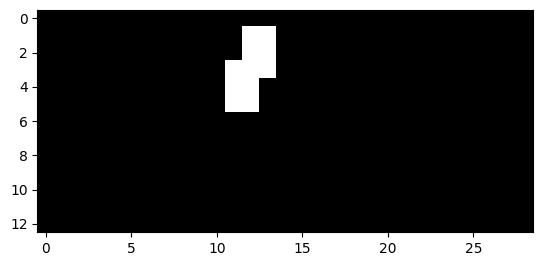

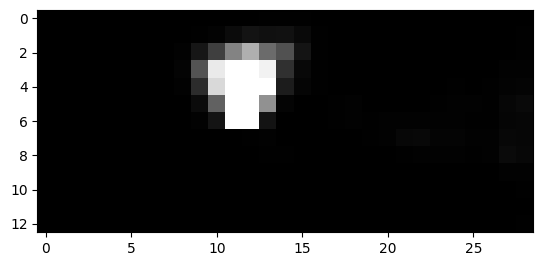

716


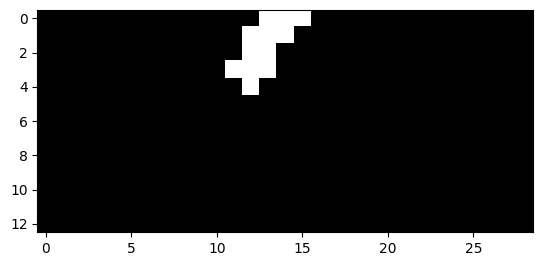

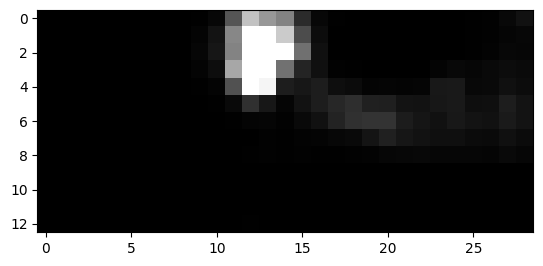

717


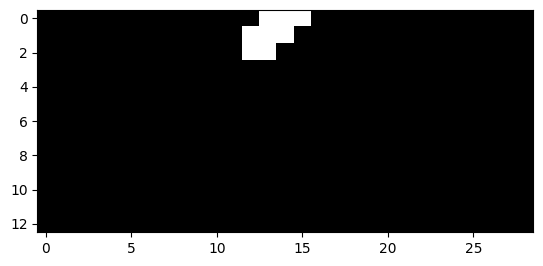

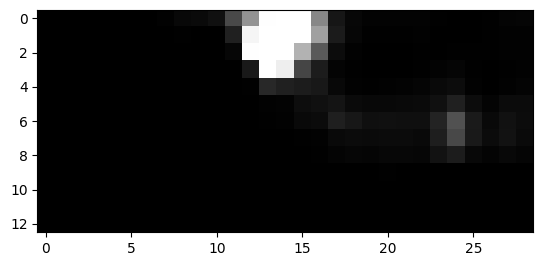

718


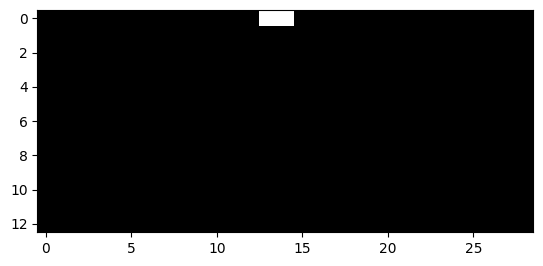

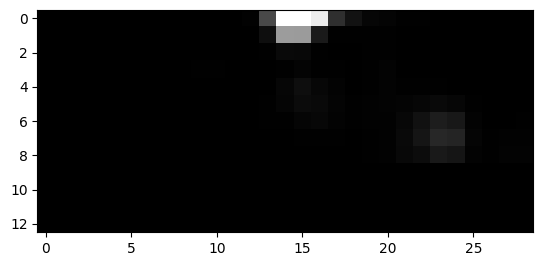

750


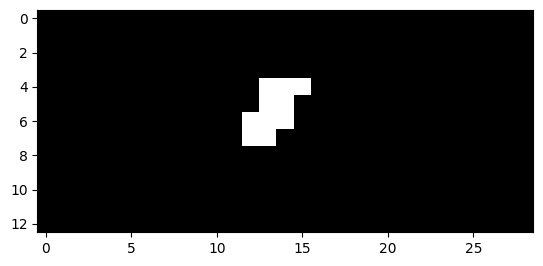

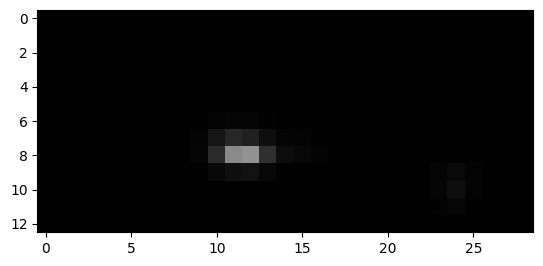

751


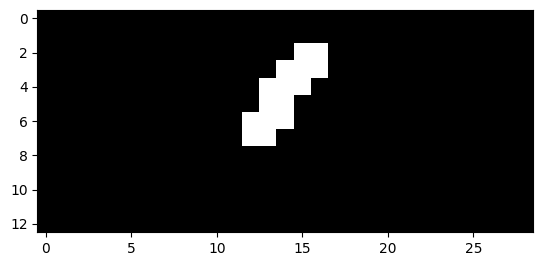

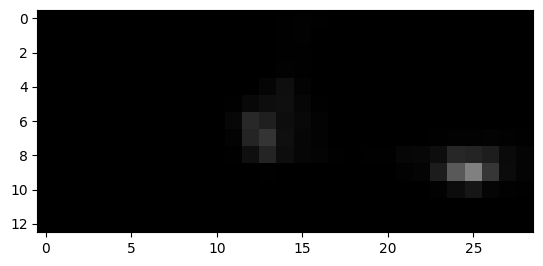

752


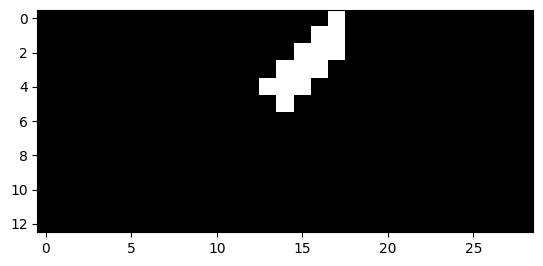

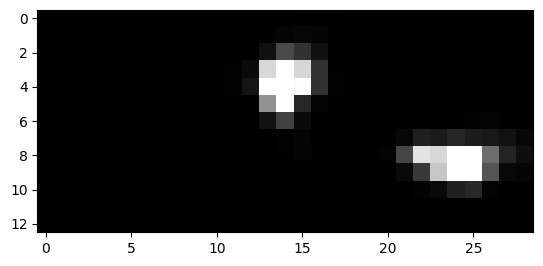

753


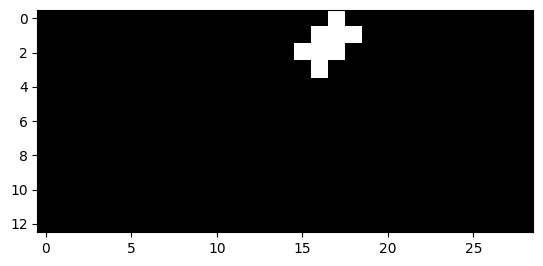

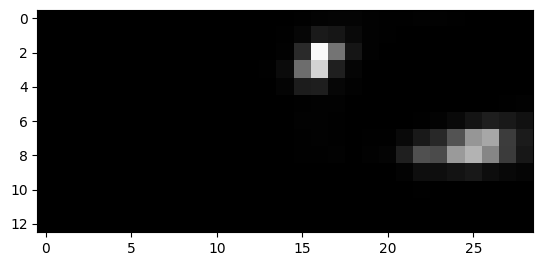

754


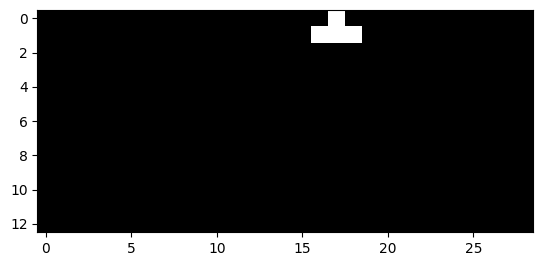

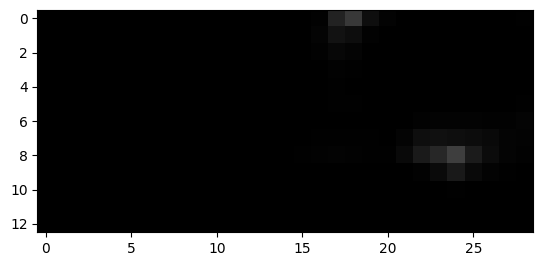

755


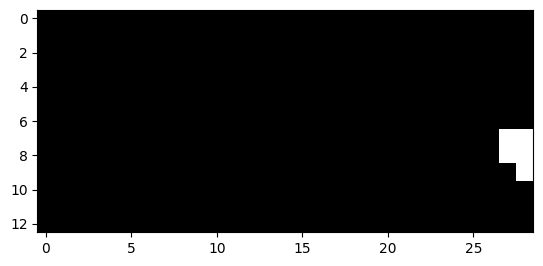

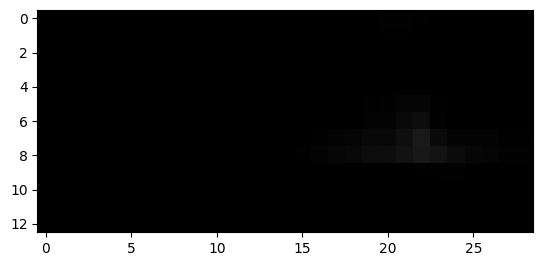

756


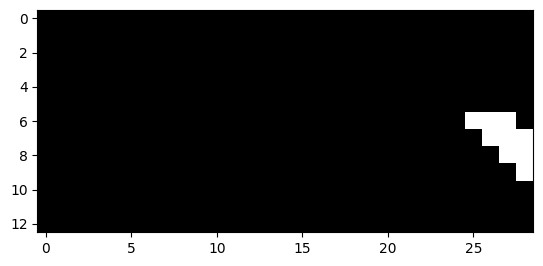

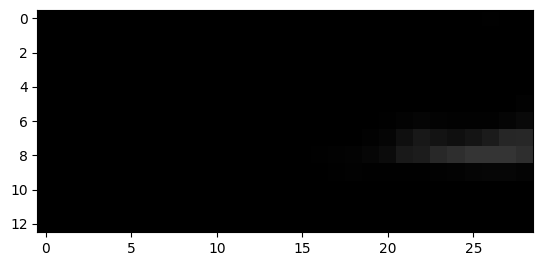

757


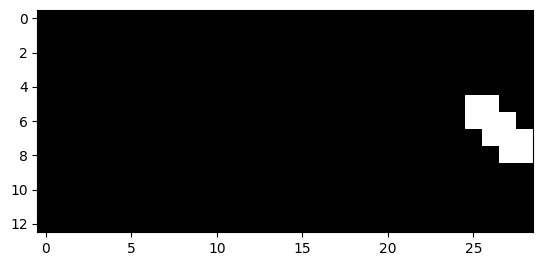

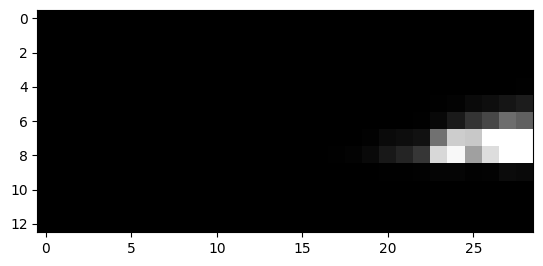

758


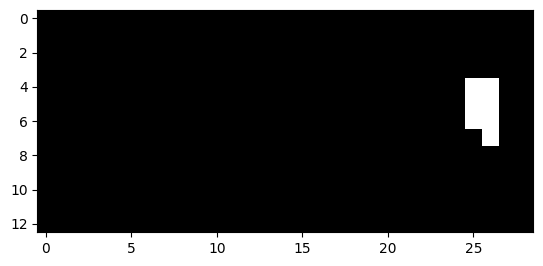

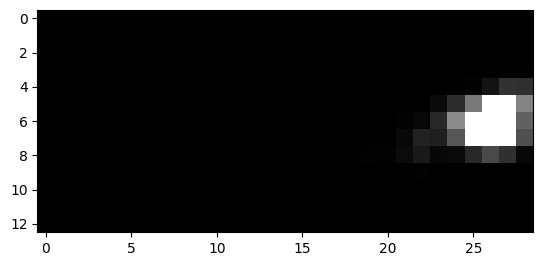

759


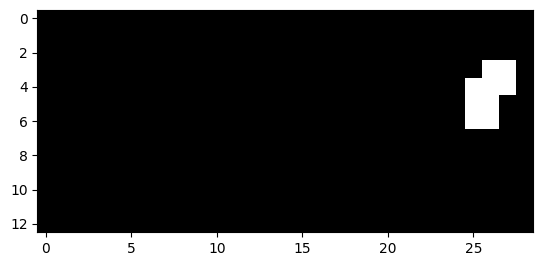

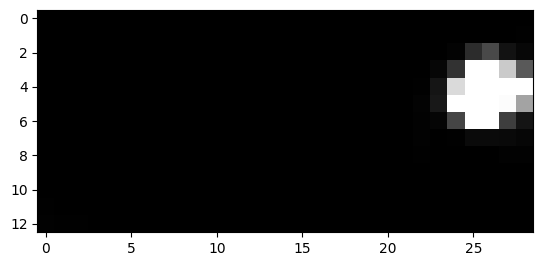

760


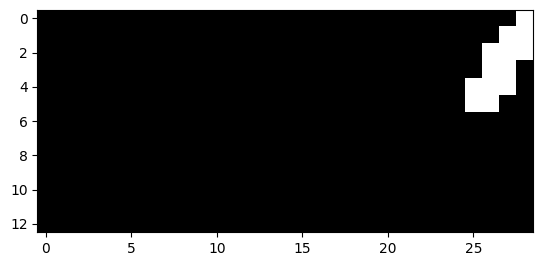

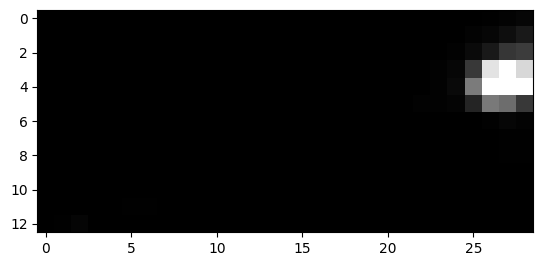

761


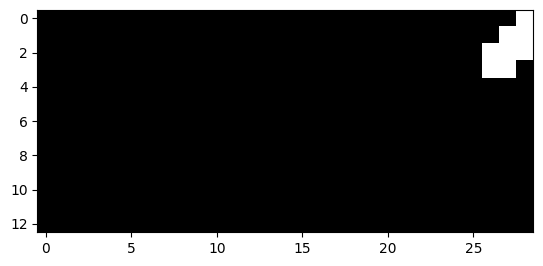

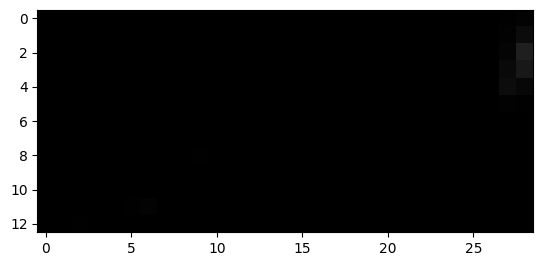

762


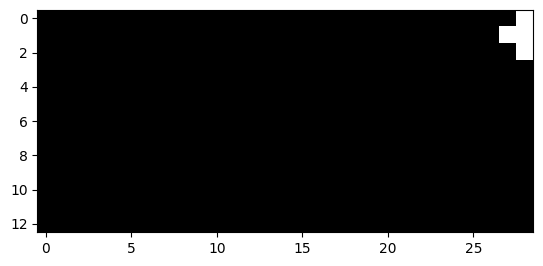

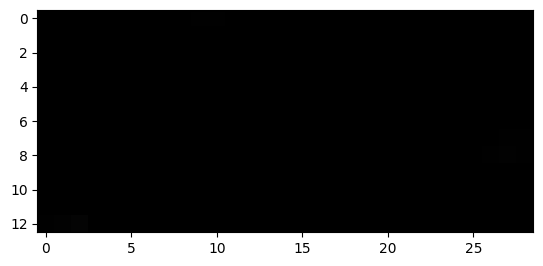

895


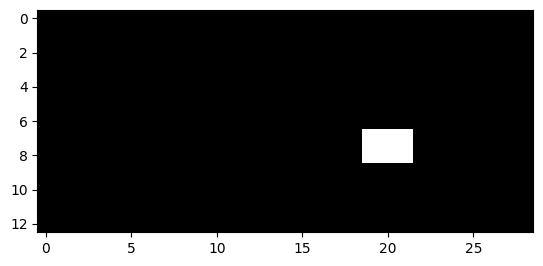

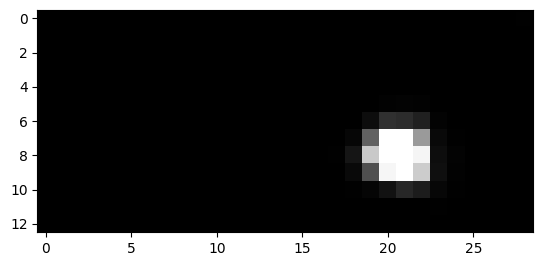

896


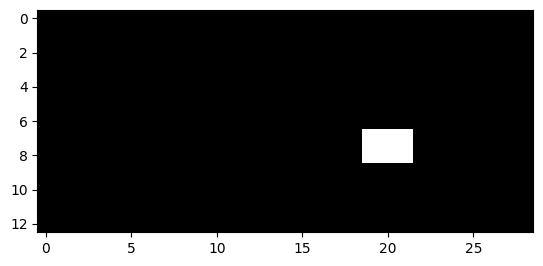

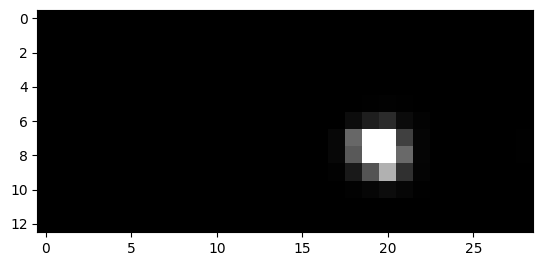

947


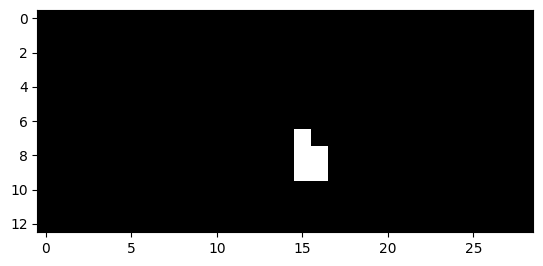

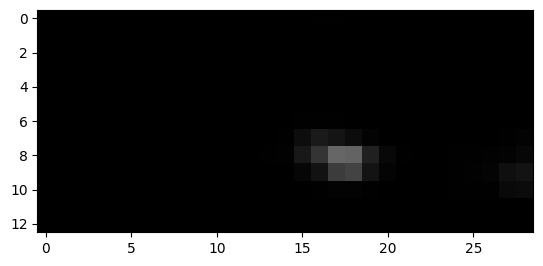

948


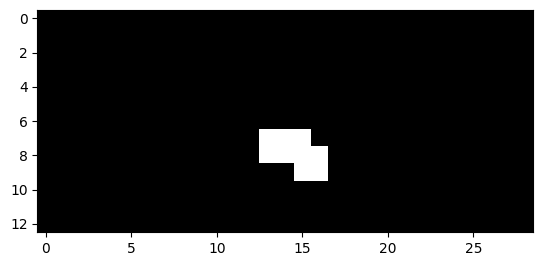

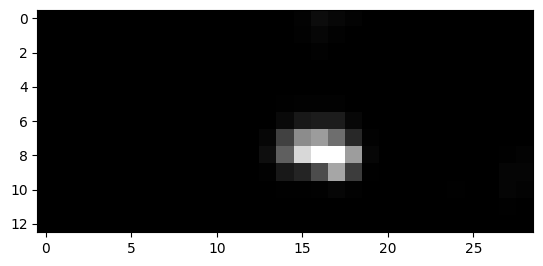

949


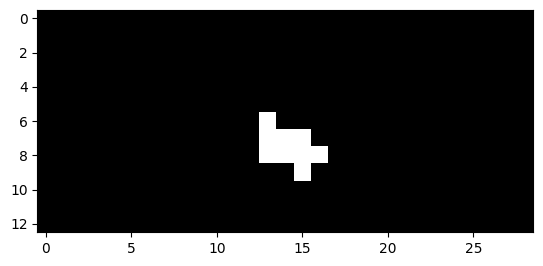

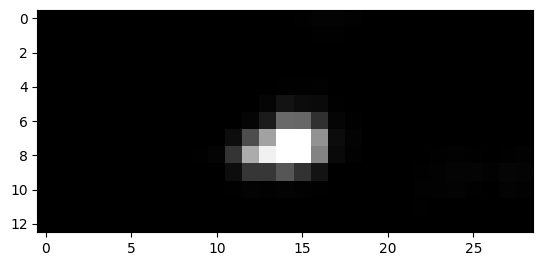

950


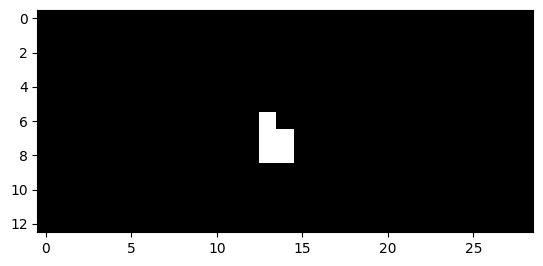

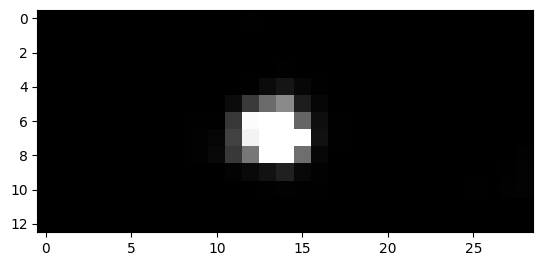

951


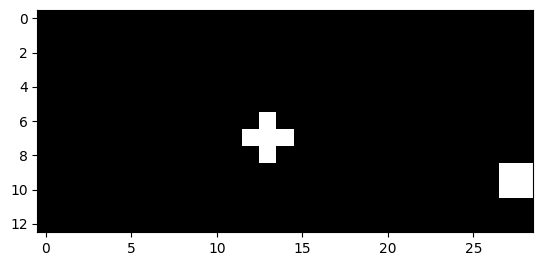

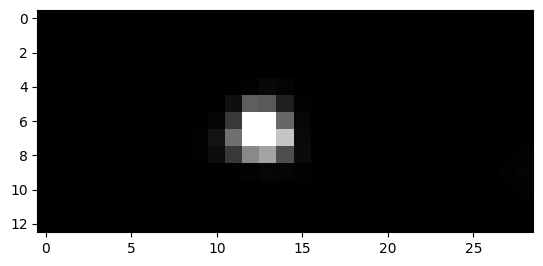

952


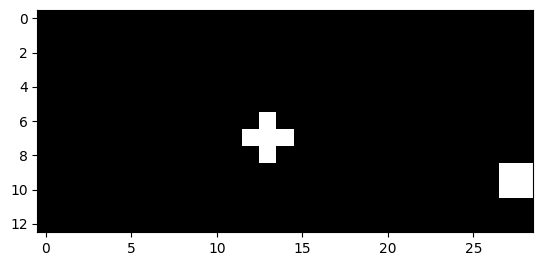

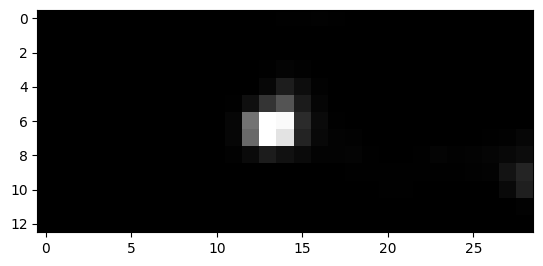

953


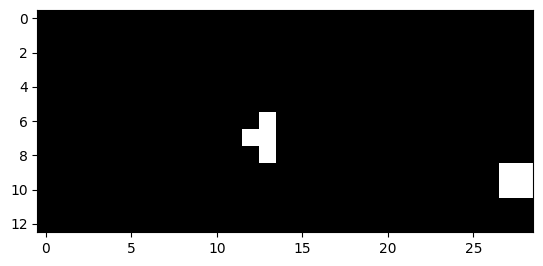

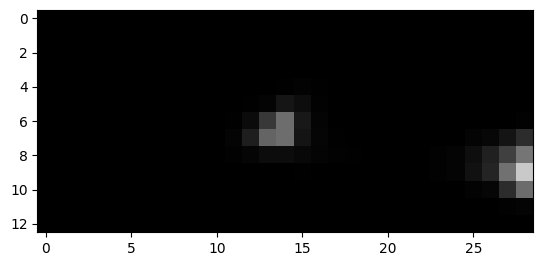

954


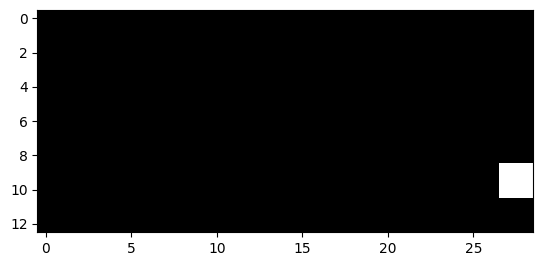

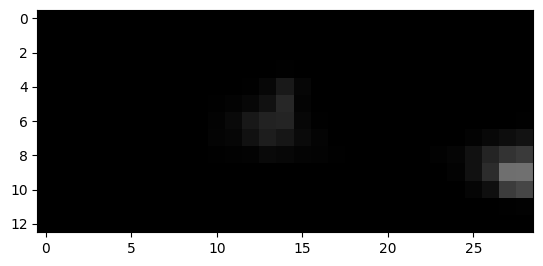

958


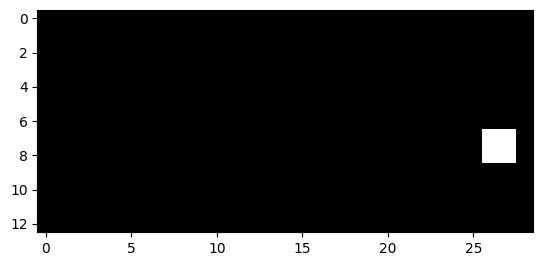

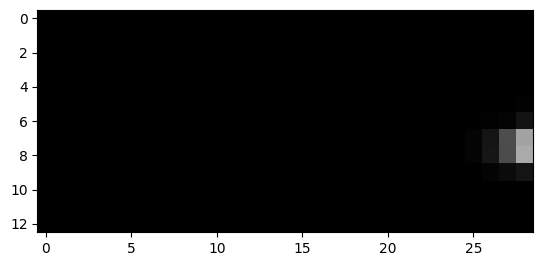

959


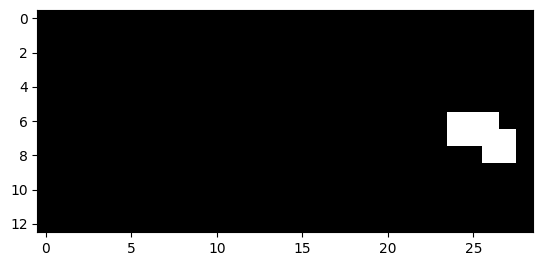

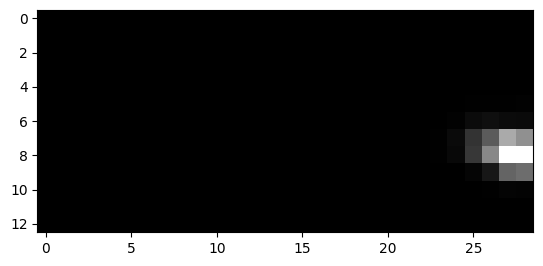

960


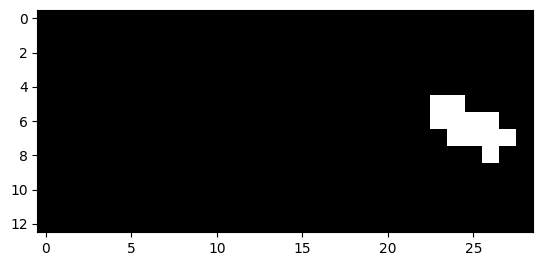

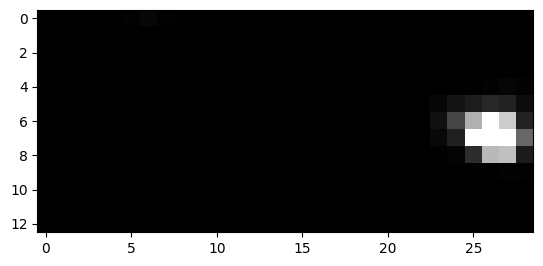

961


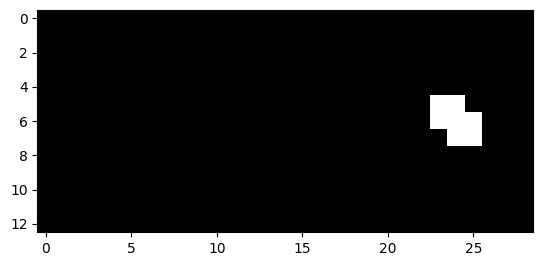

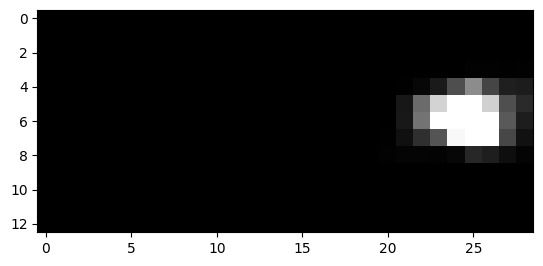

986


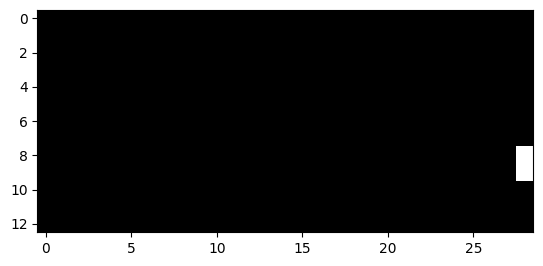

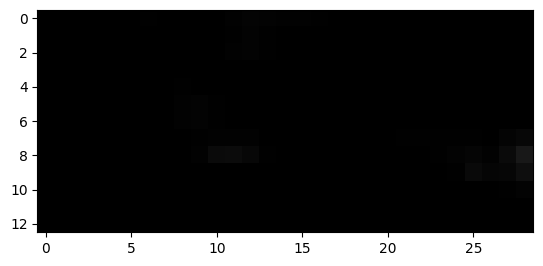

987


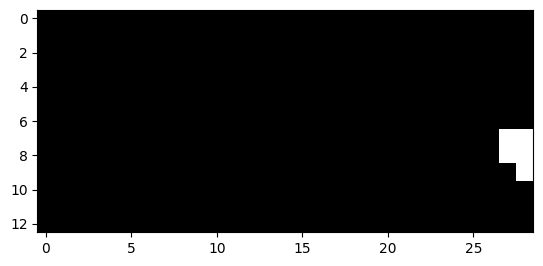

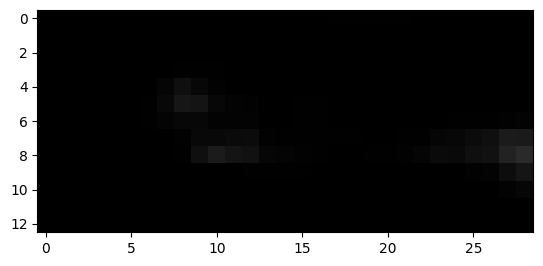

988


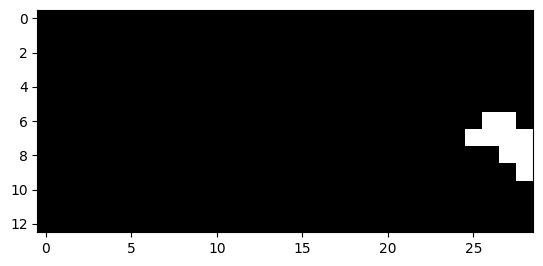

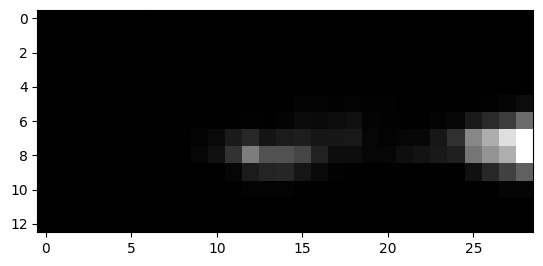

989


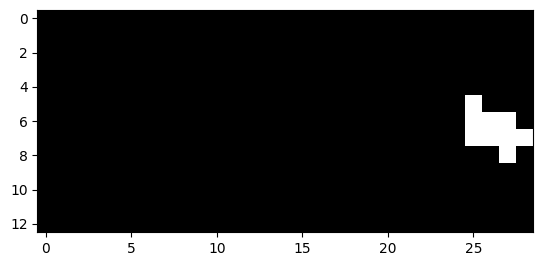

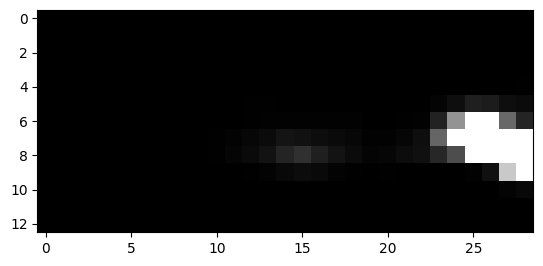

990


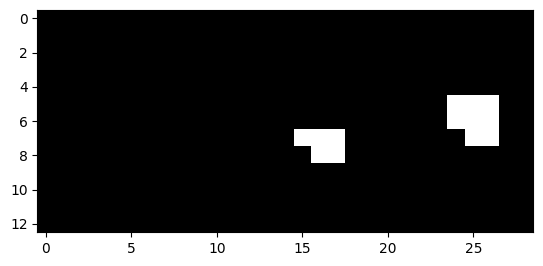

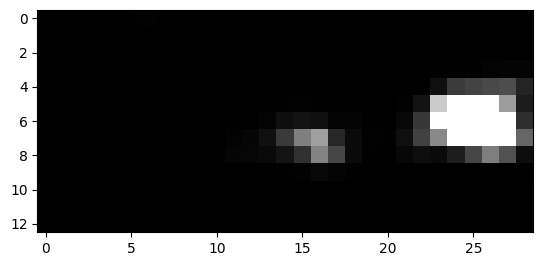

991


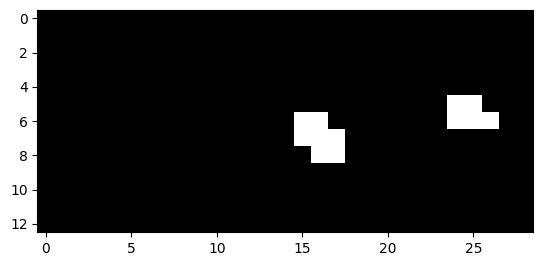

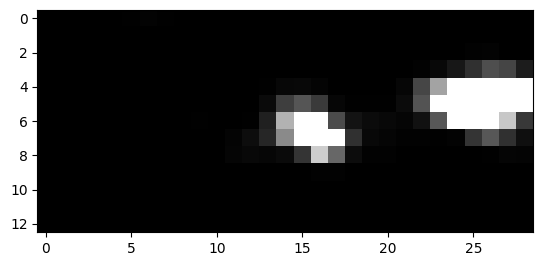

992


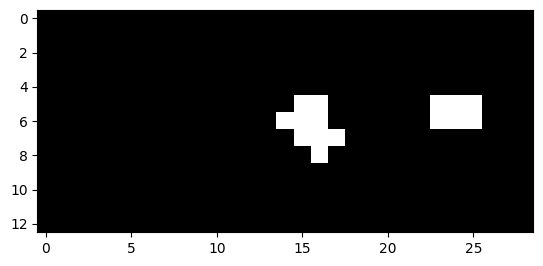

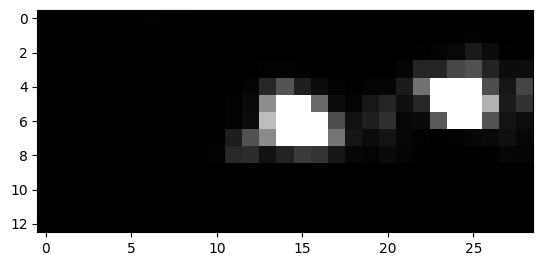

993


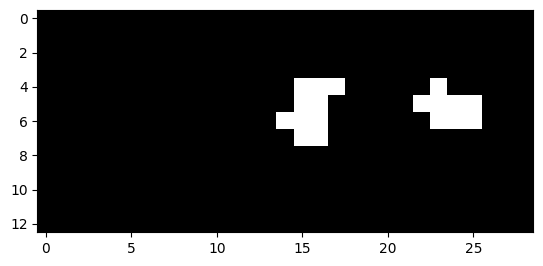

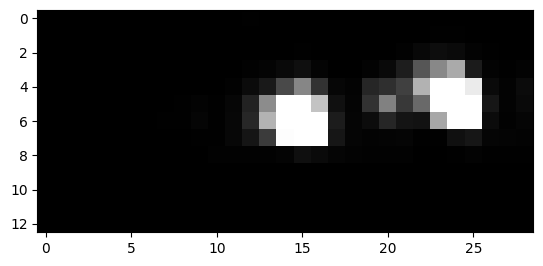

994


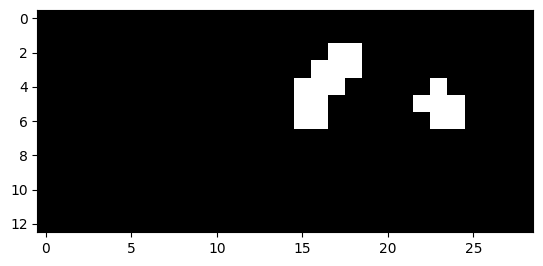

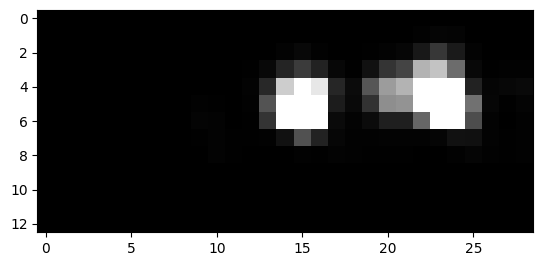

995


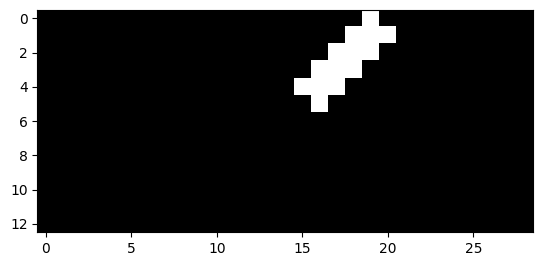

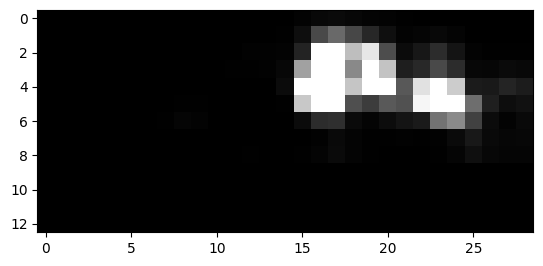

996


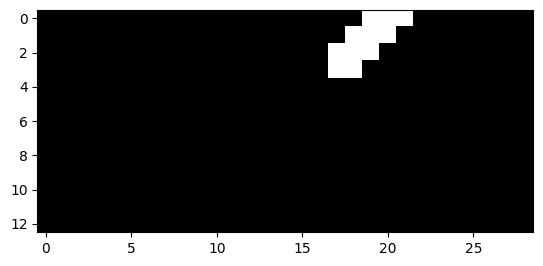

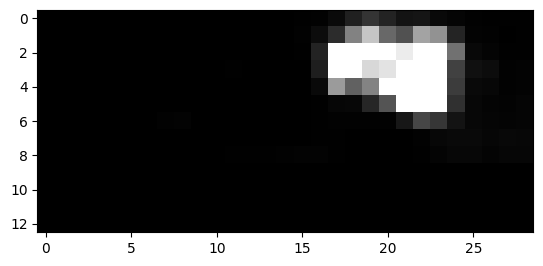

997


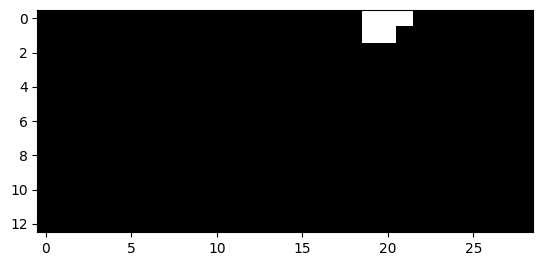

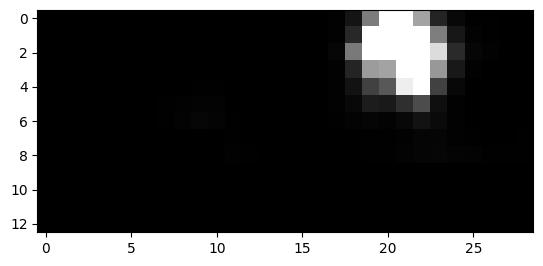

1022


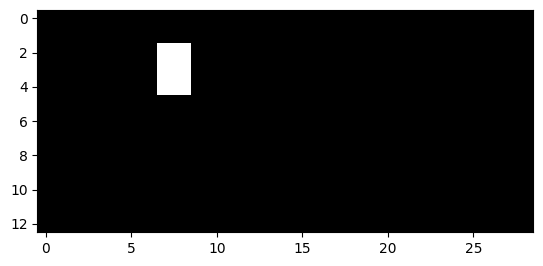

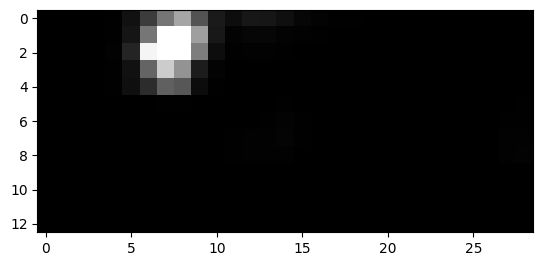

1023


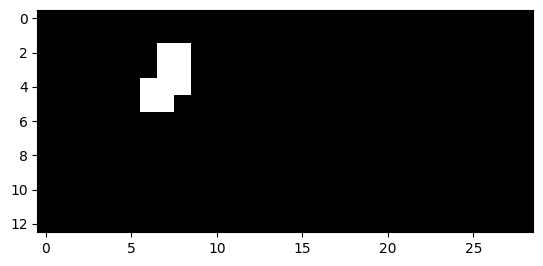

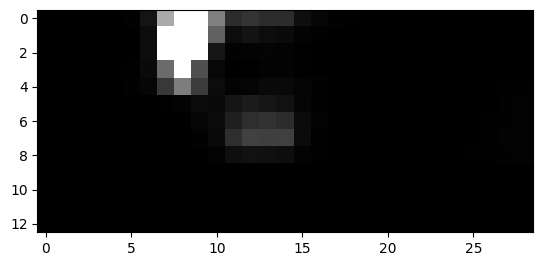

1024


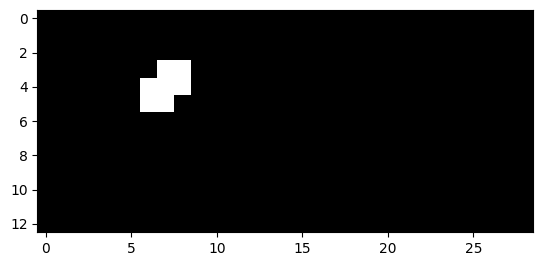

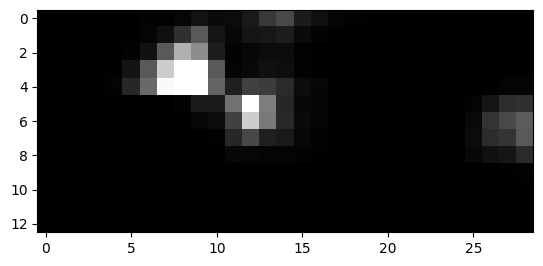

1026


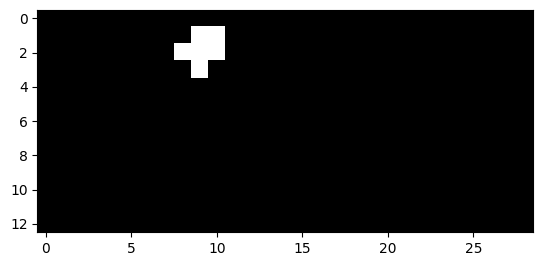

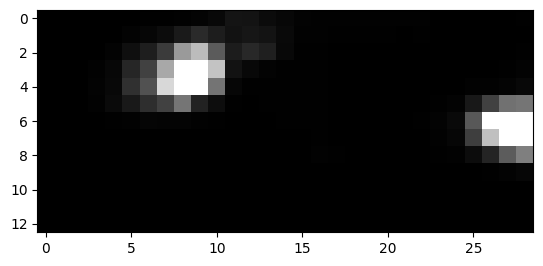

1027


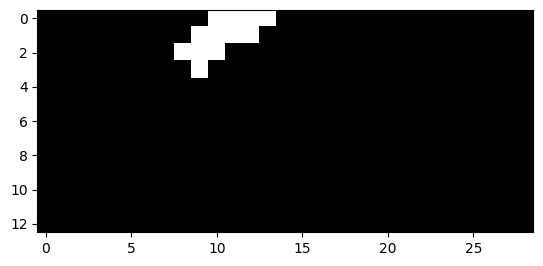

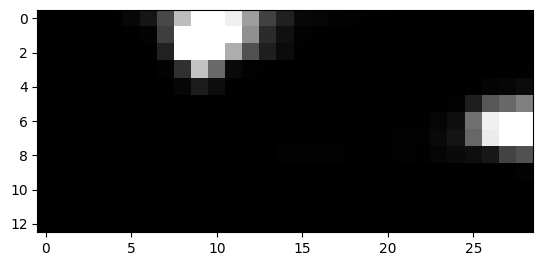

1028


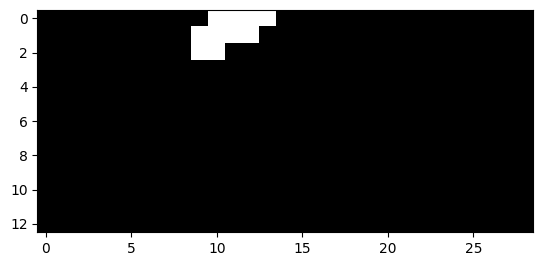

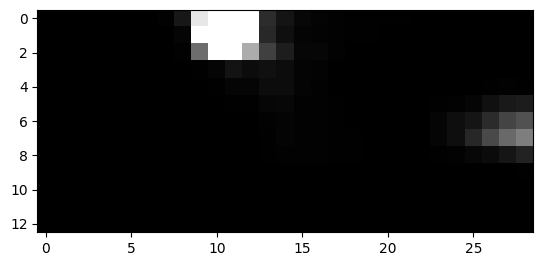

1038


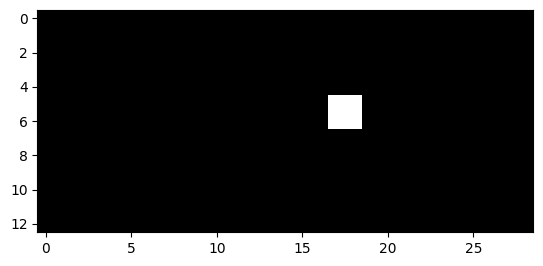

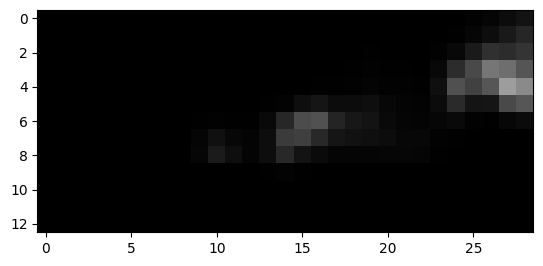

1039


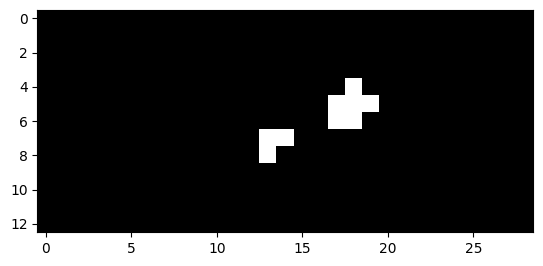

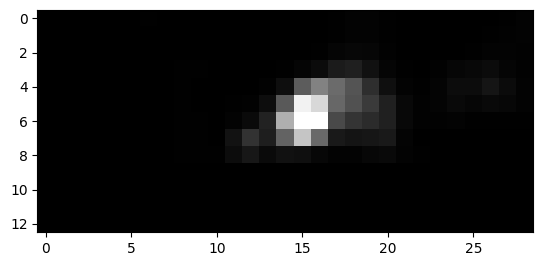

1040


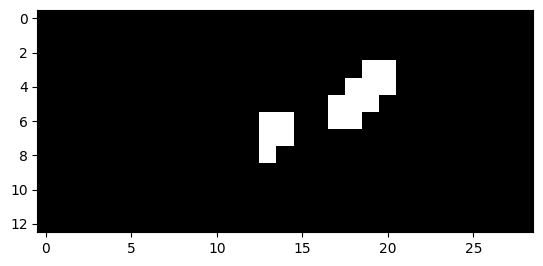

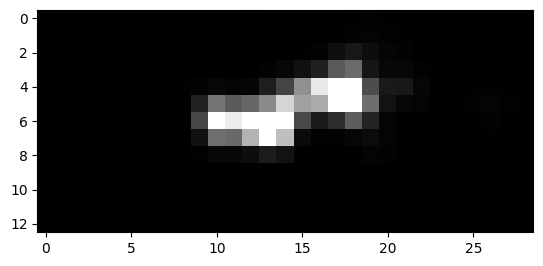

1041


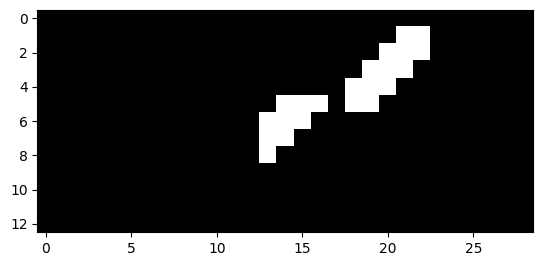

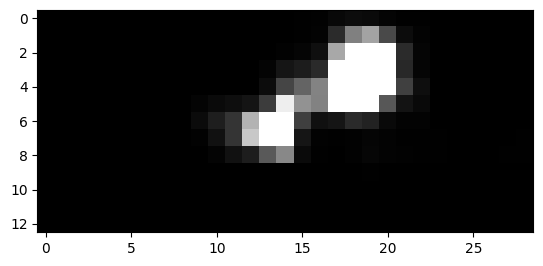

1042


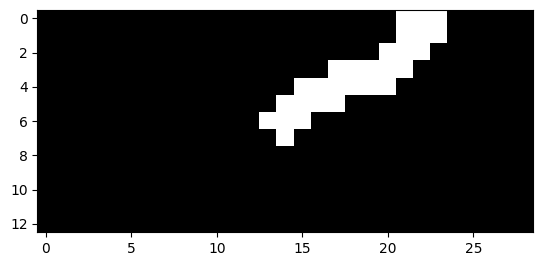

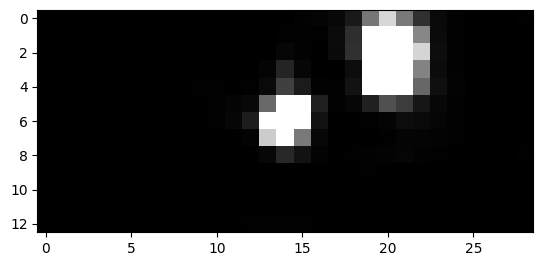

1043


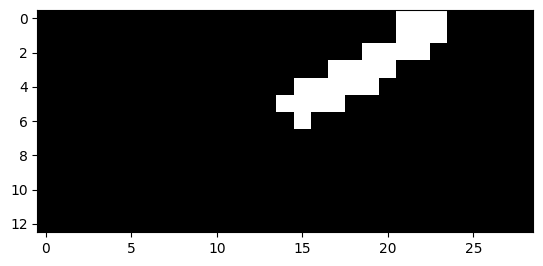

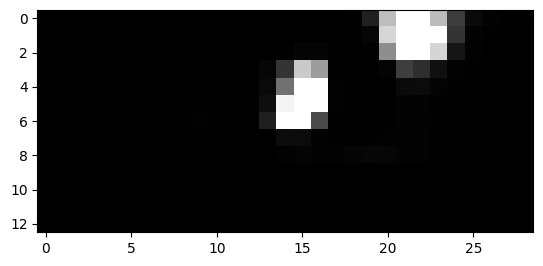

1044


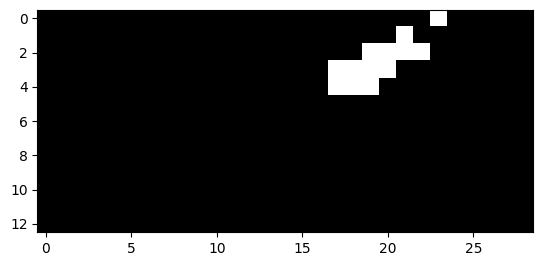

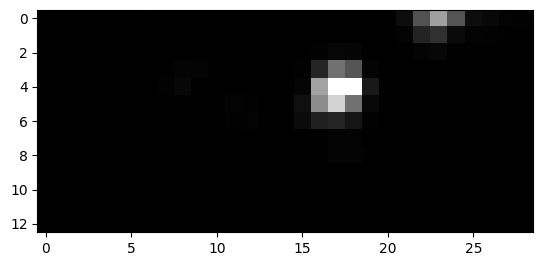

1045


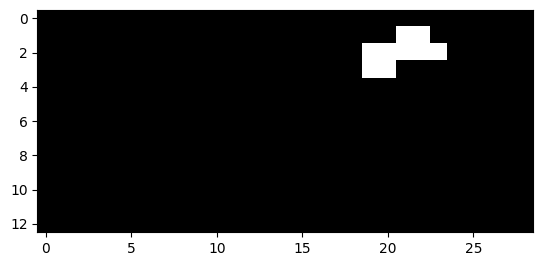

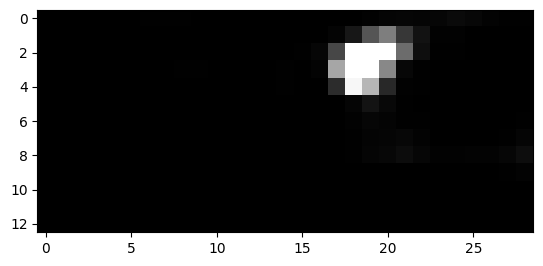

1046


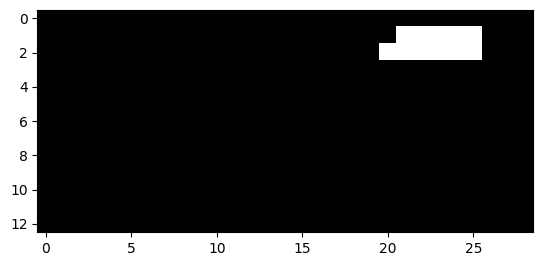

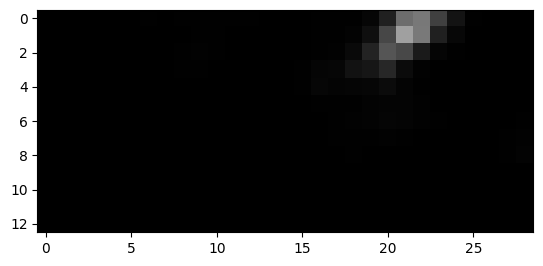

1047


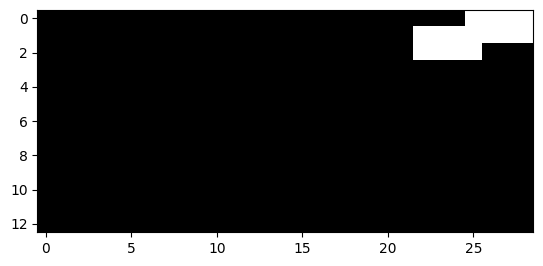

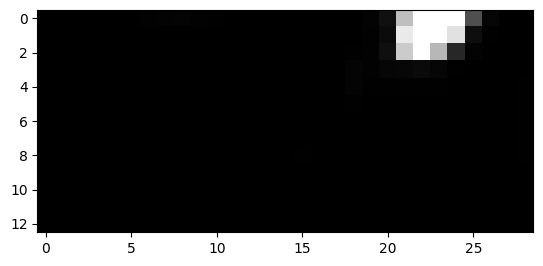

1048


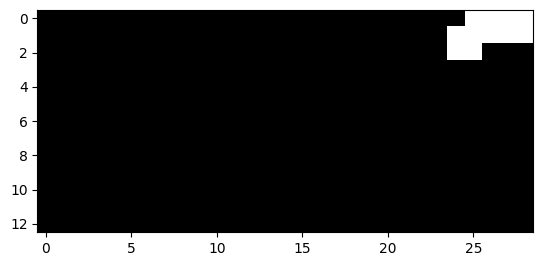

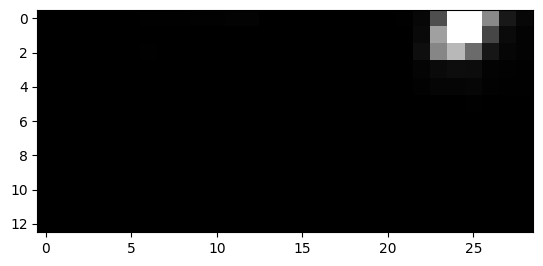

1049


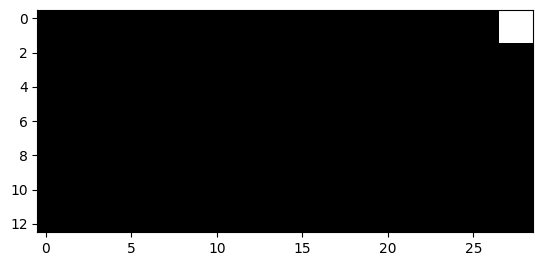

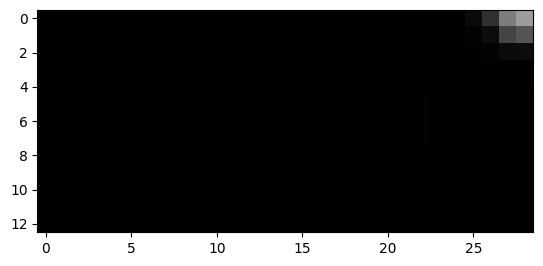

1063


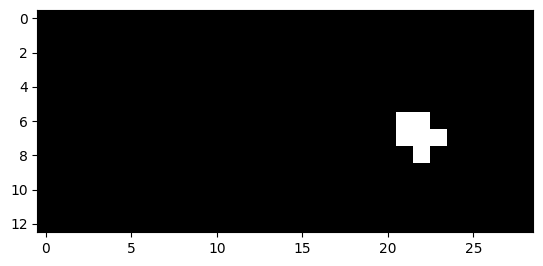

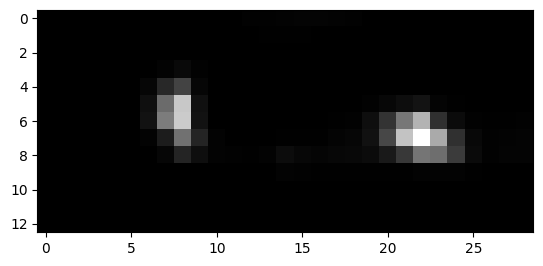

1064


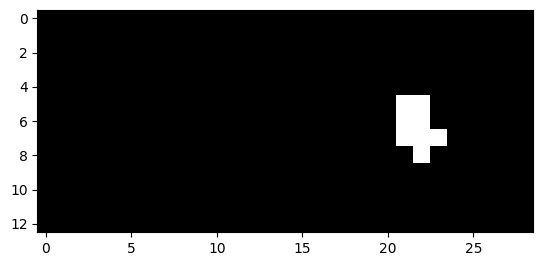

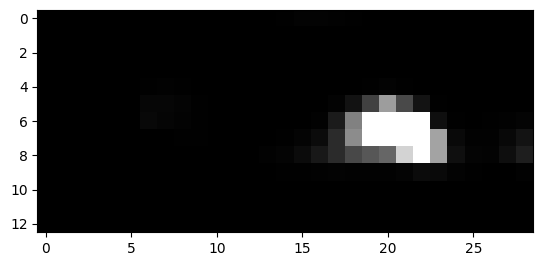

1065


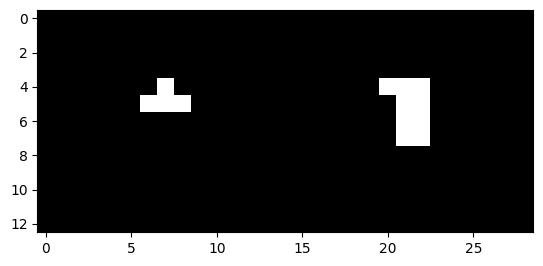

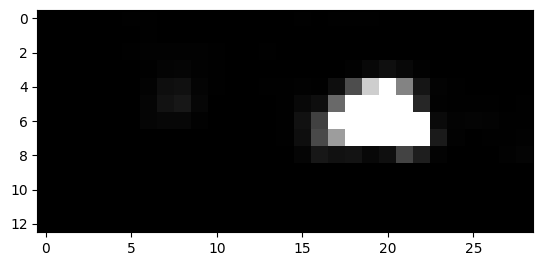

1066


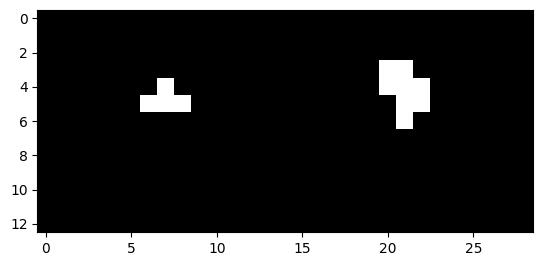

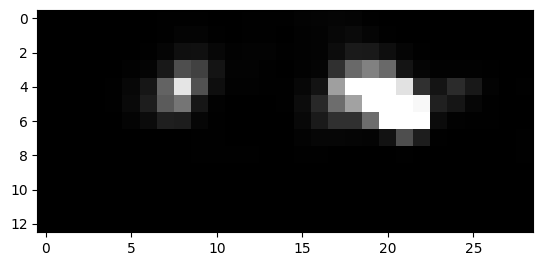

1067


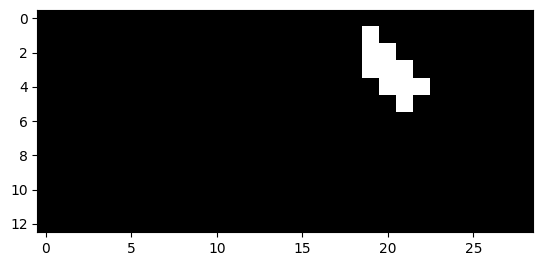

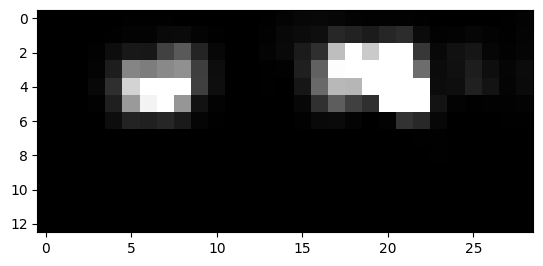

1068


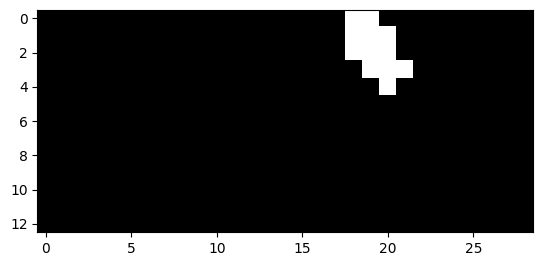

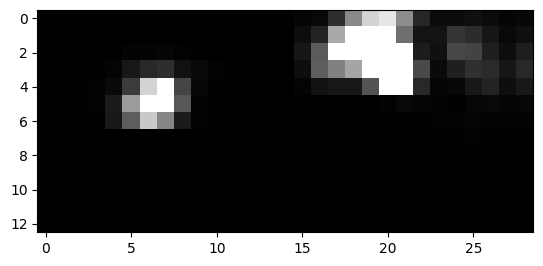

1069


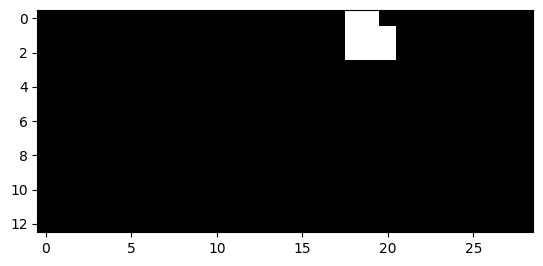

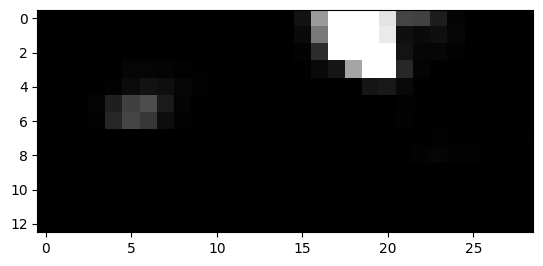

1070


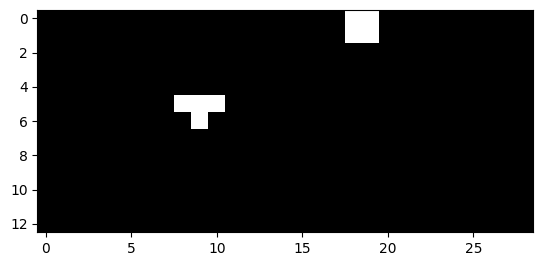

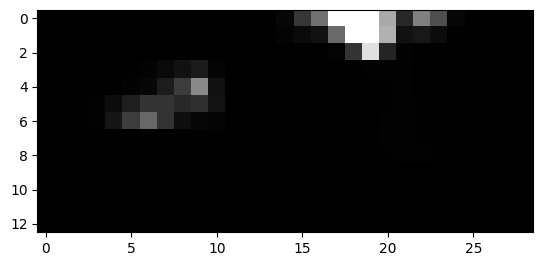

1071


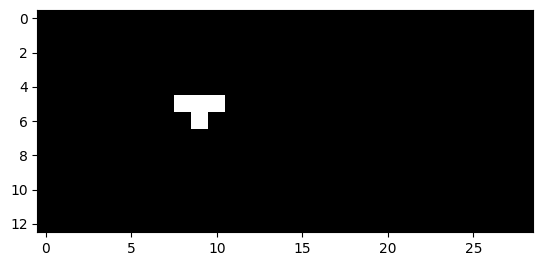

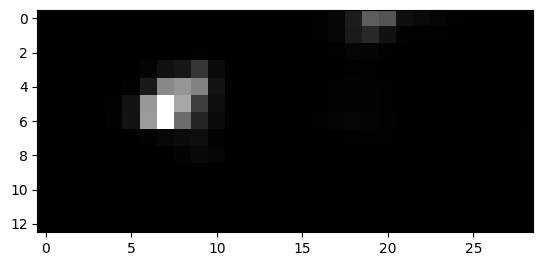

1072


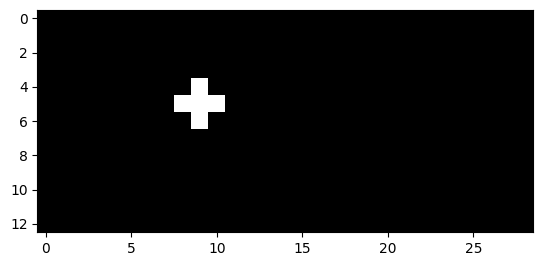

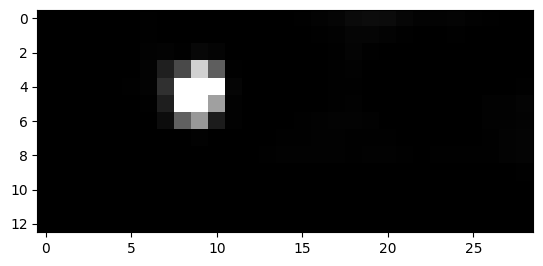

1073


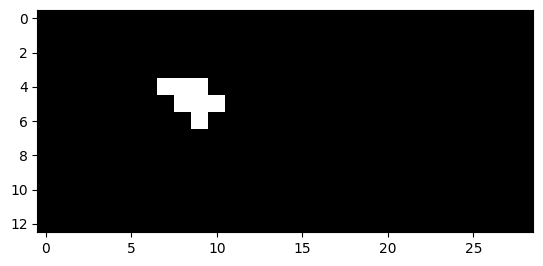

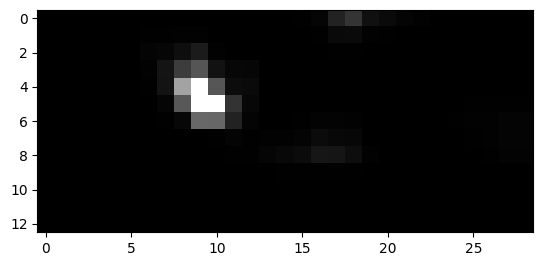

1074


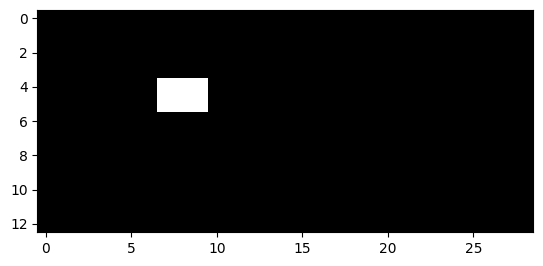

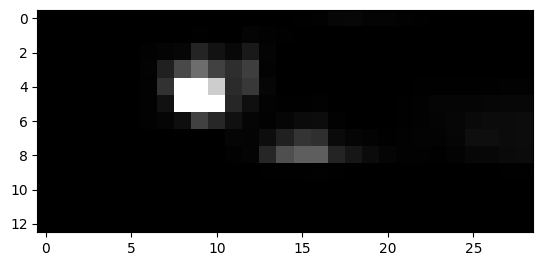

1075


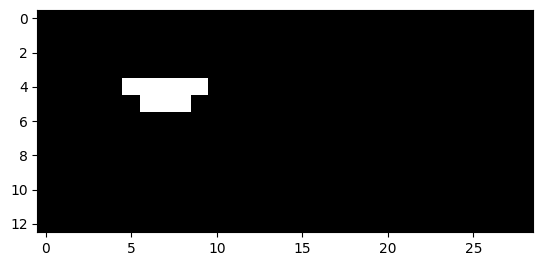

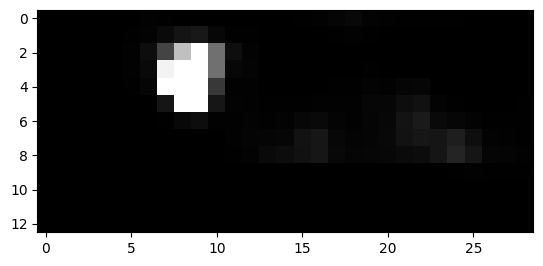

1076


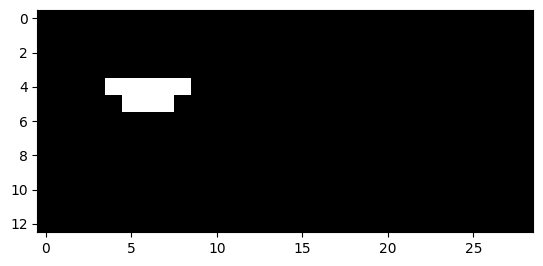

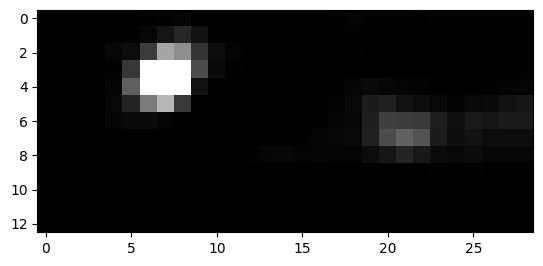

1077


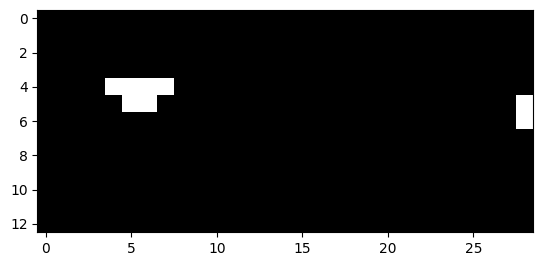

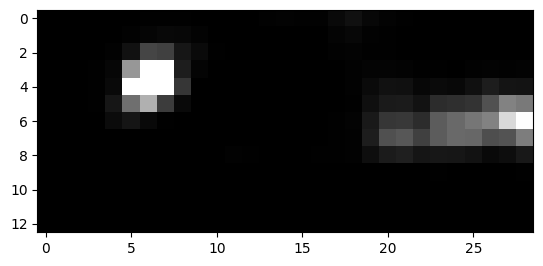

1078


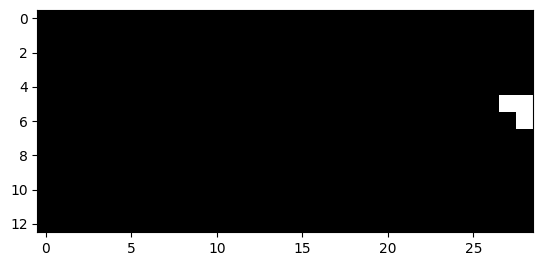

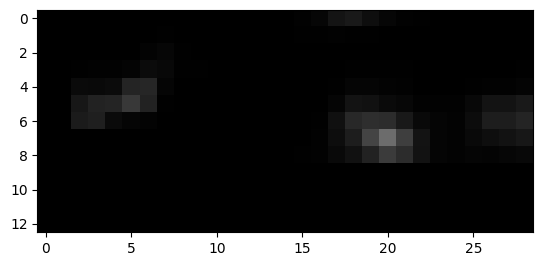

1079


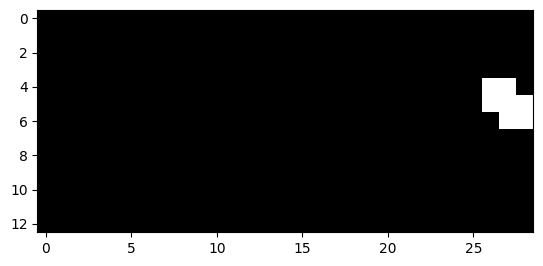

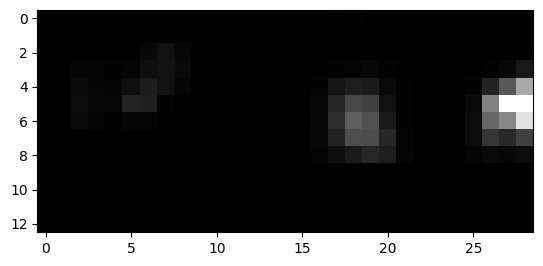

1080


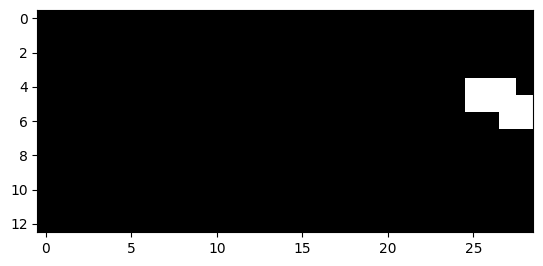

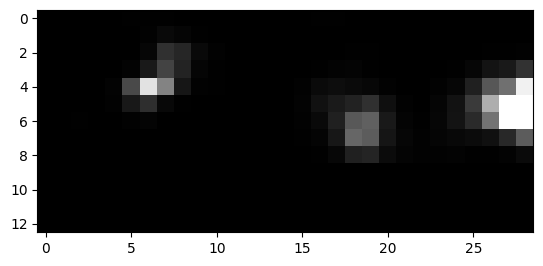

1081


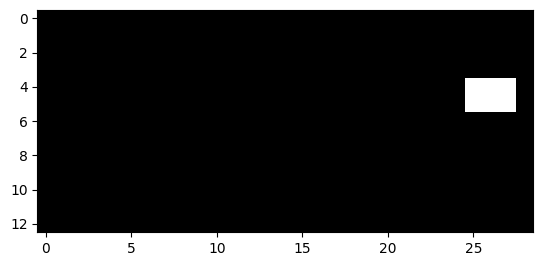

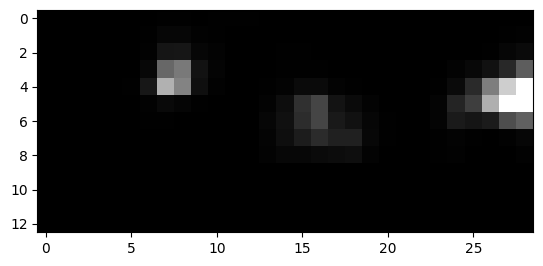

1082


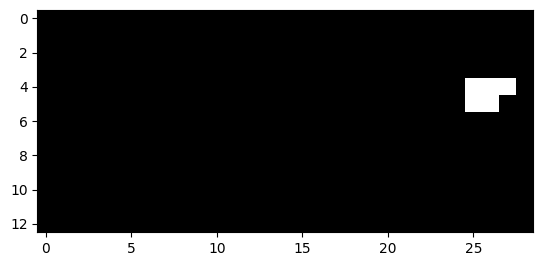

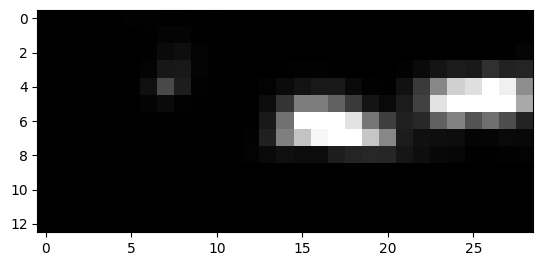

1083


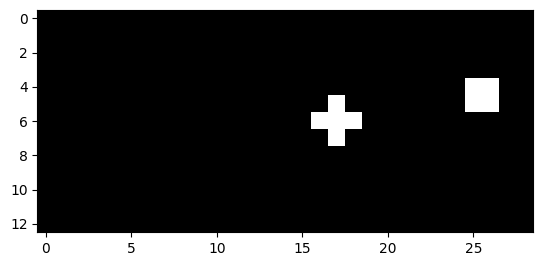

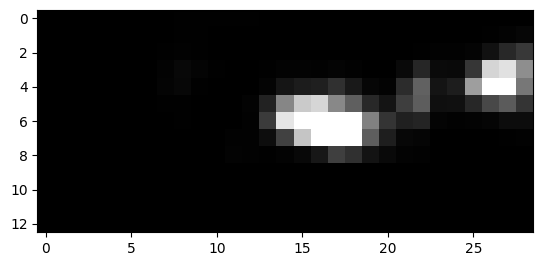

1084


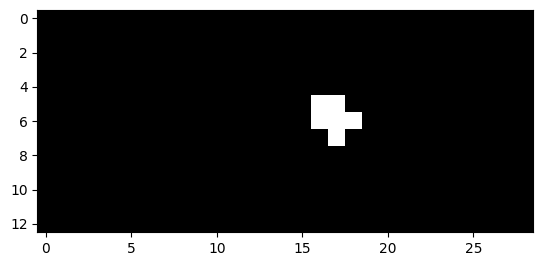

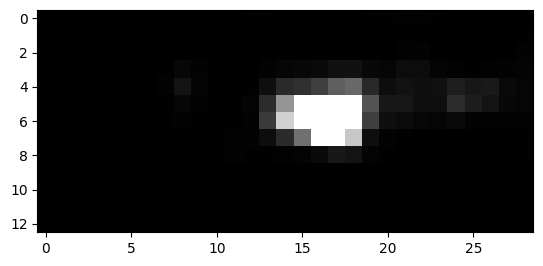

1085


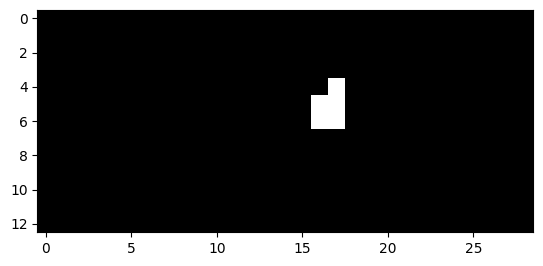

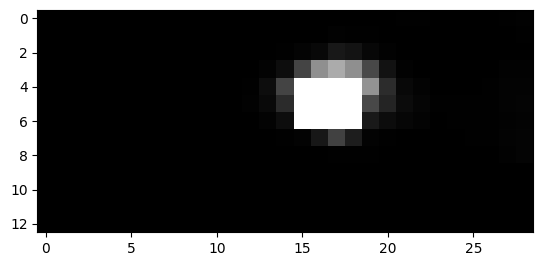

1086


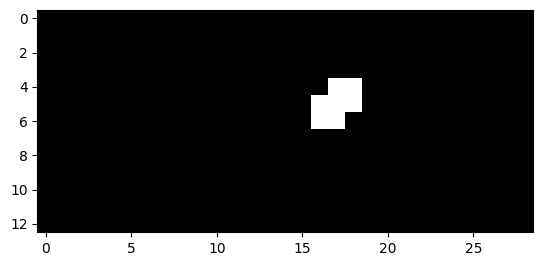

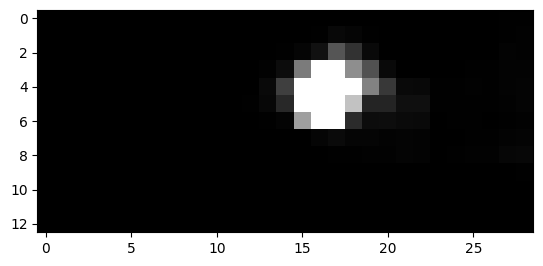

1087


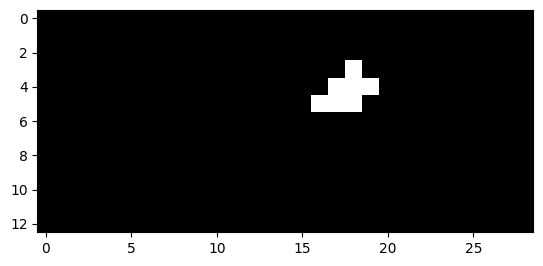

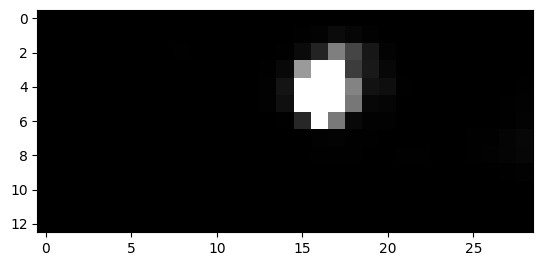

1088


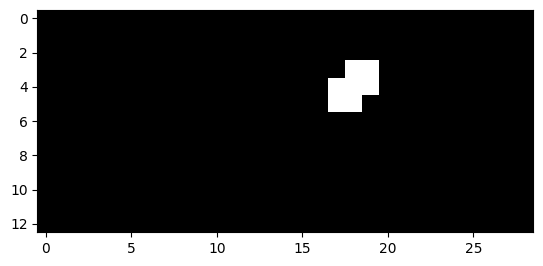

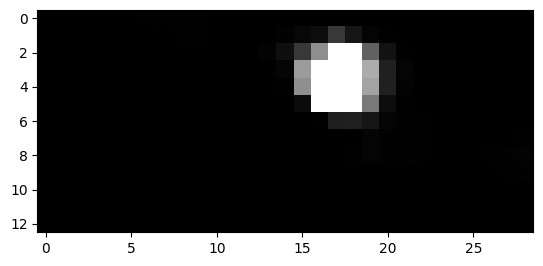

1089


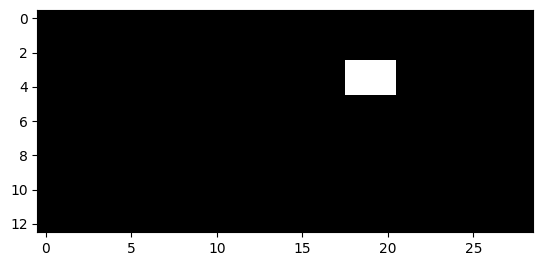

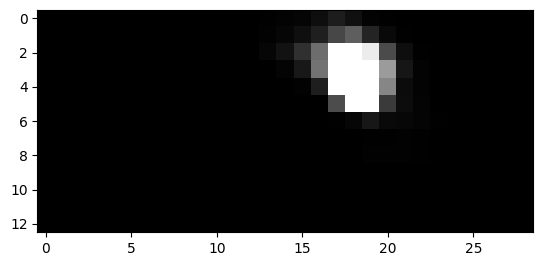

1090


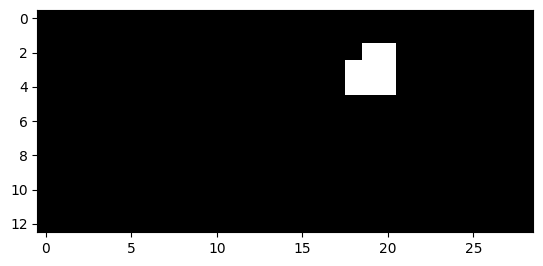

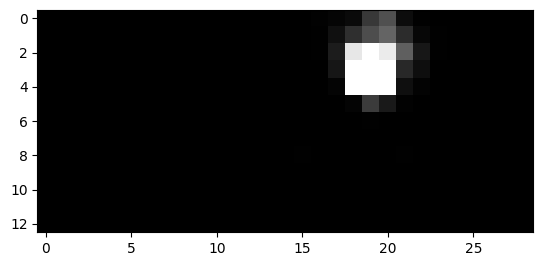

1091


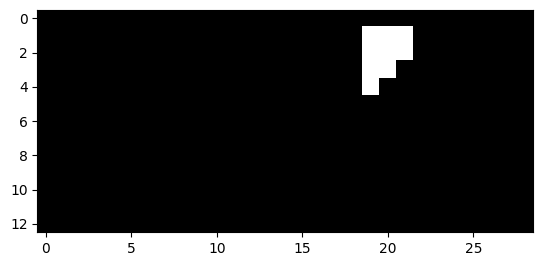

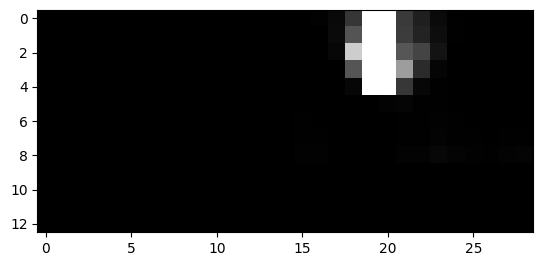

1092


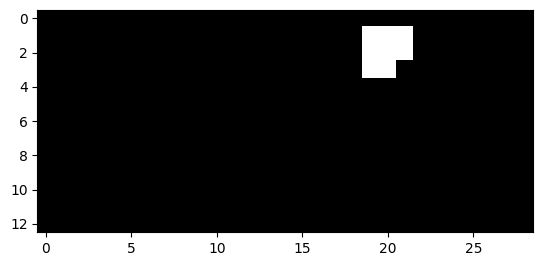

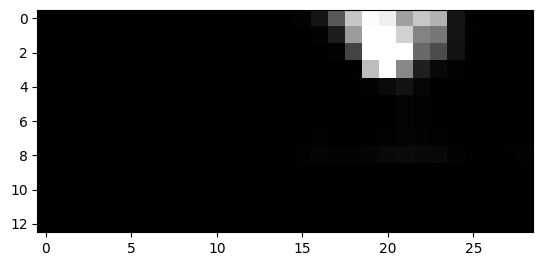

1093


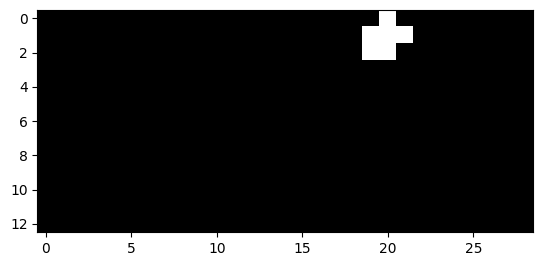

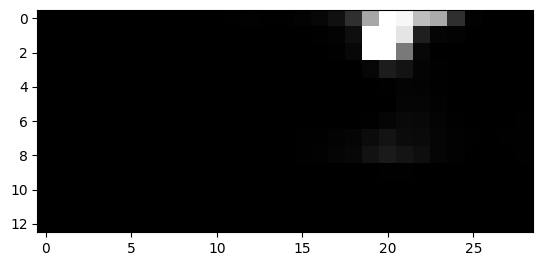

1094


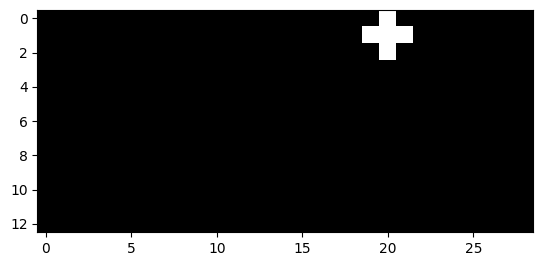

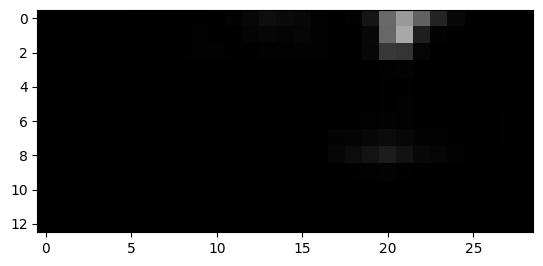

1115


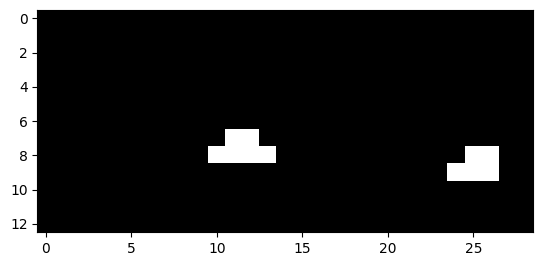

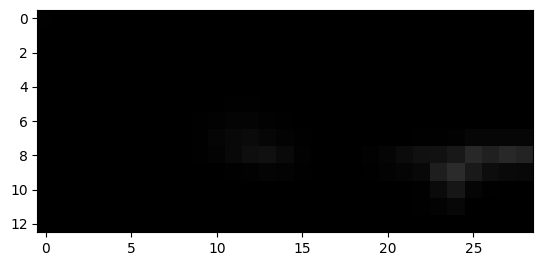

1116


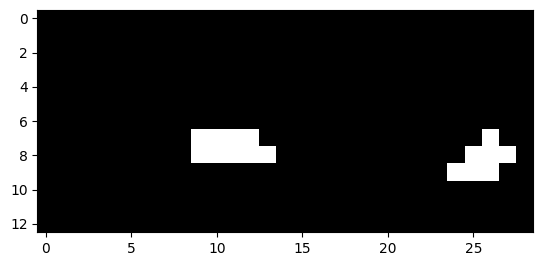

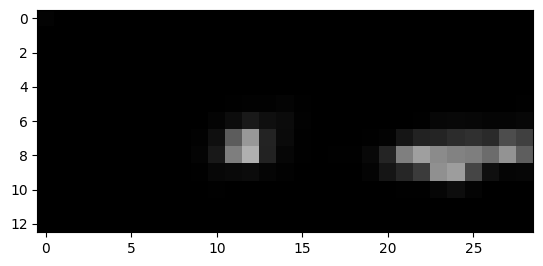

1117


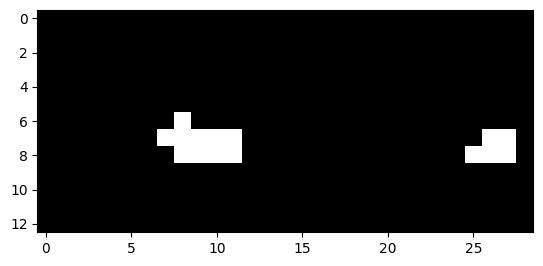

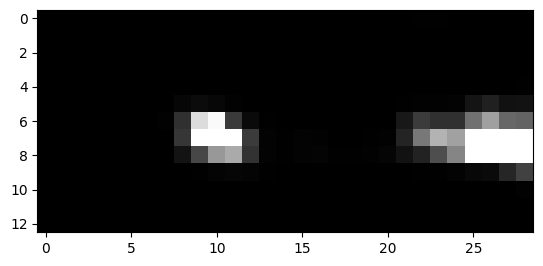

1118


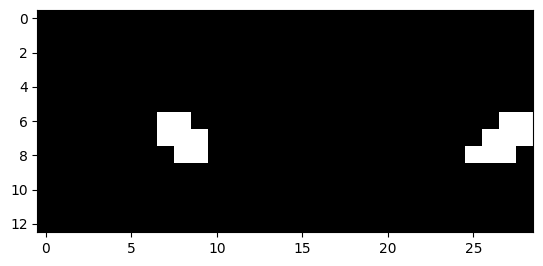

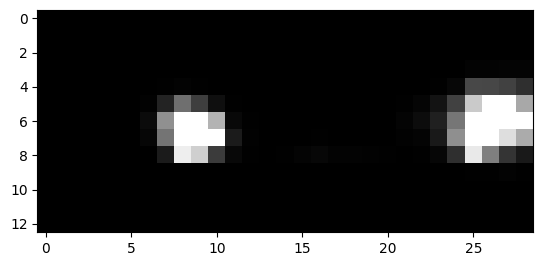

1119


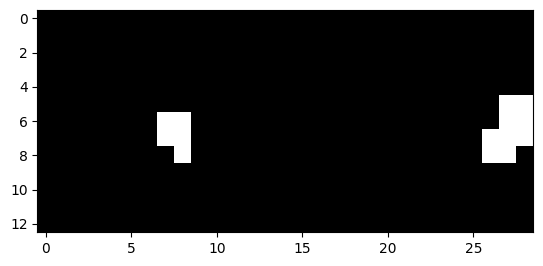

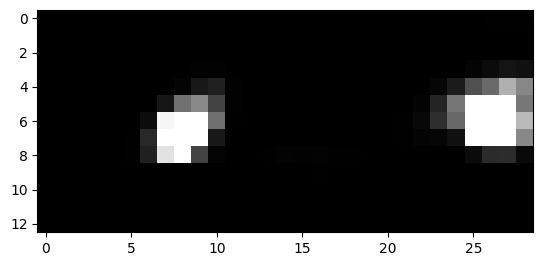

1120


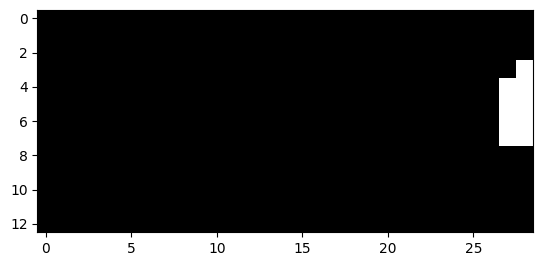

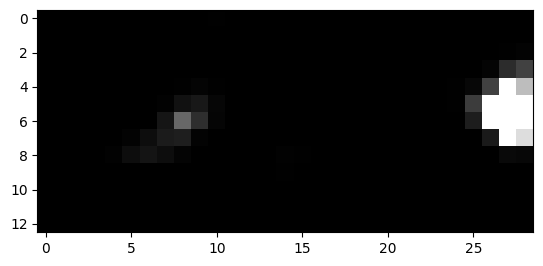

1121


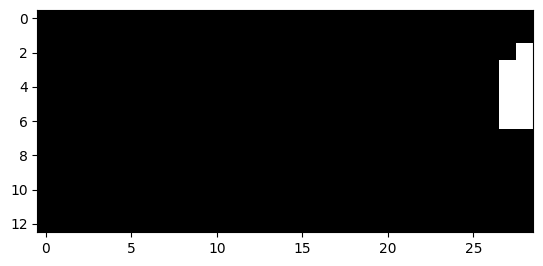

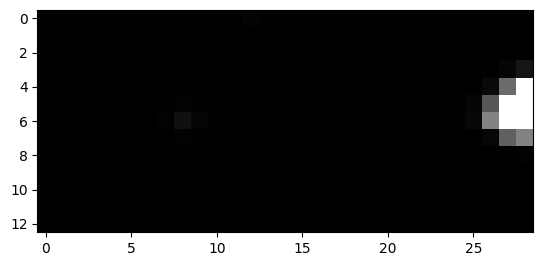

1122


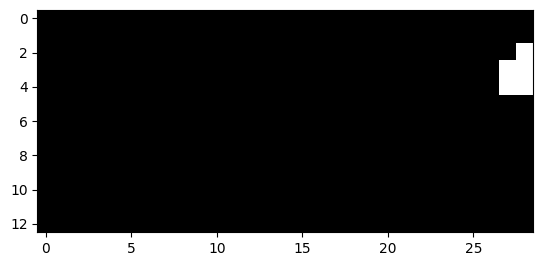

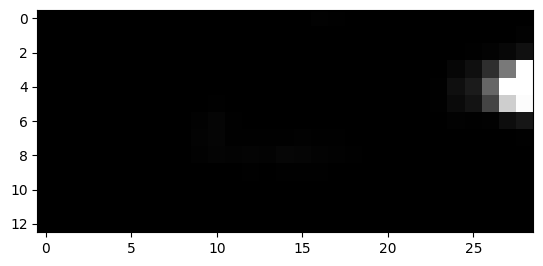

1340


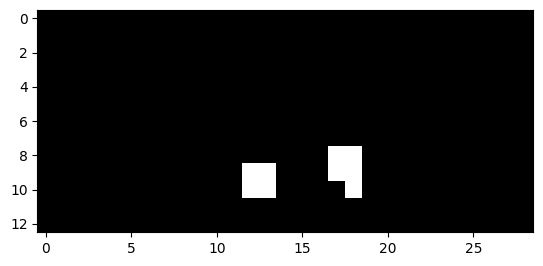

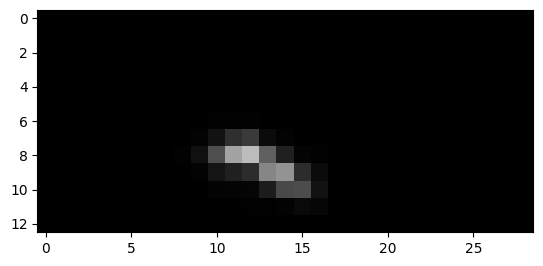

1341


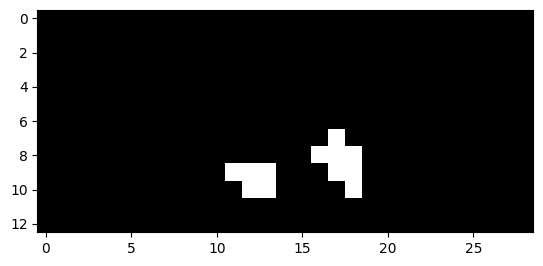

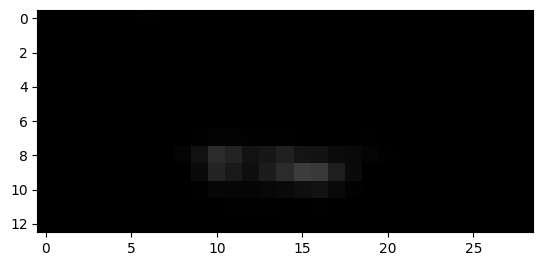

1342


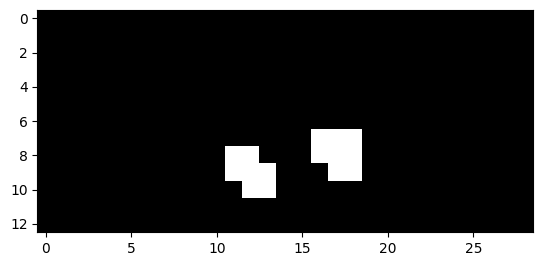

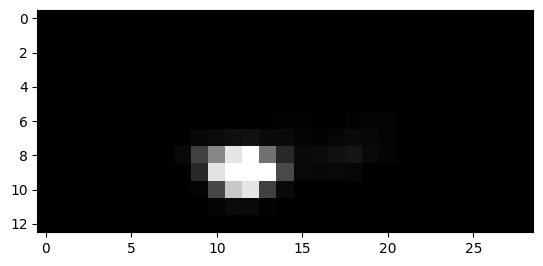

1343


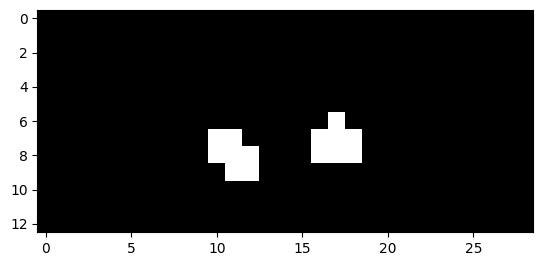

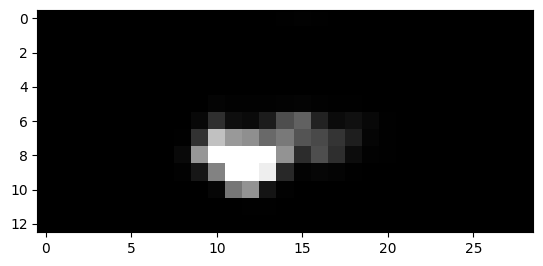

1344


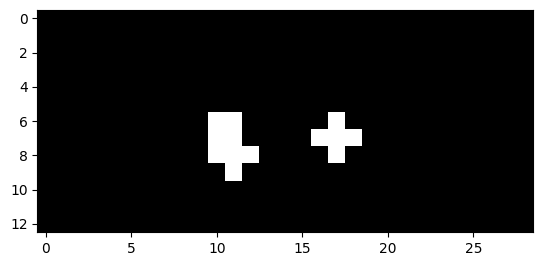

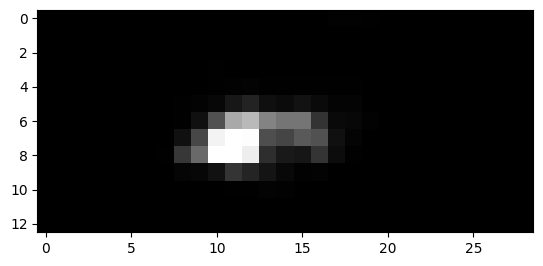

1345


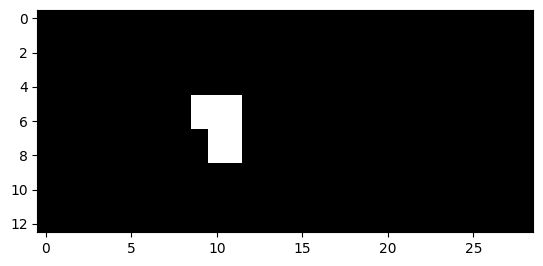

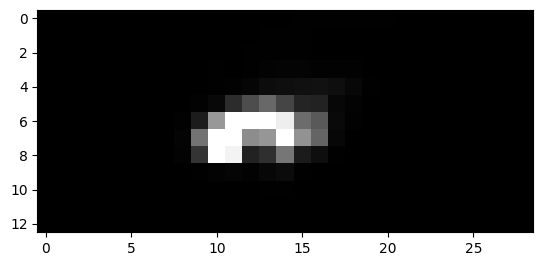

1346


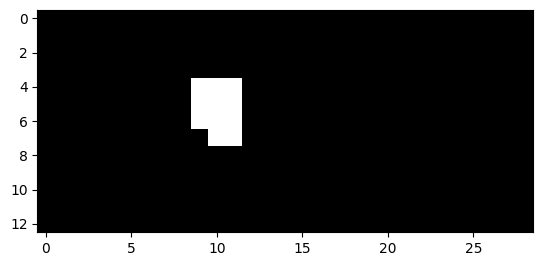

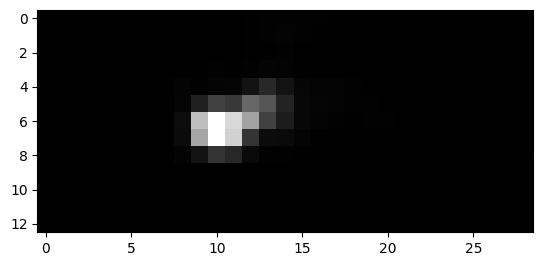

1347


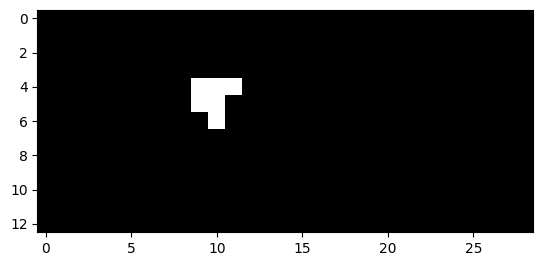

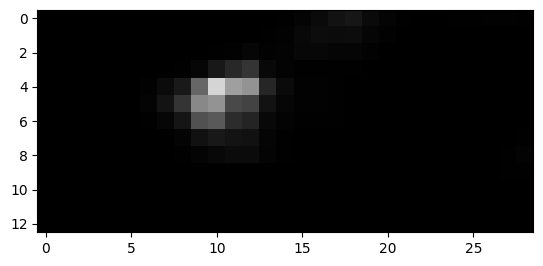

1365


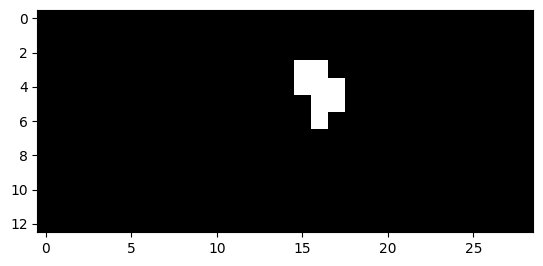

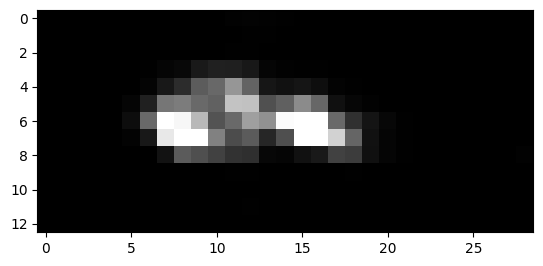

1366


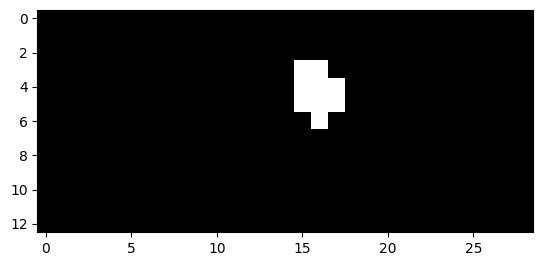

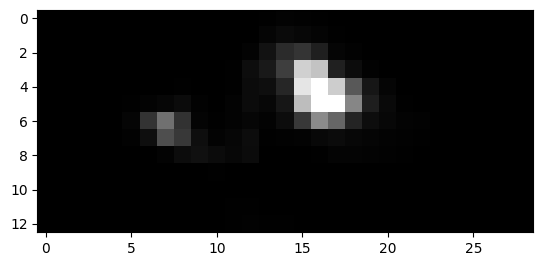

1367


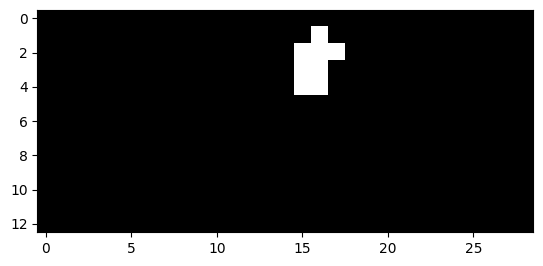

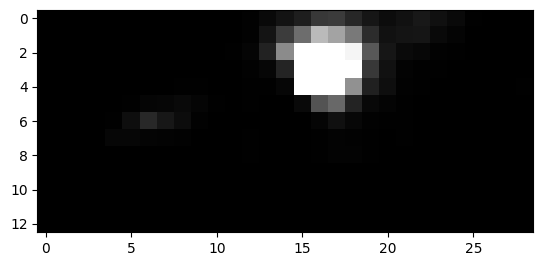

1368


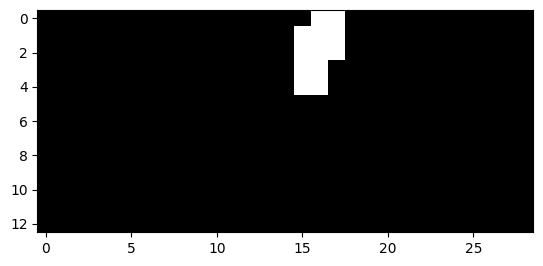

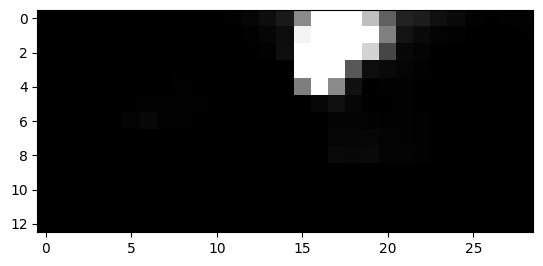

1369


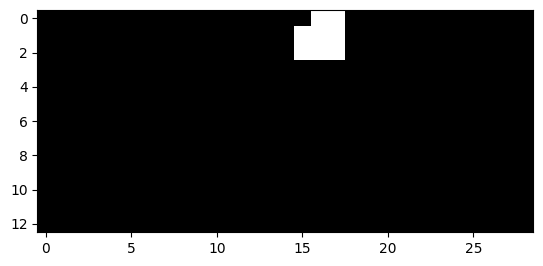

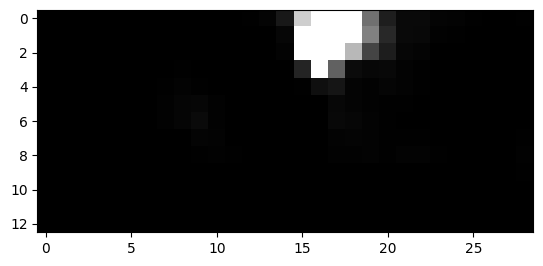

1370


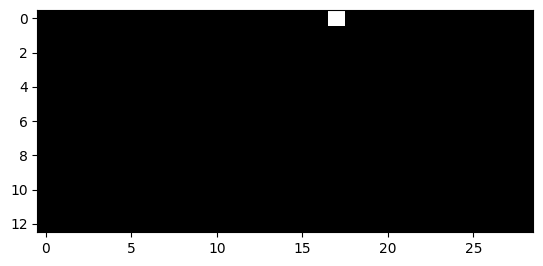

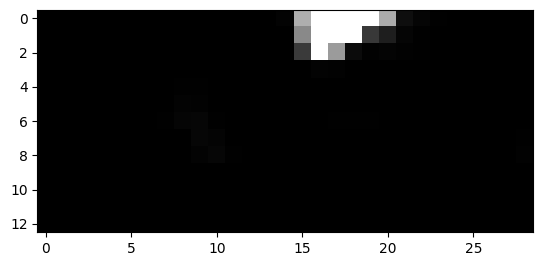

1388


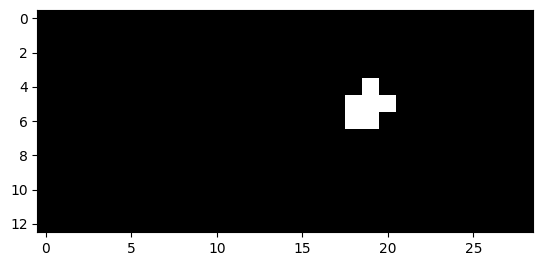

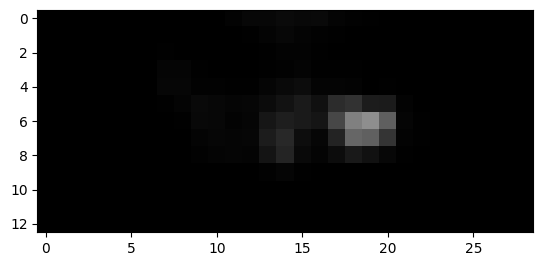

1389


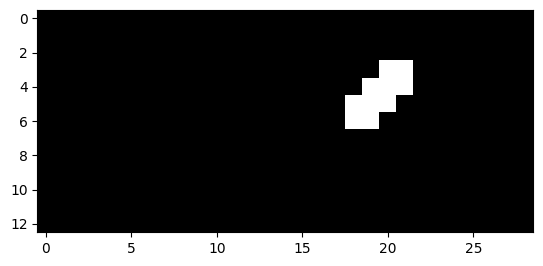

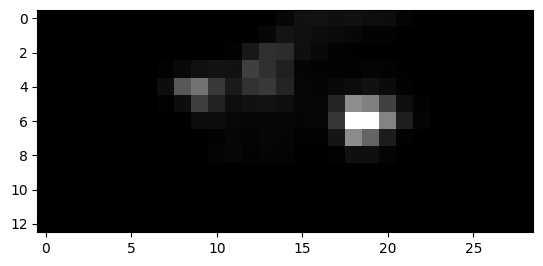

1390


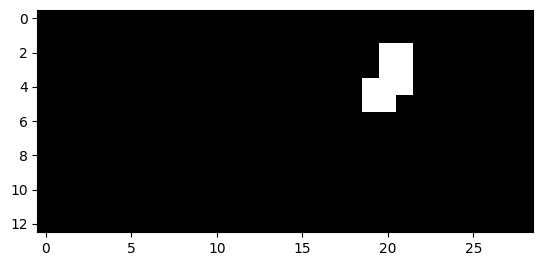

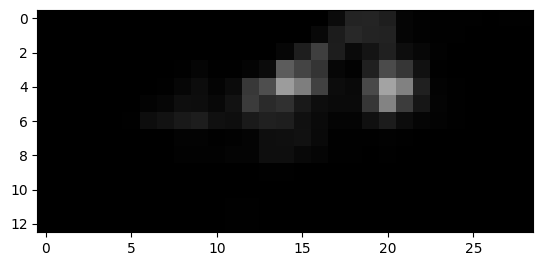

1391


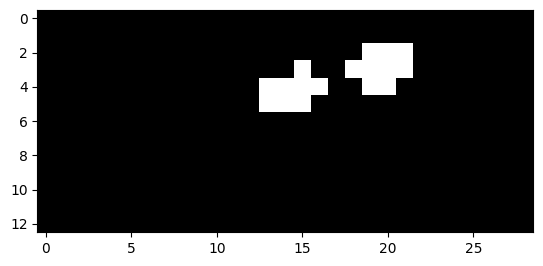

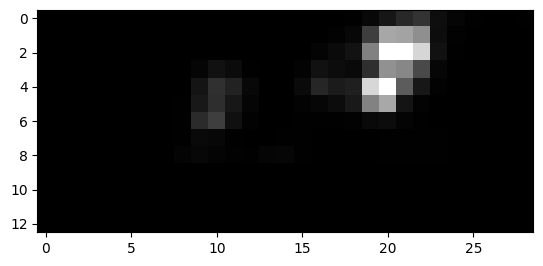

1392


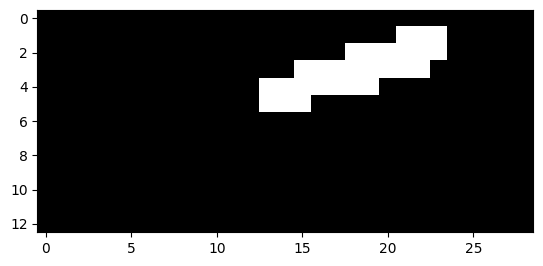

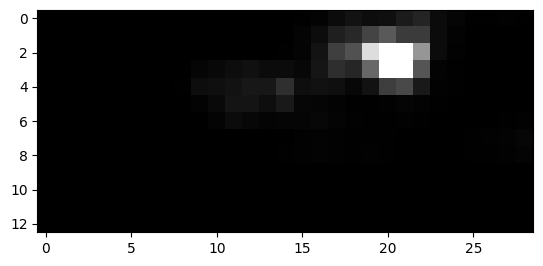

1393


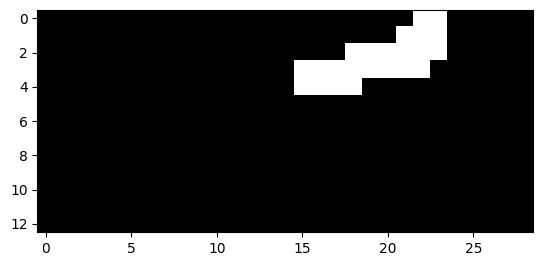

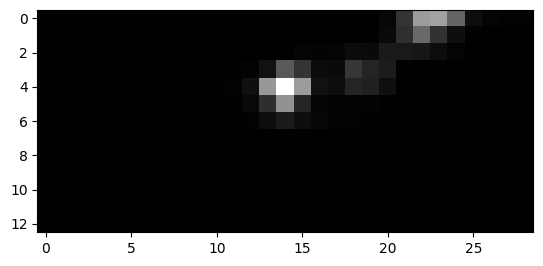

1394


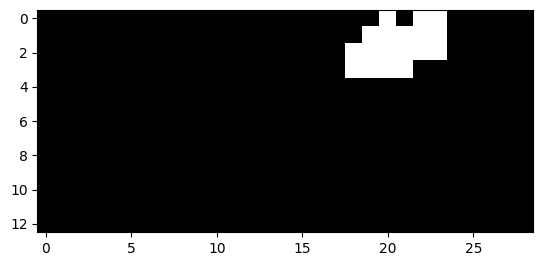

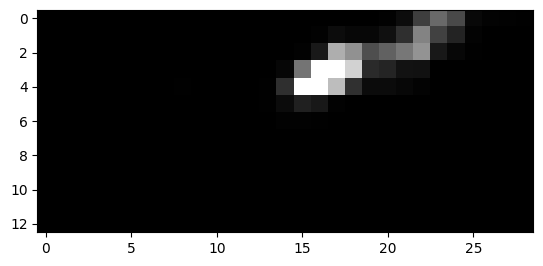

1395


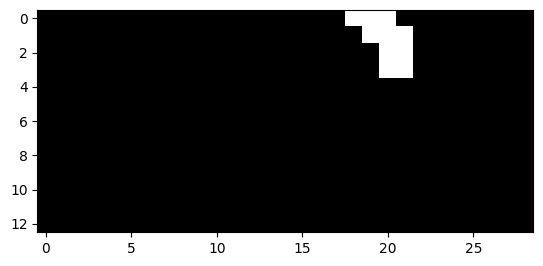

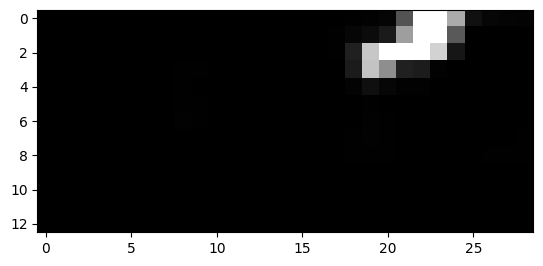

1396


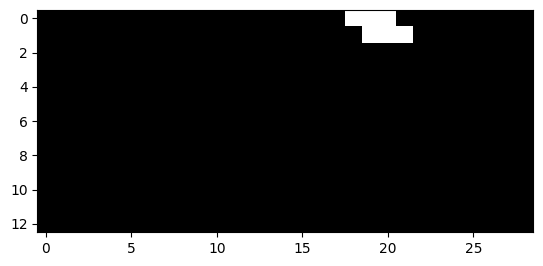

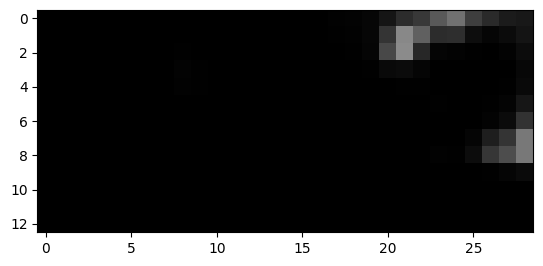

1397


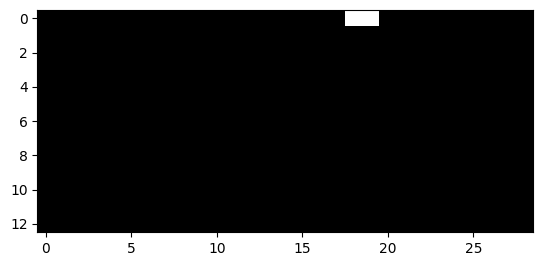

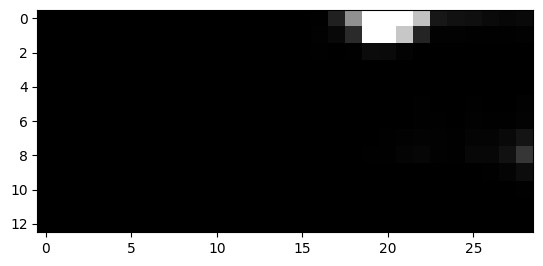

1402


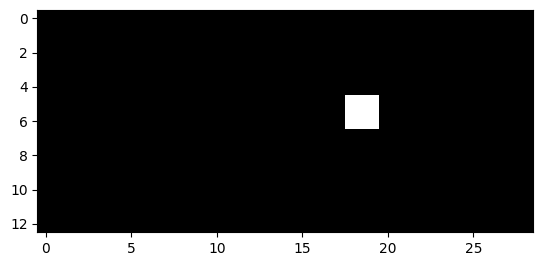

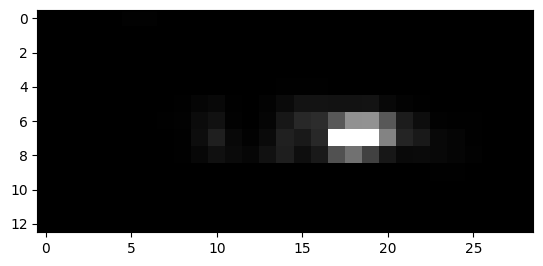

1403


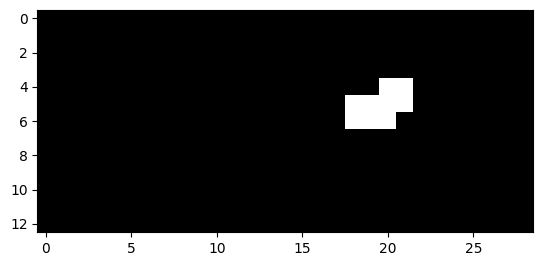

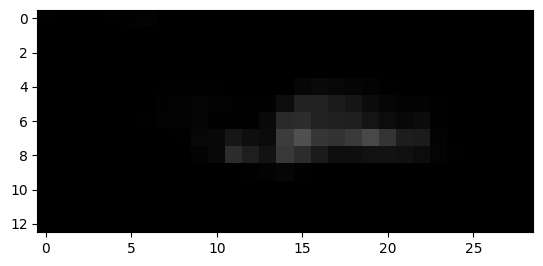

1404


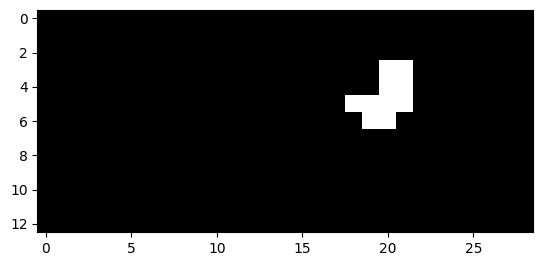

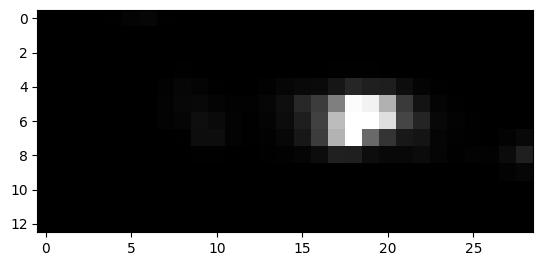

1405


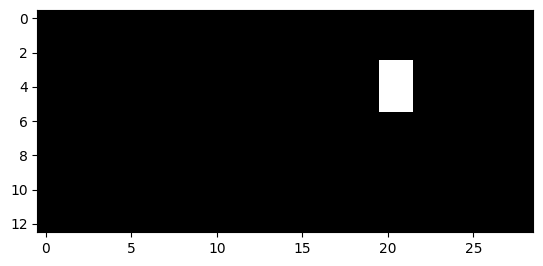

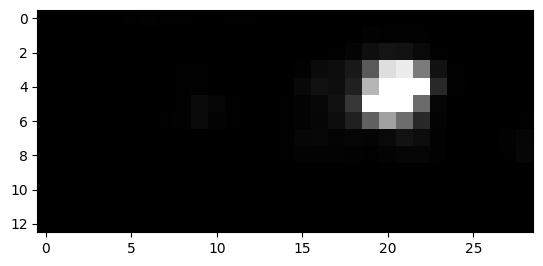

1406


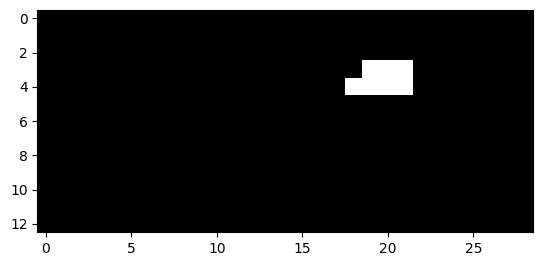

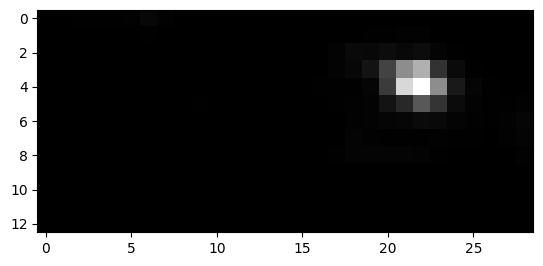

1407


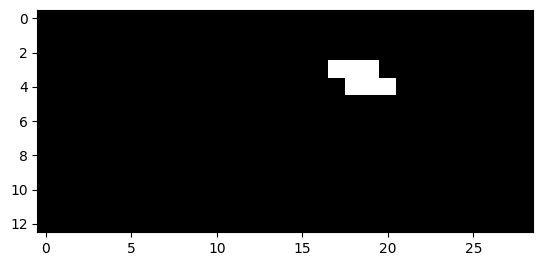

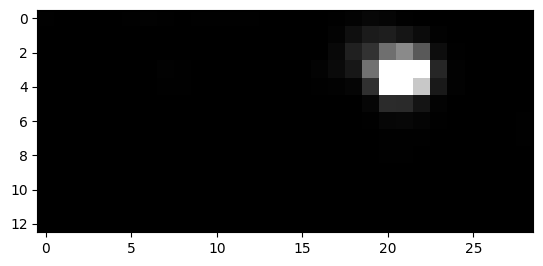

1408


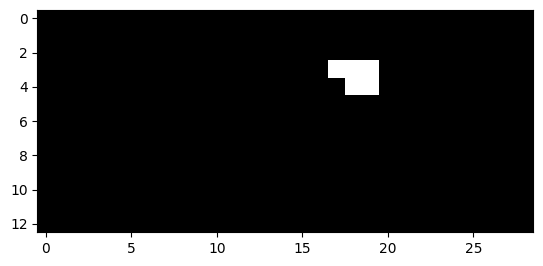

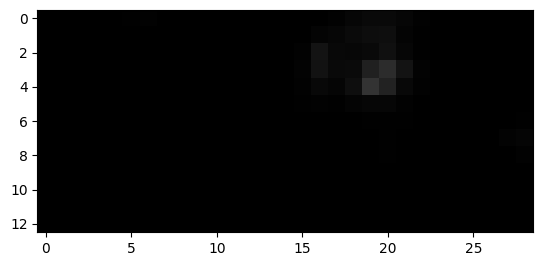

1411


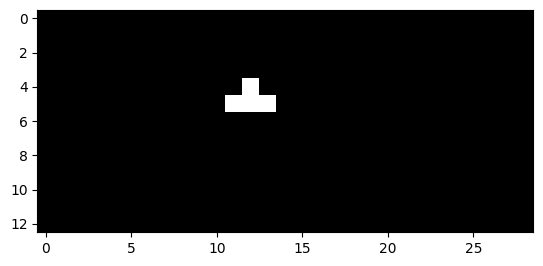

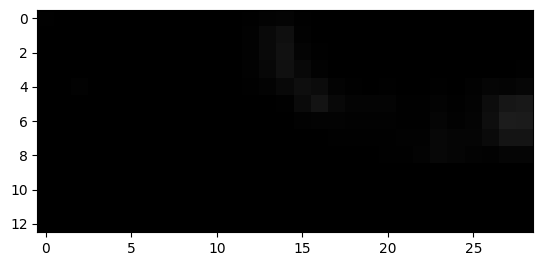

1412


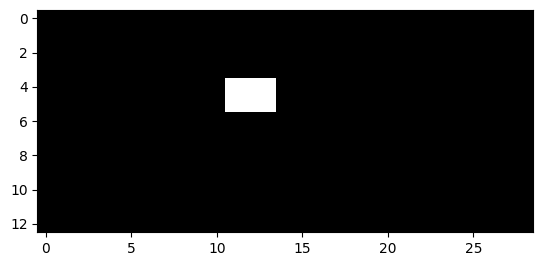

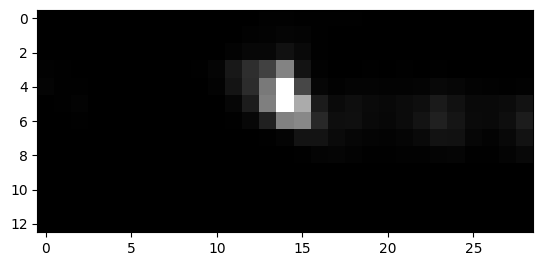

1413


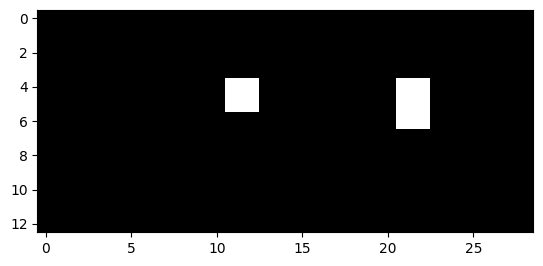

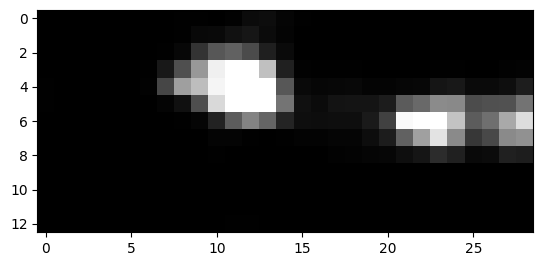

1414


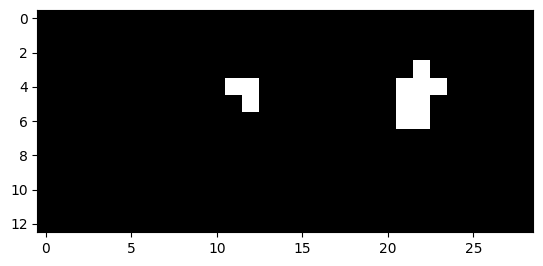

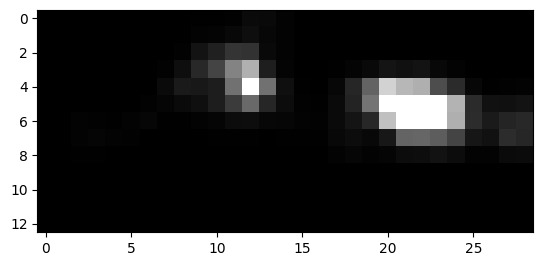

1415


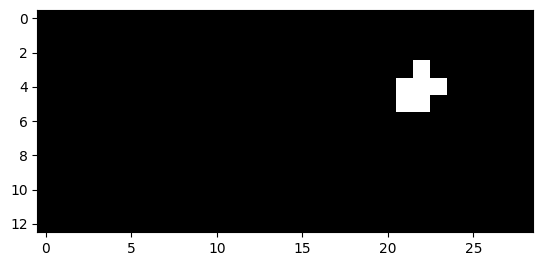

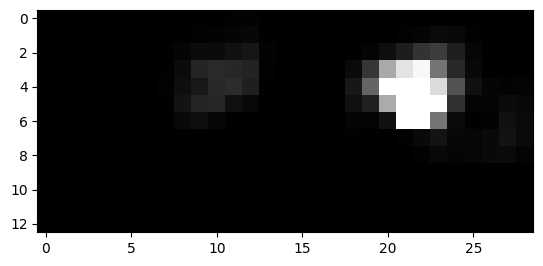

1416


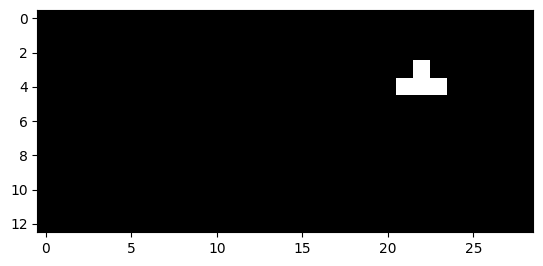

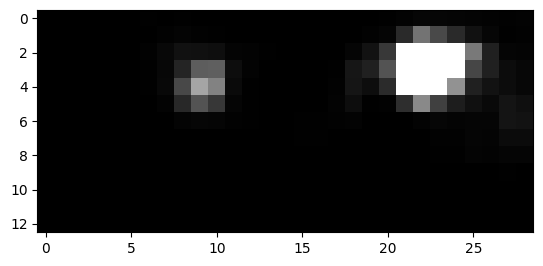

1418


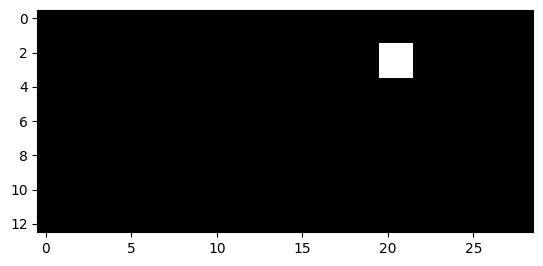

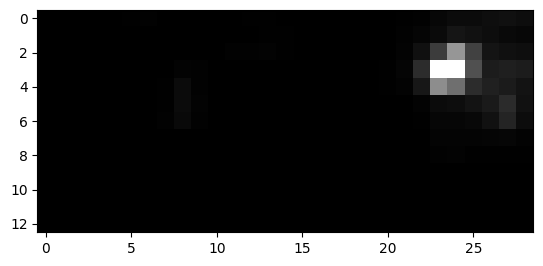

1419


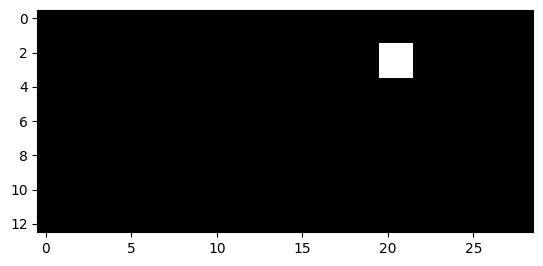

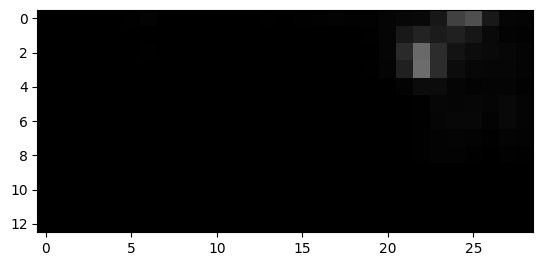

1440


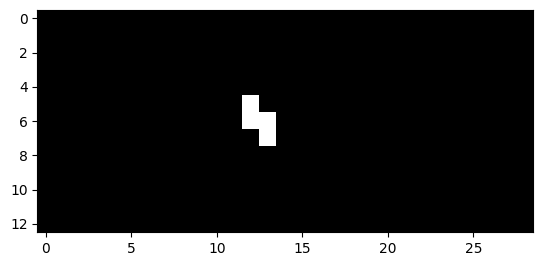

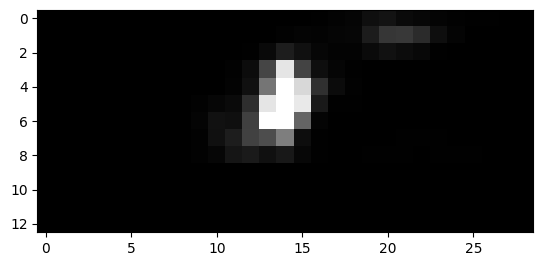

1441


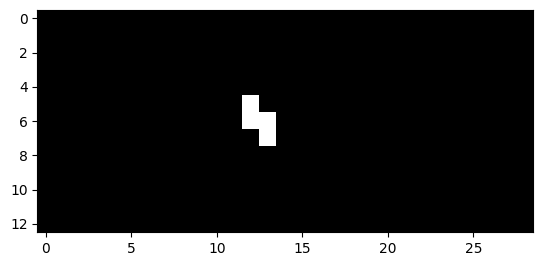

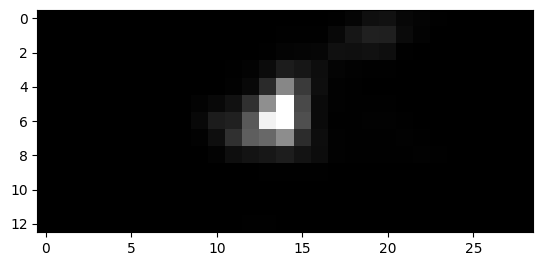

1442


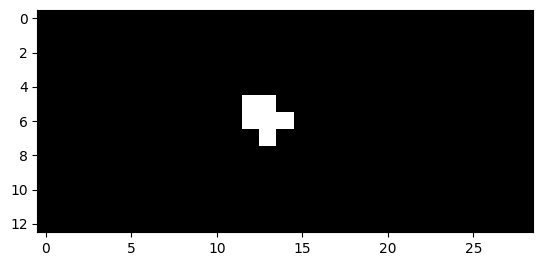

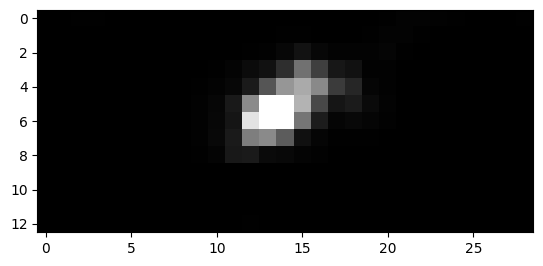

1443


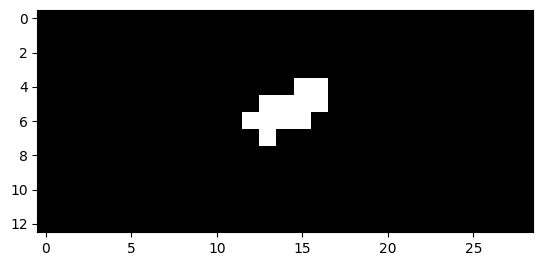

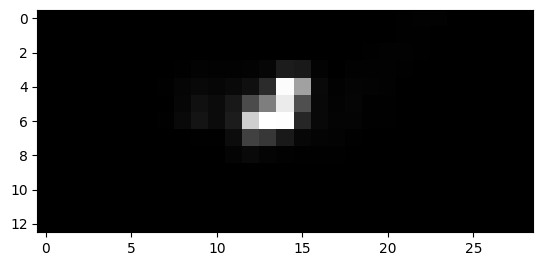

1444


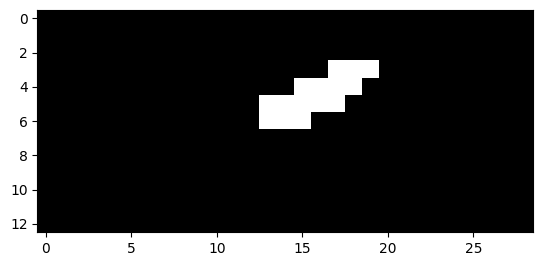

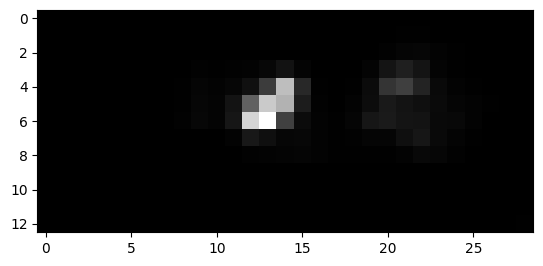

1445


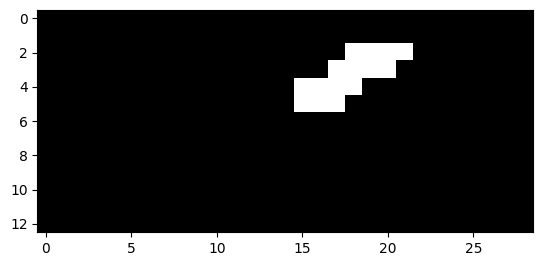

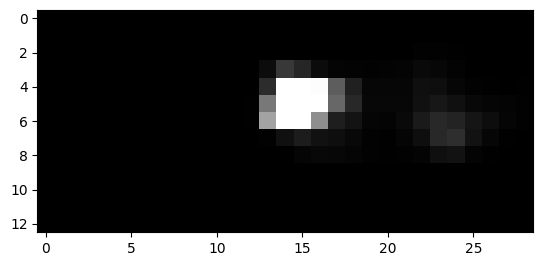

1446


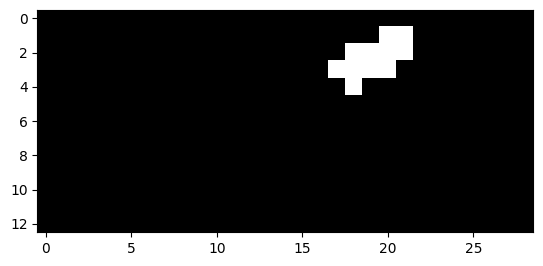

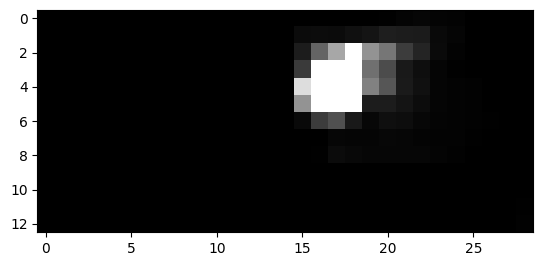

1447


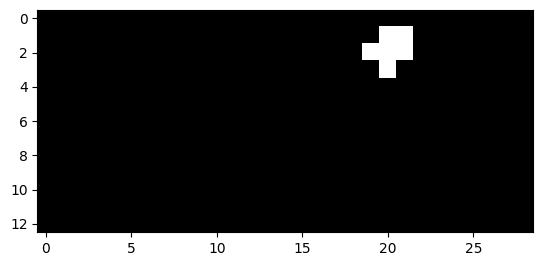

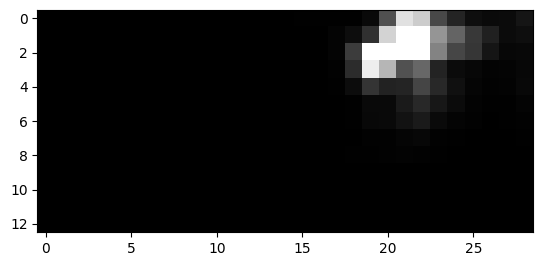

1459


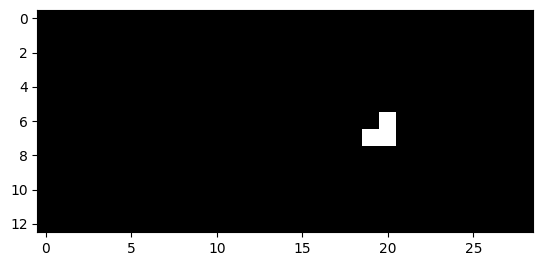

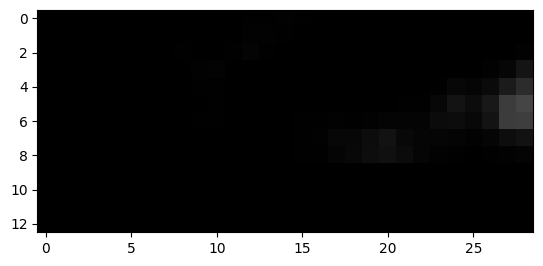

1460


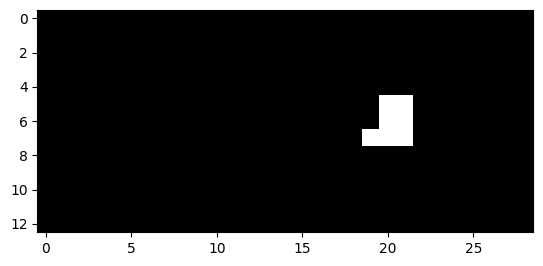

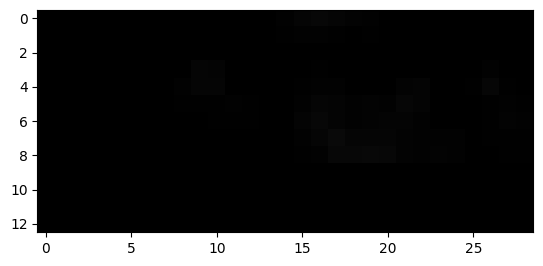

1461


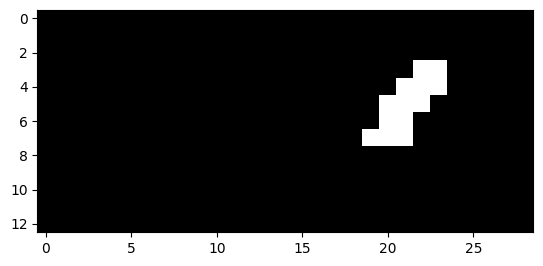

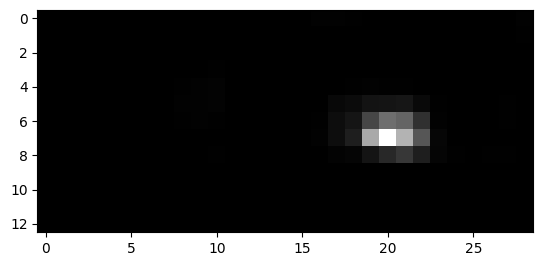

1462


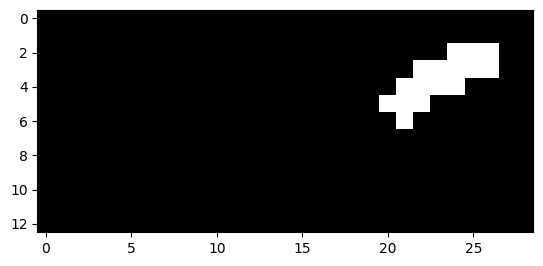

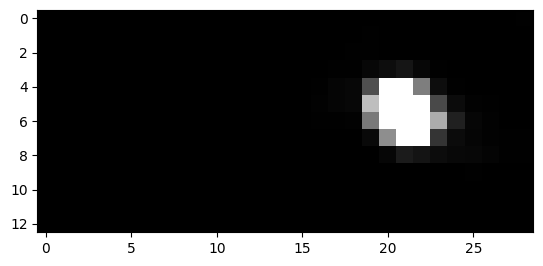

1463


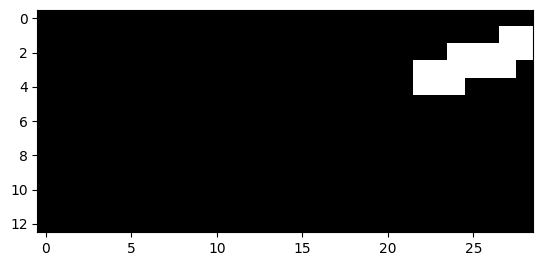

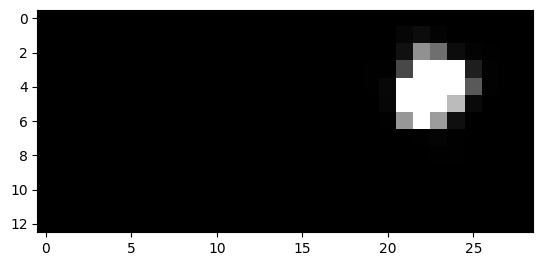

1464


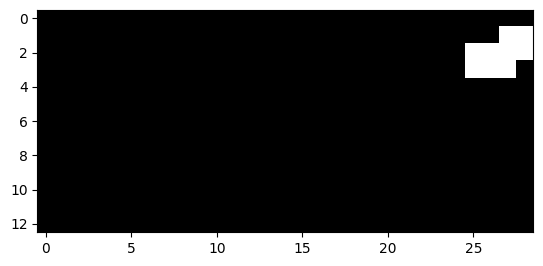

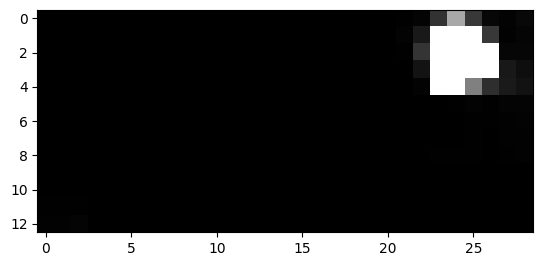

1465


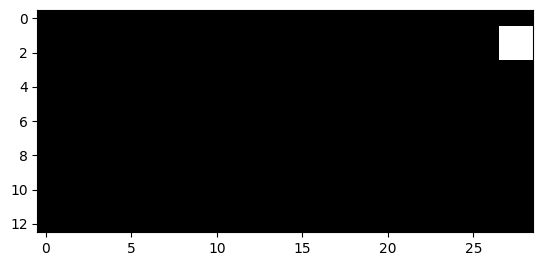

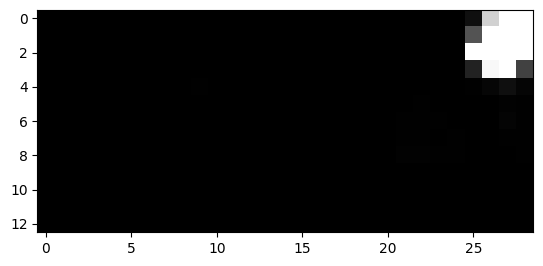

1472


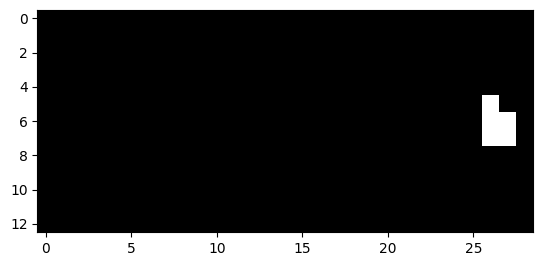

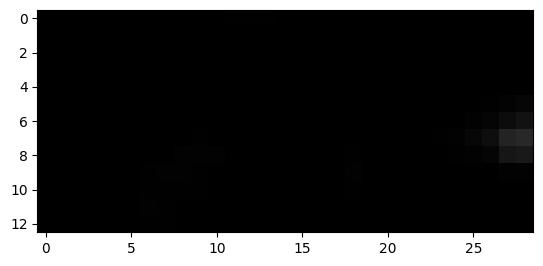

1473


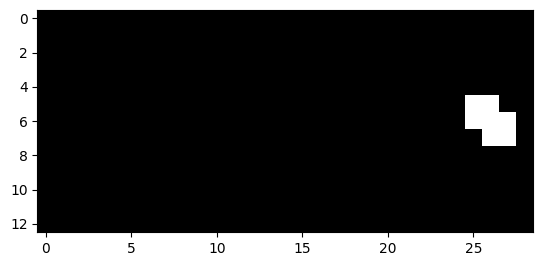

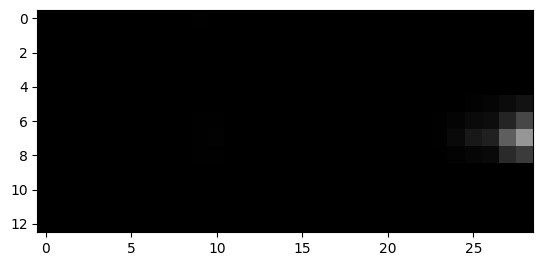

1474


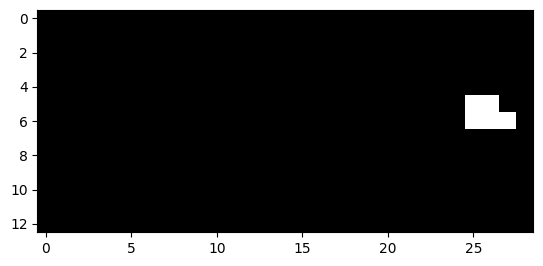

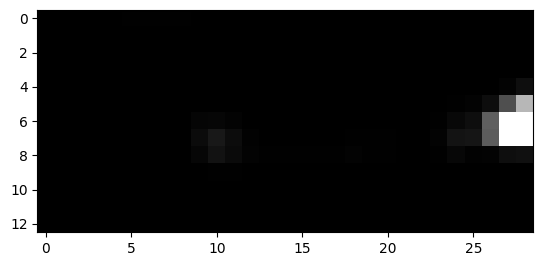

1508


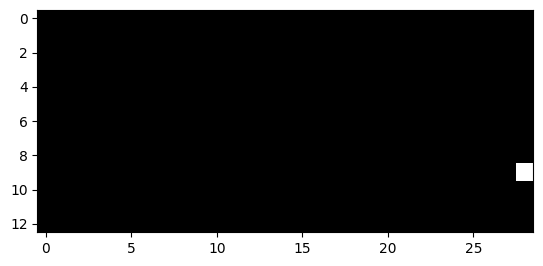

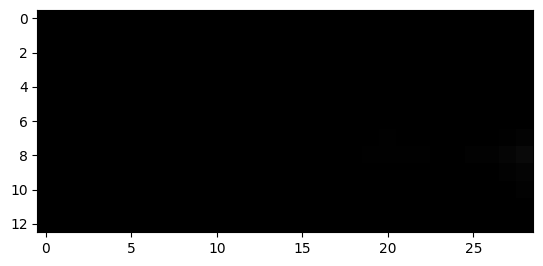

1509


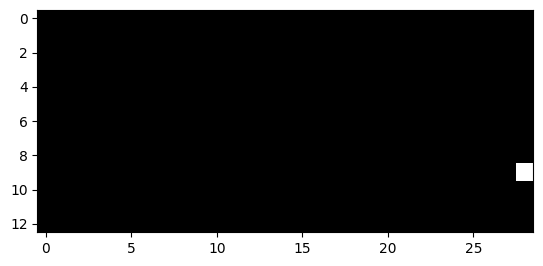

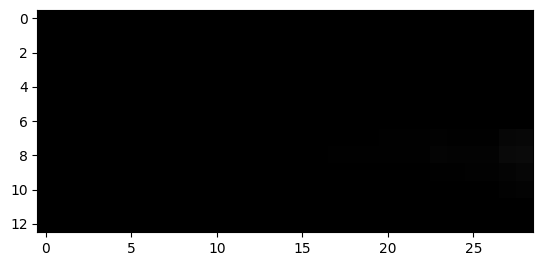

1510


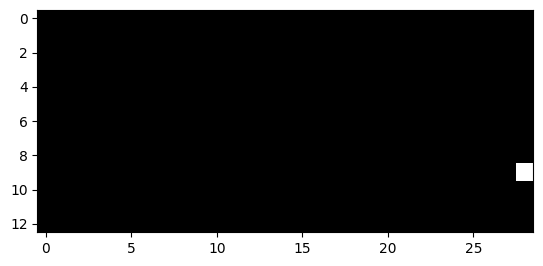

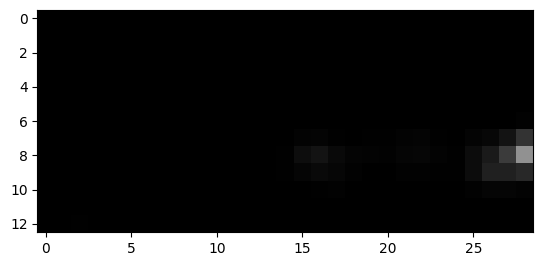

1686


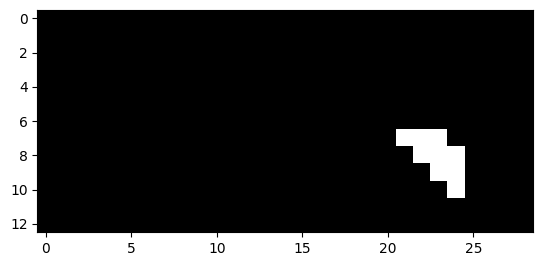

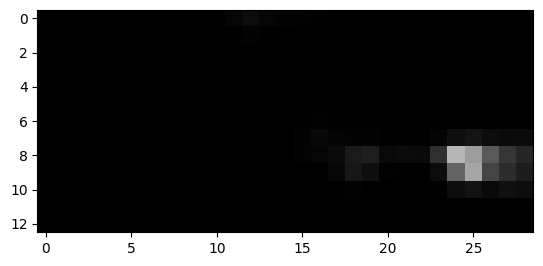

1687


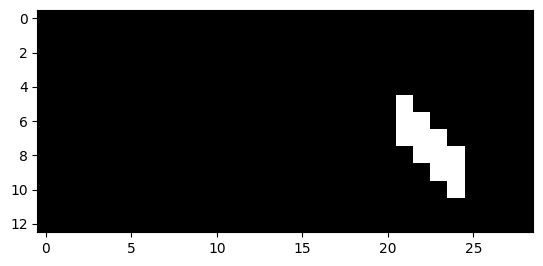

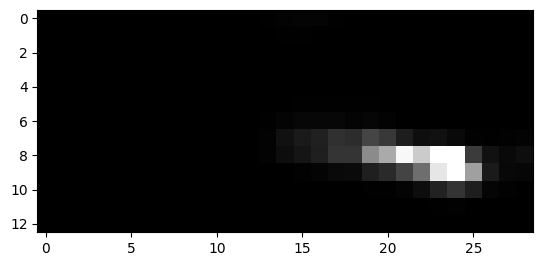

1688


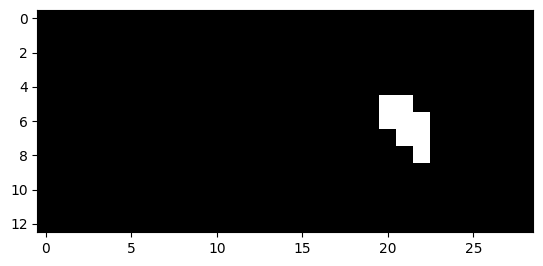

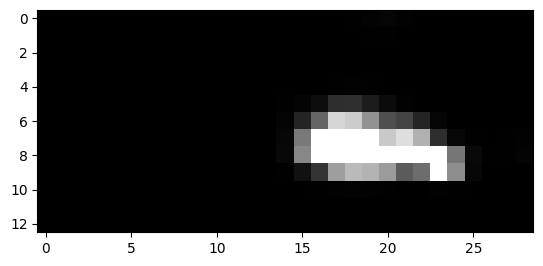

1689


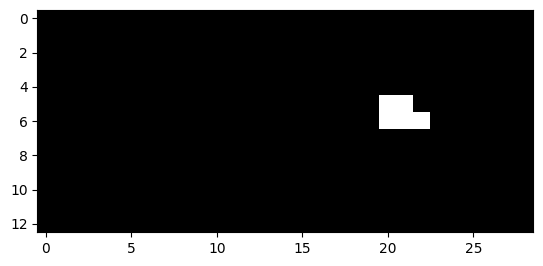

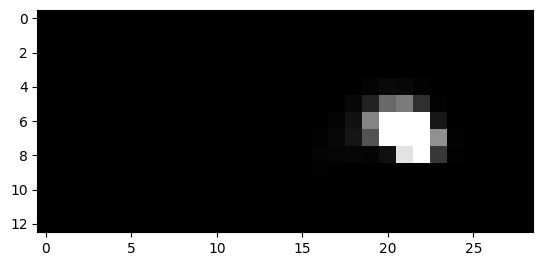

1690


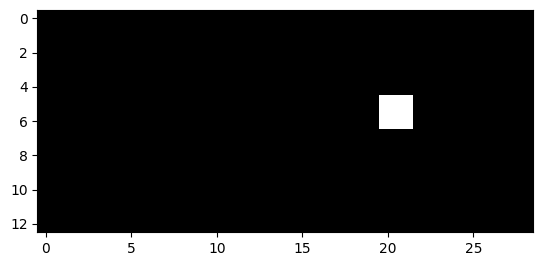

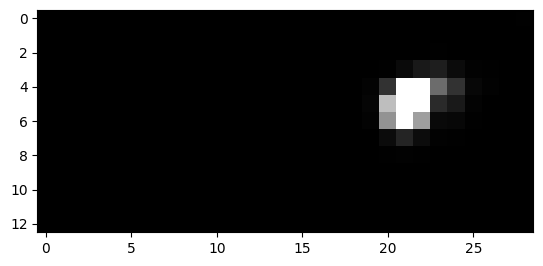

1709


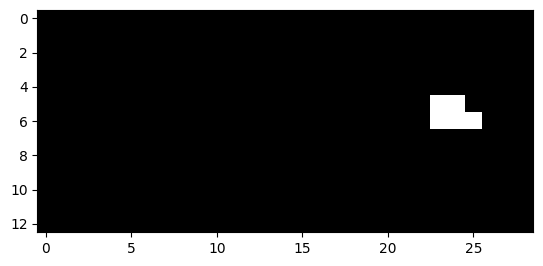

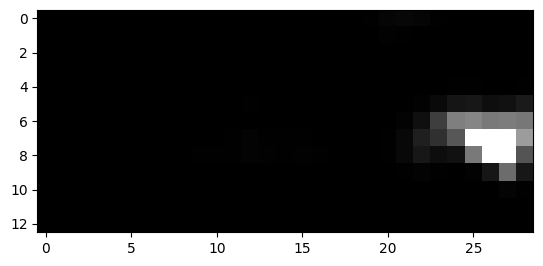

1710


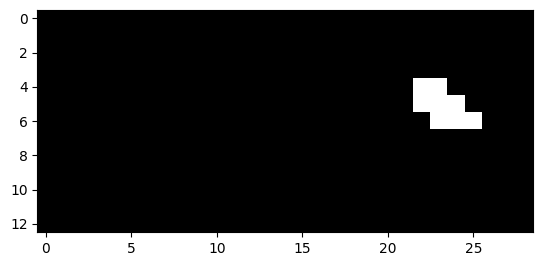

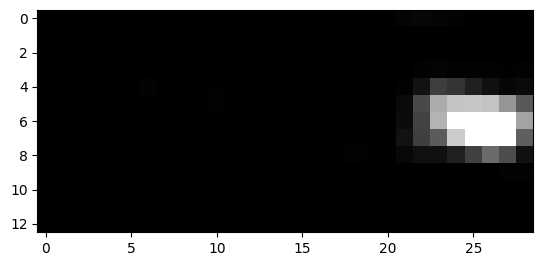

1711


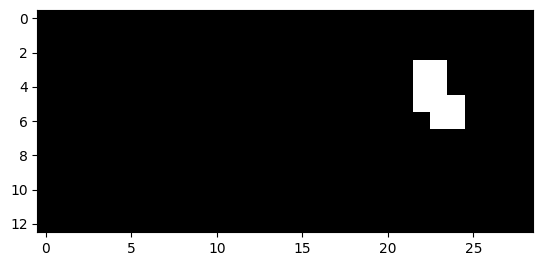

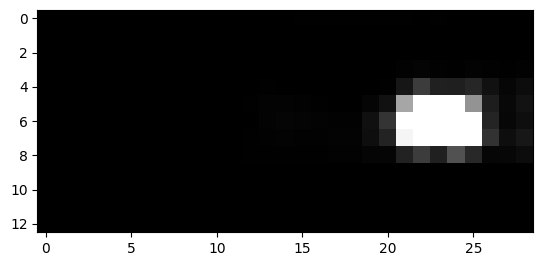

1712


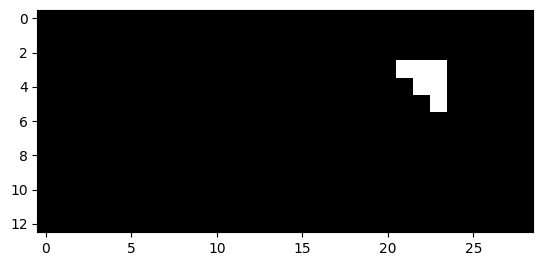

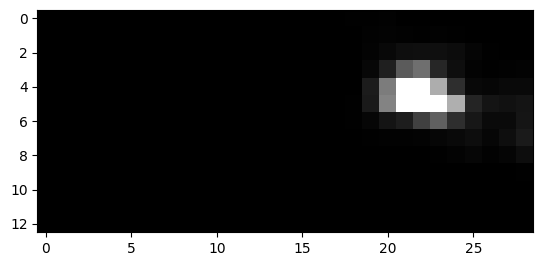

1713


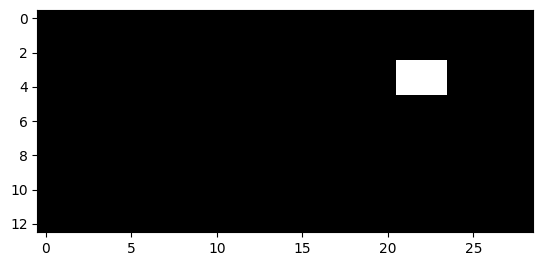

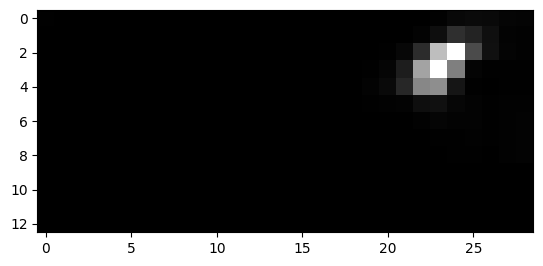

1714


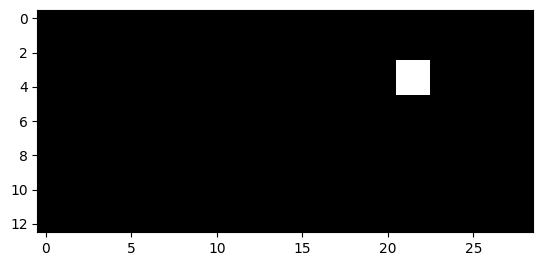

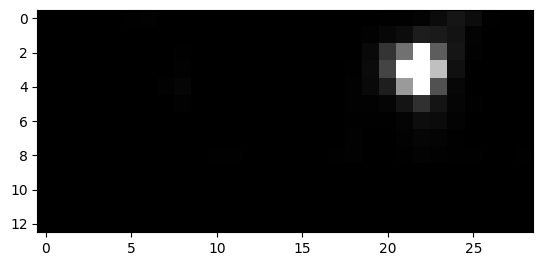

1727


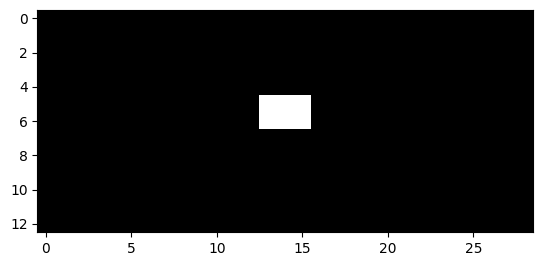

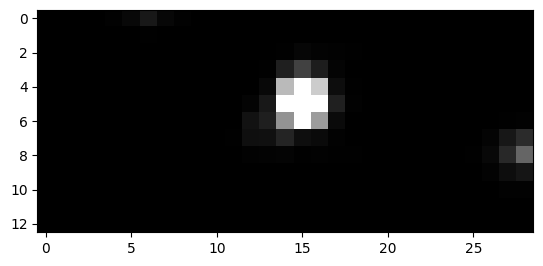

1728


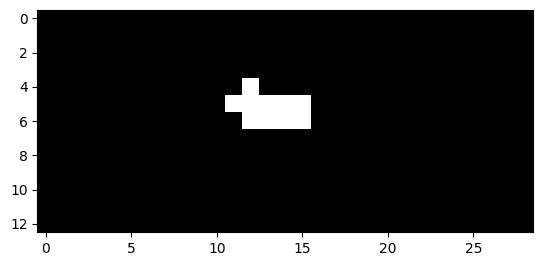

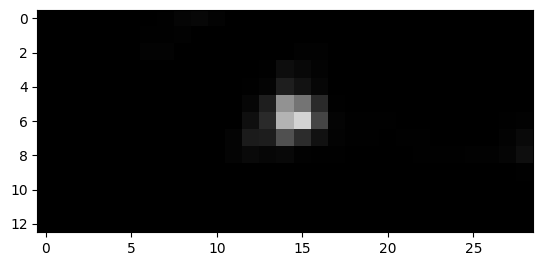

1729


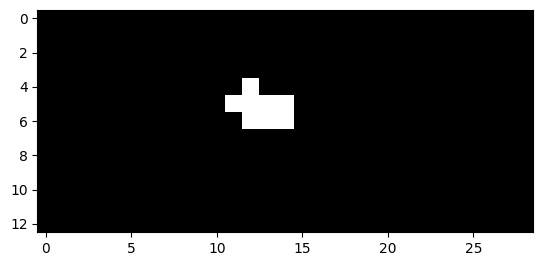

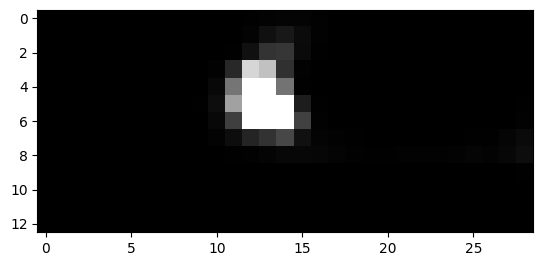

1730


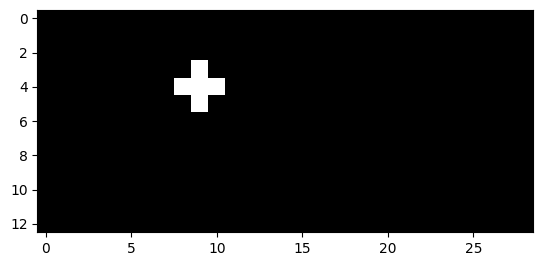

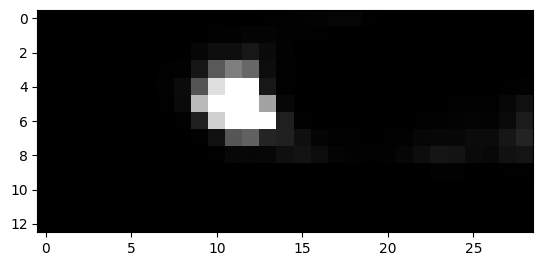

1731


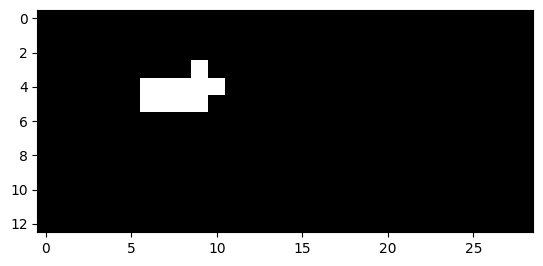

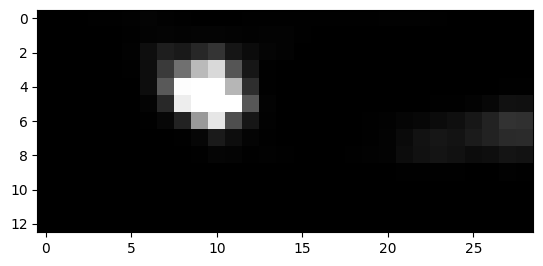

1732


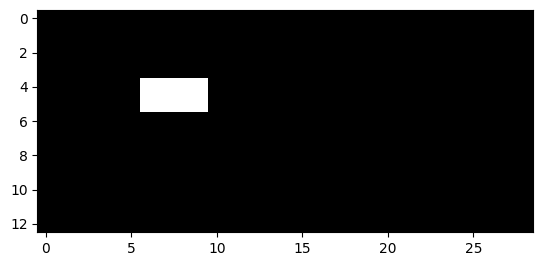

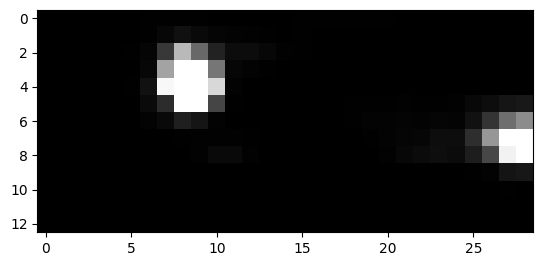

1734


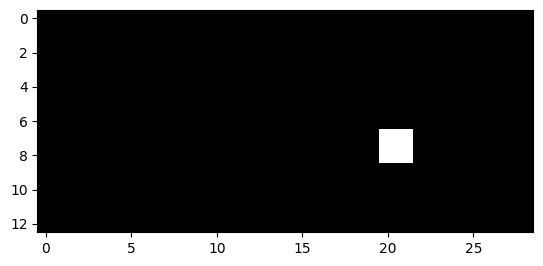

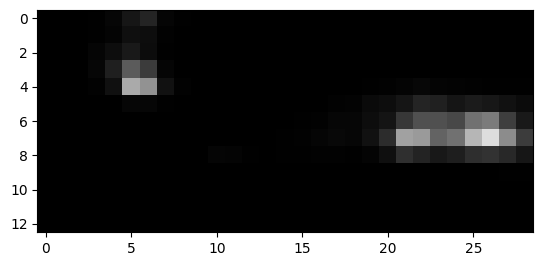

1735


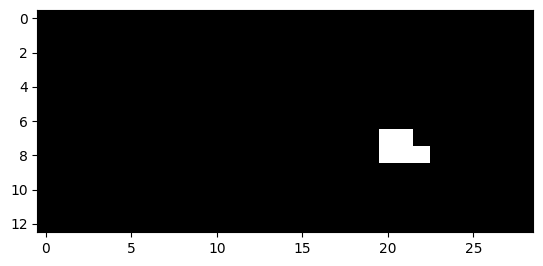

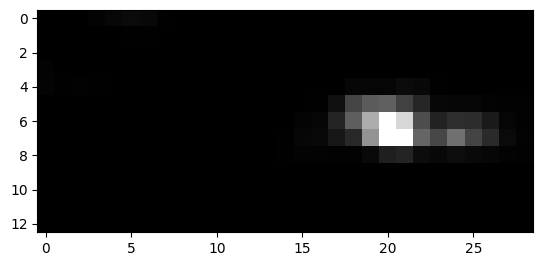

1736


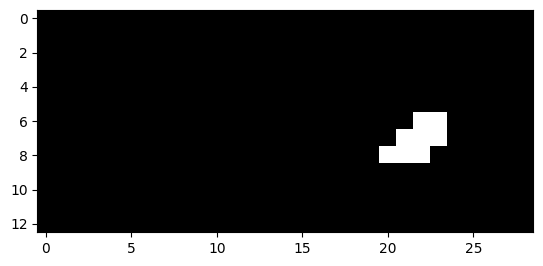

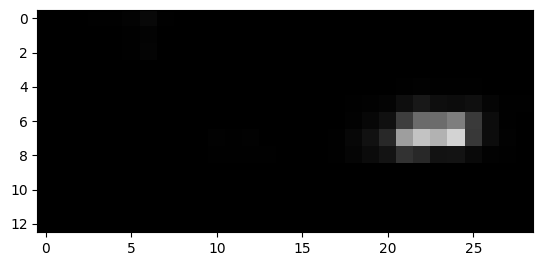

1737


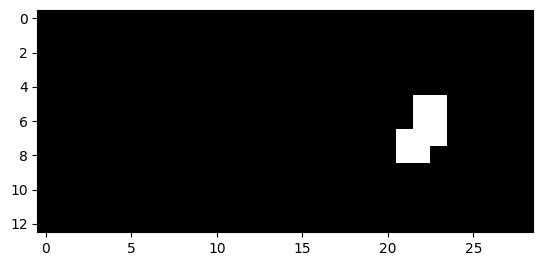

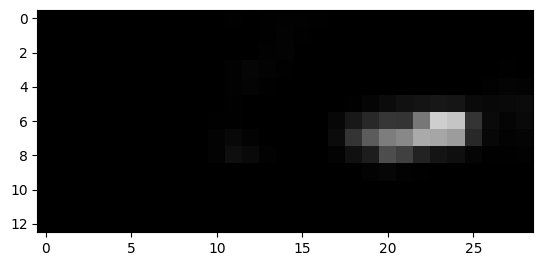

1738


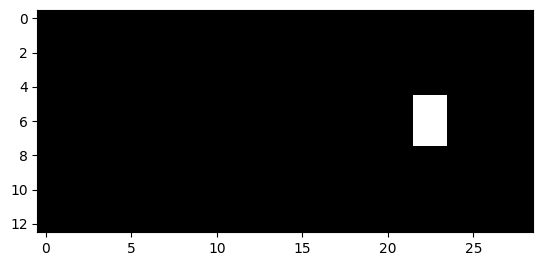

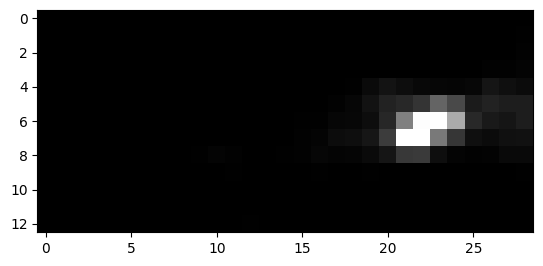

1739


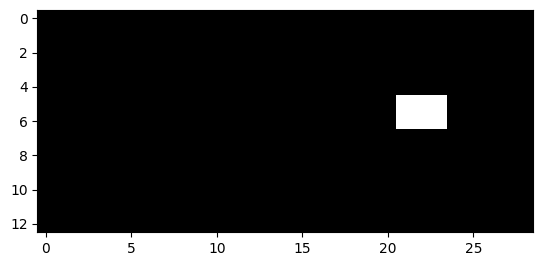

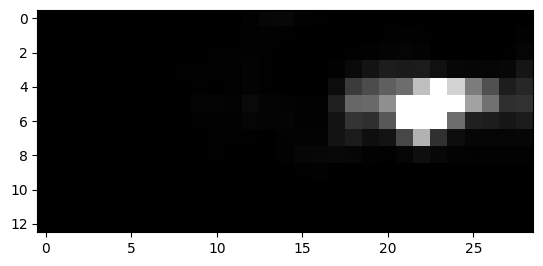

1740


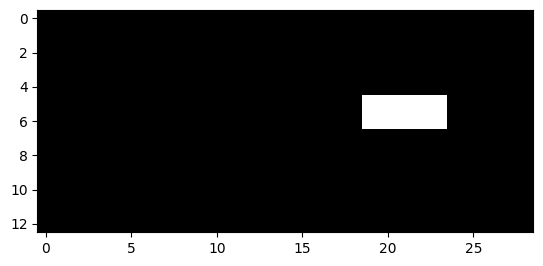

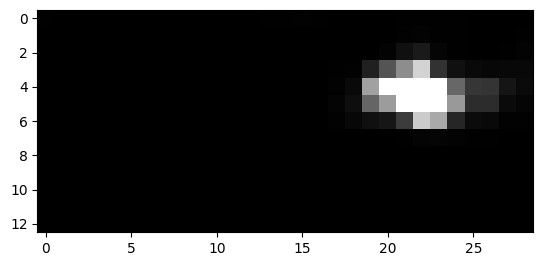

1741


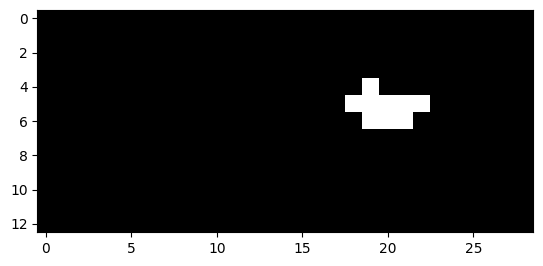

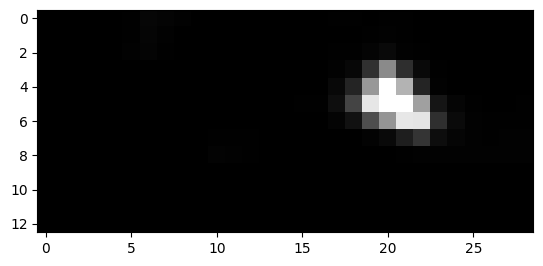

1742


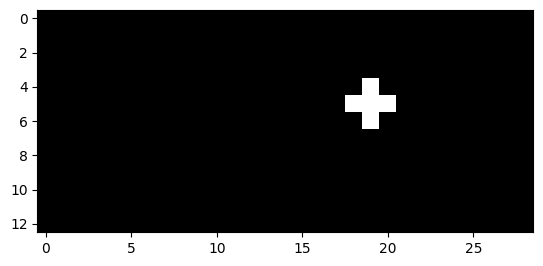

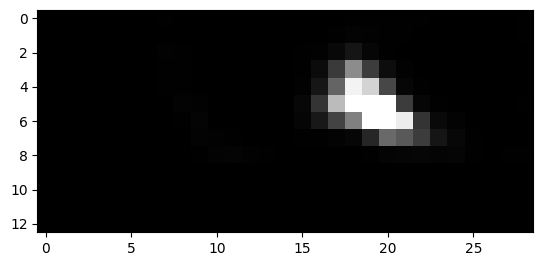

1749


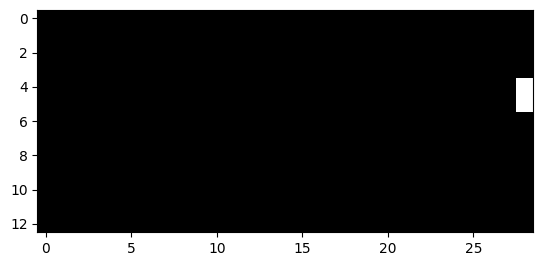

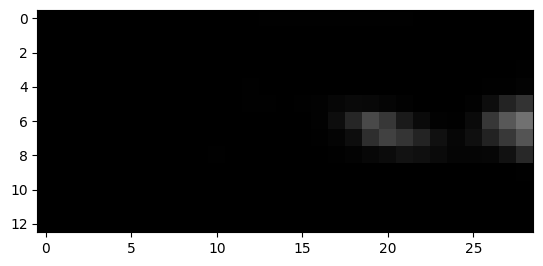

1750


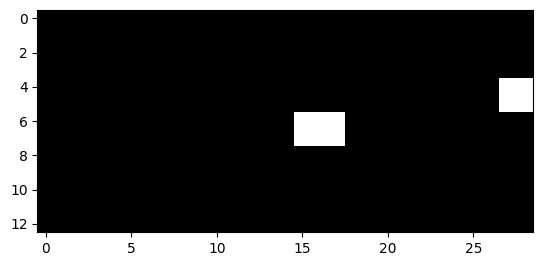

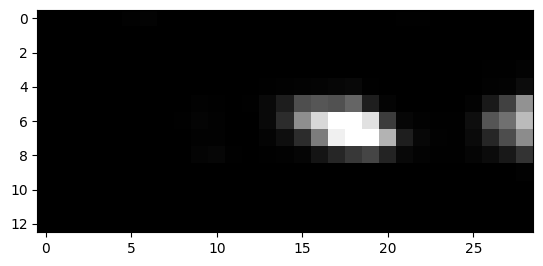

1751


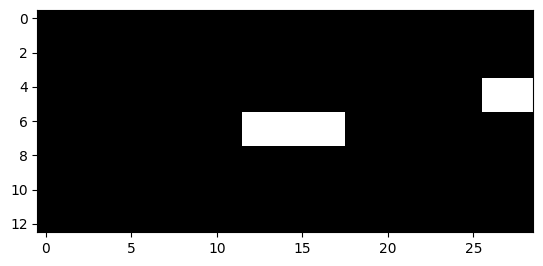

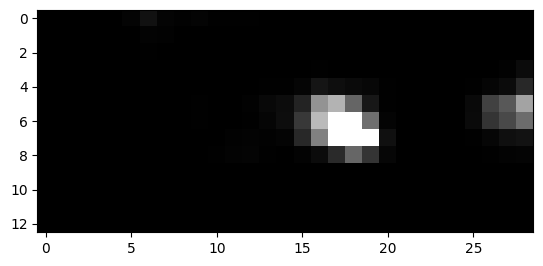

1752


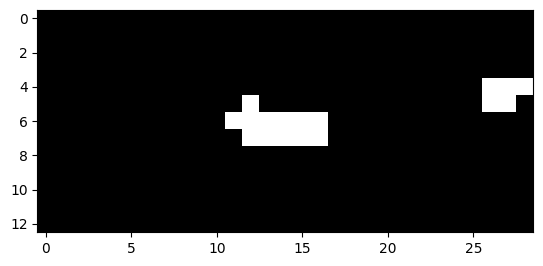

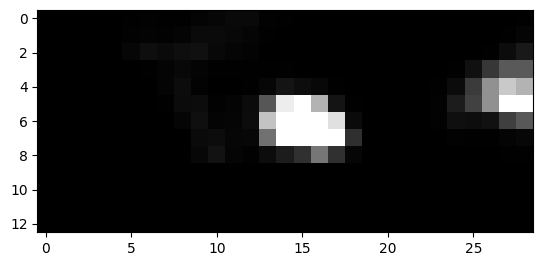

1753


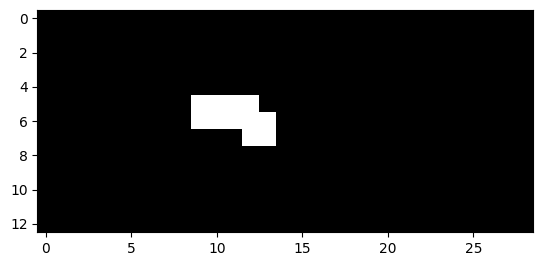

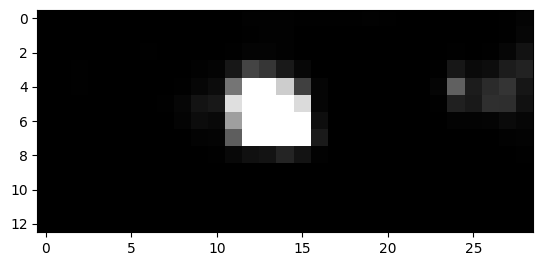

1754


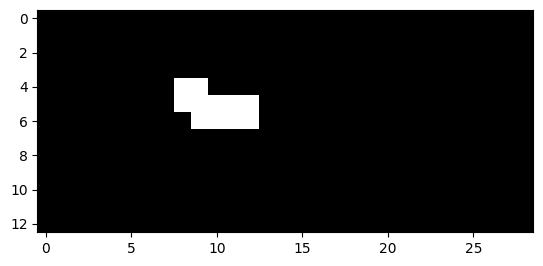

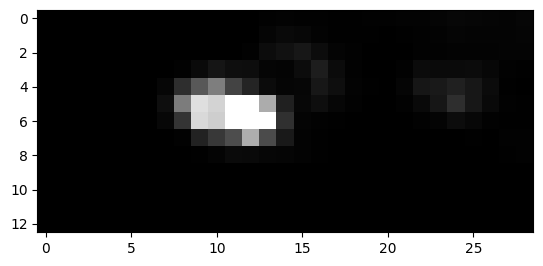

1755


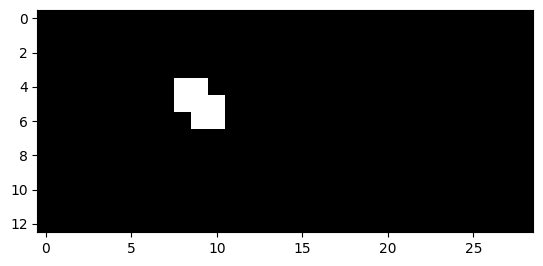

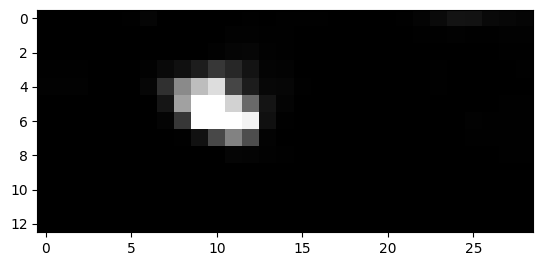

1759


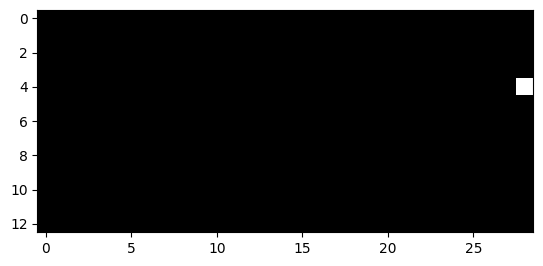

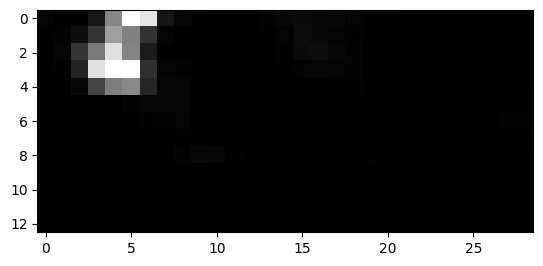

1760


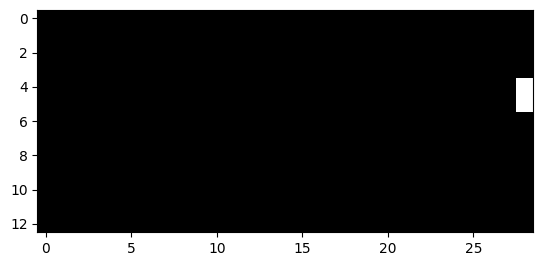

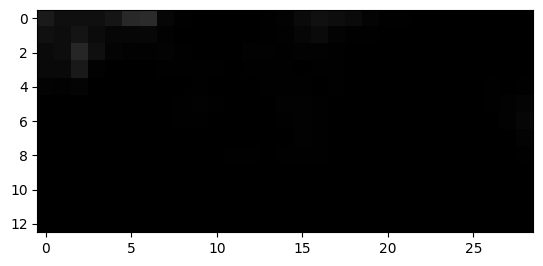

1761


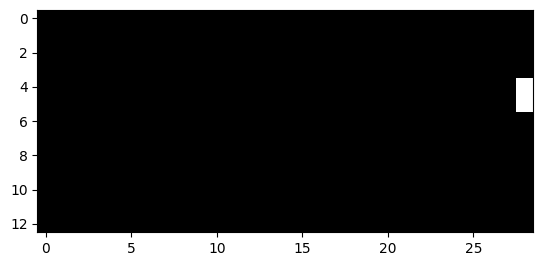

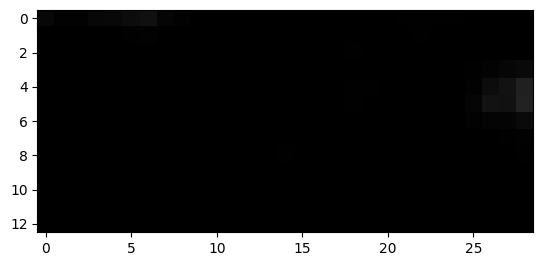

1769


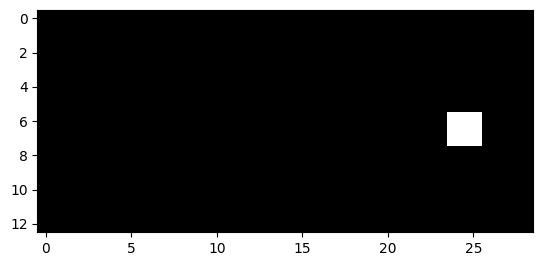

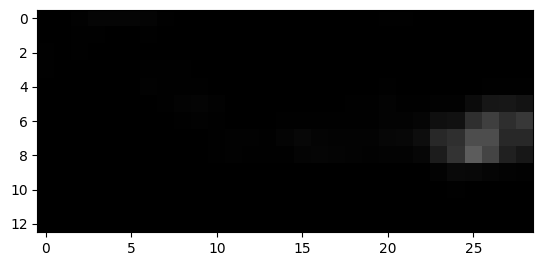

1770


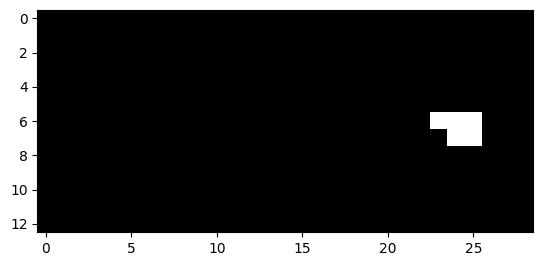

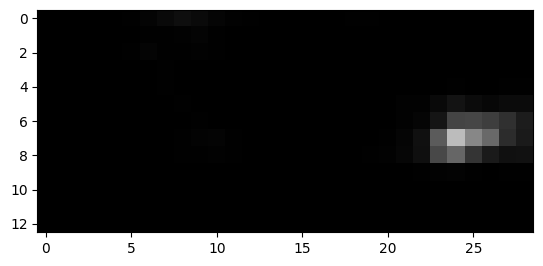

1771


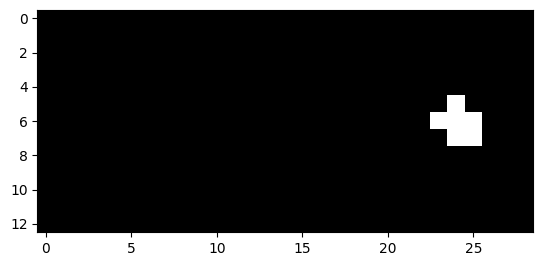

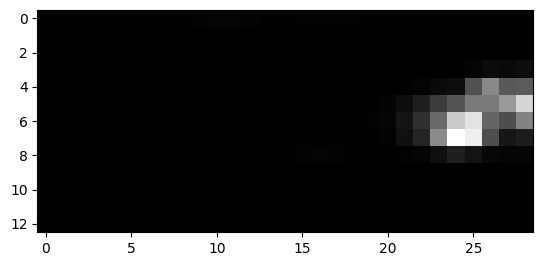

1772


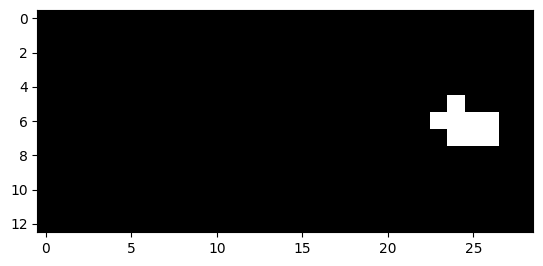

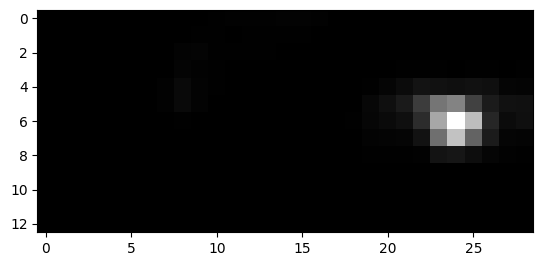

1773


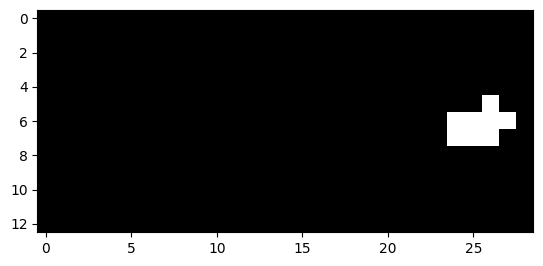

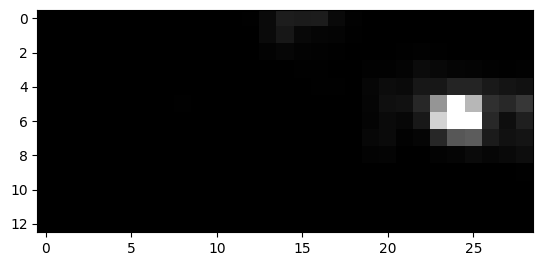

1774


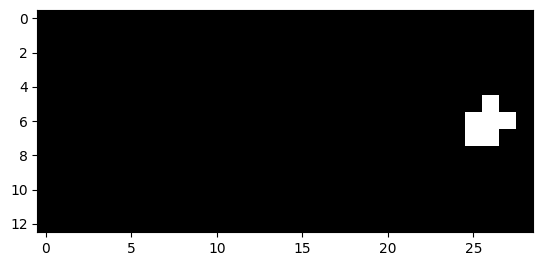

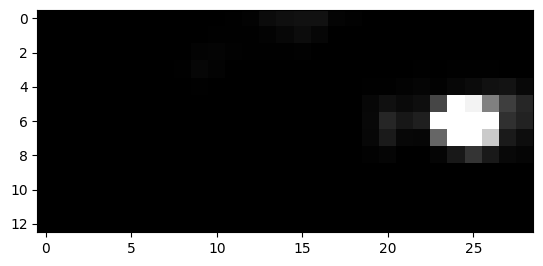

1775


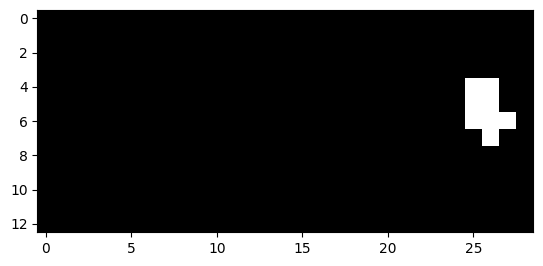

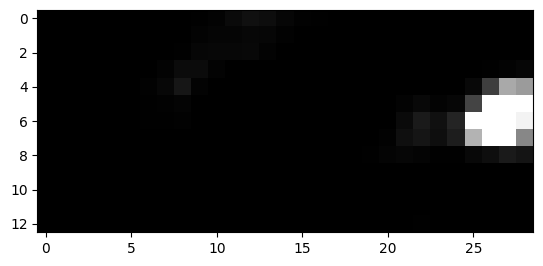

1776


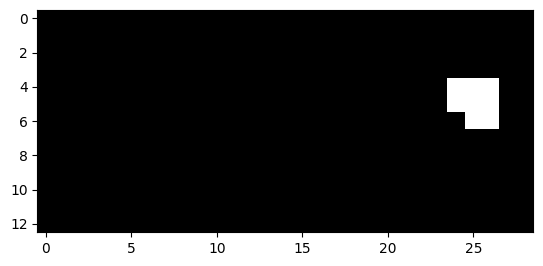

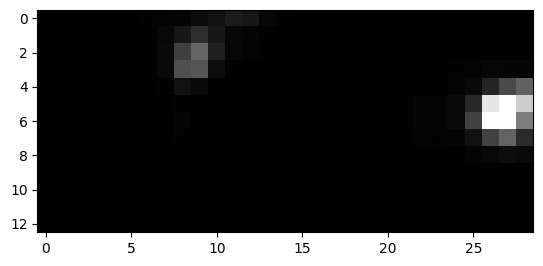

1777


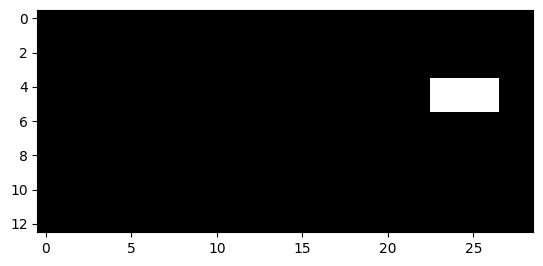

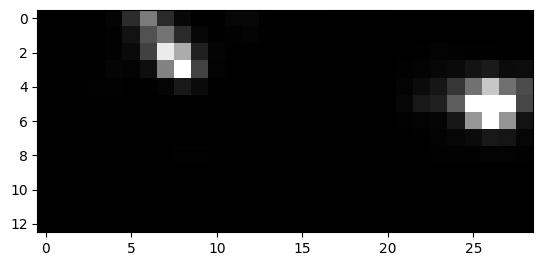

1778


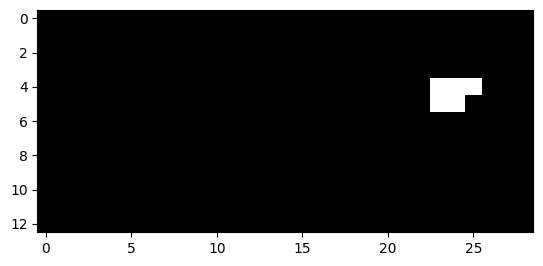

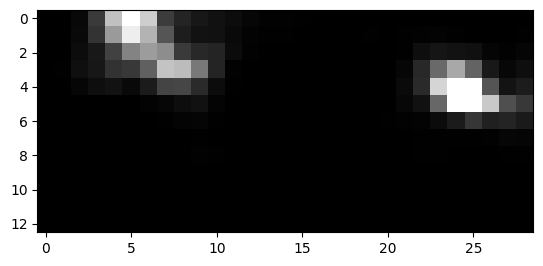

1785


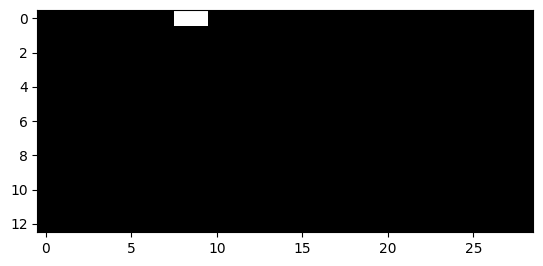

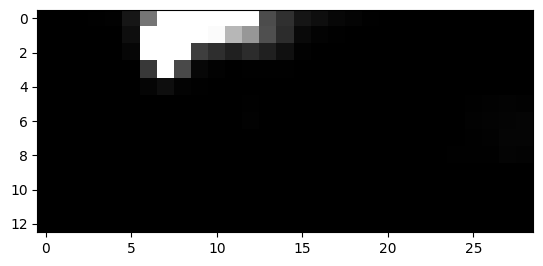

1786


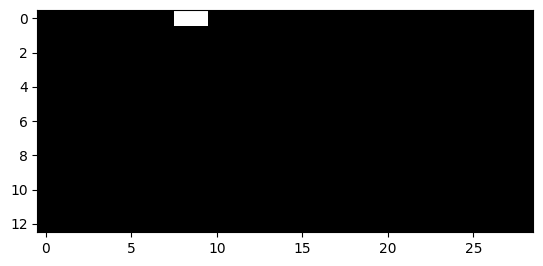

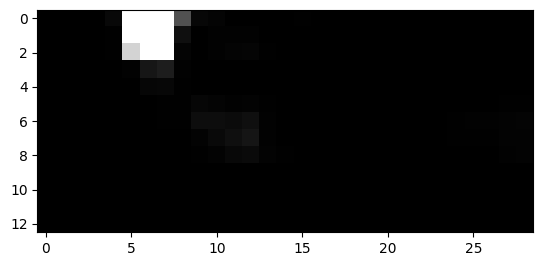

1791


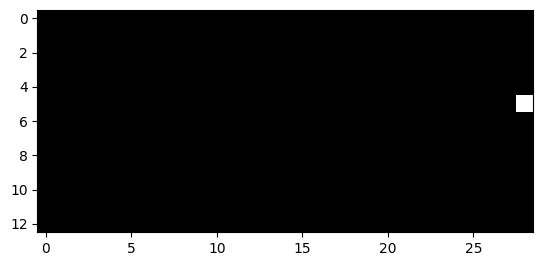

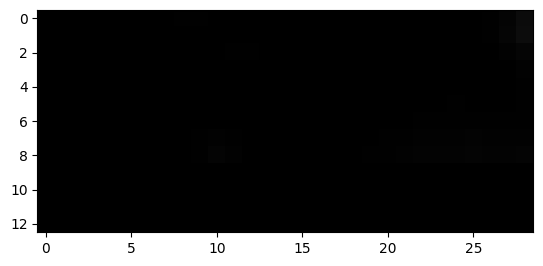

1792


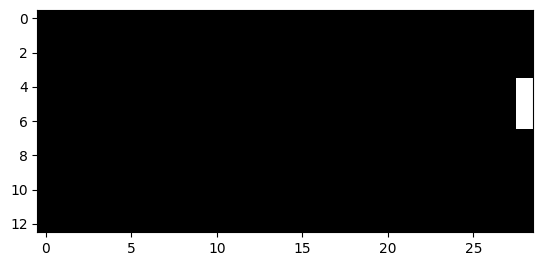

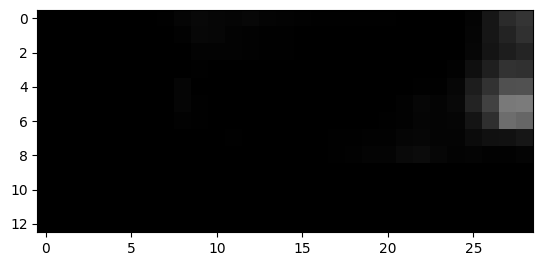

1793


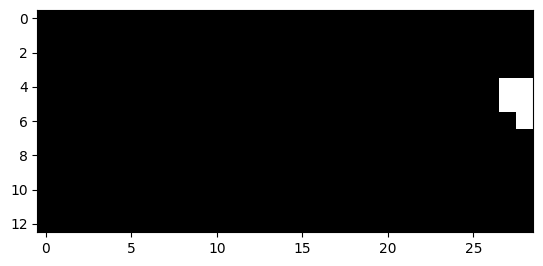

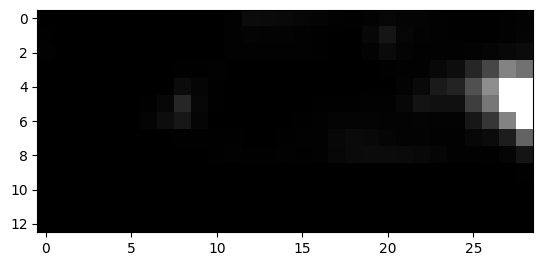

1794


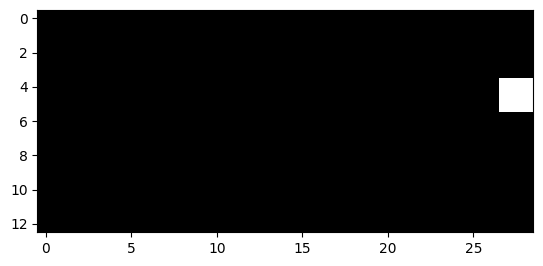

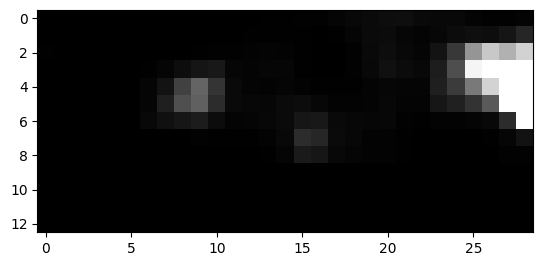

1795


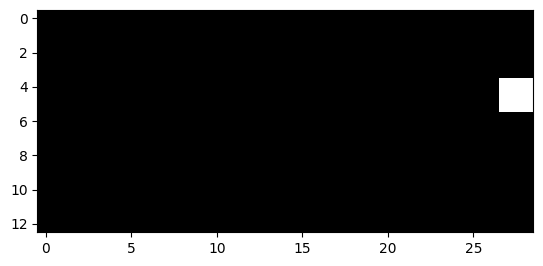

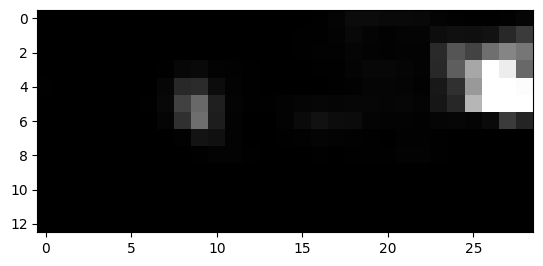

1796


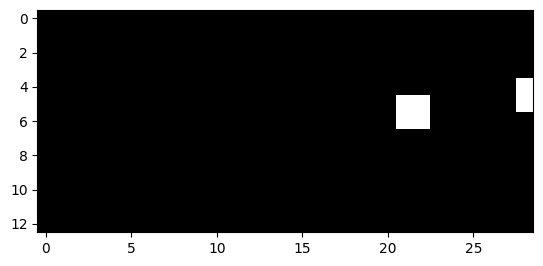

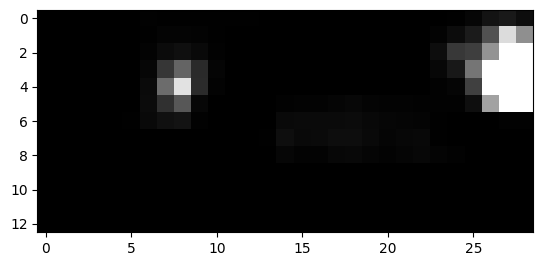

1797


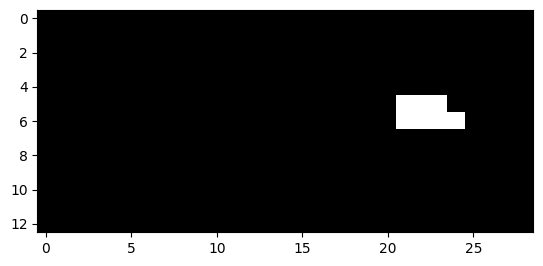

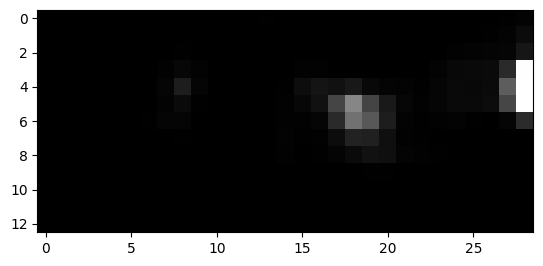

1798


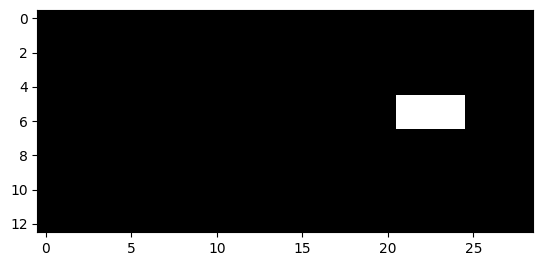

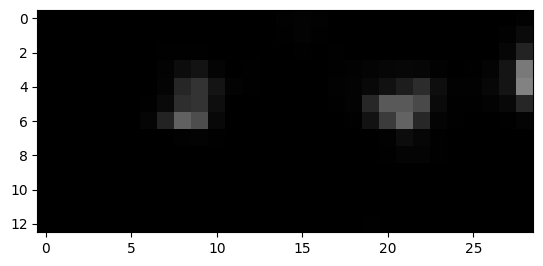

1799


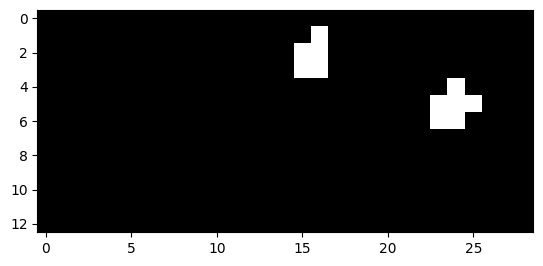

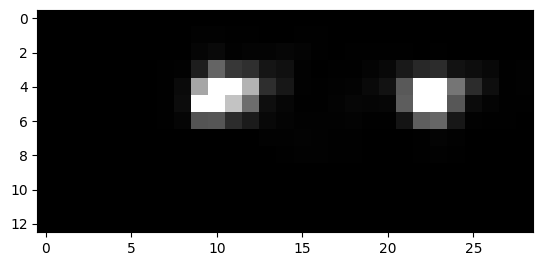

1800


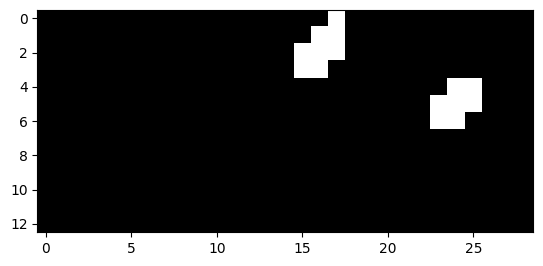

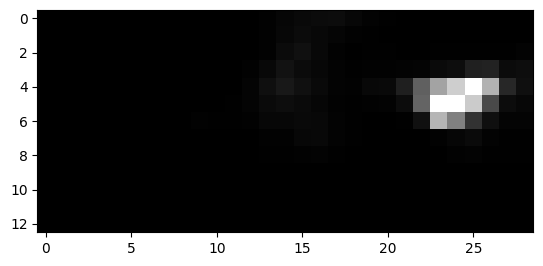

1801


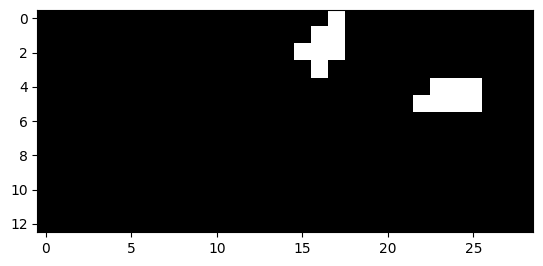

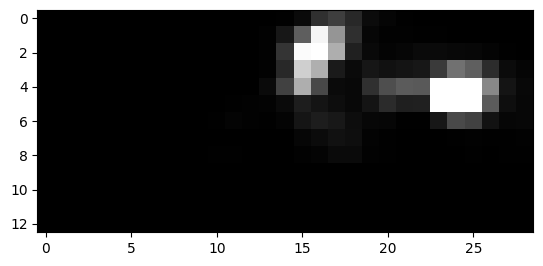

1802


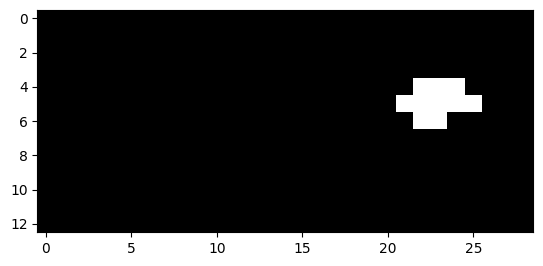

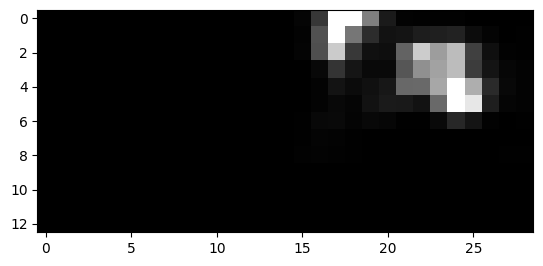

1803


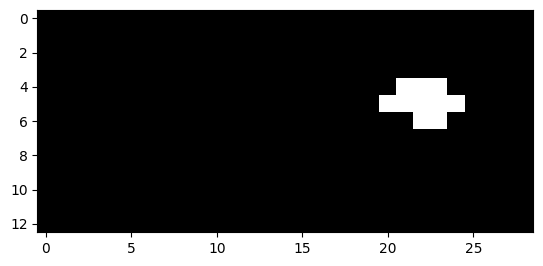

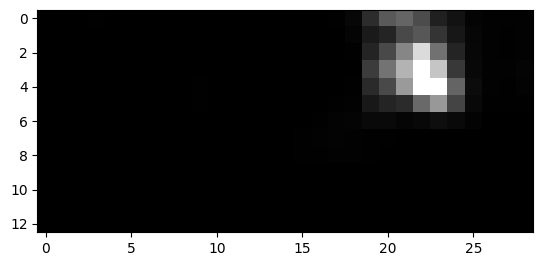

1804


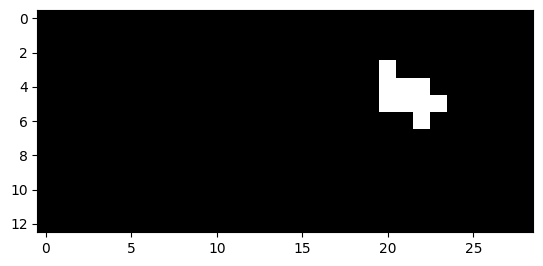

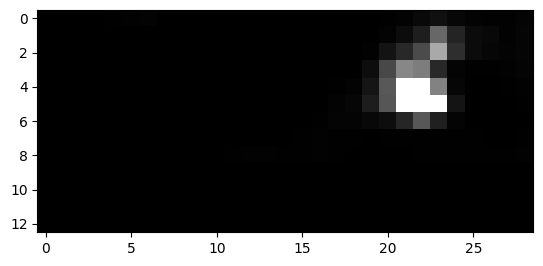

1805


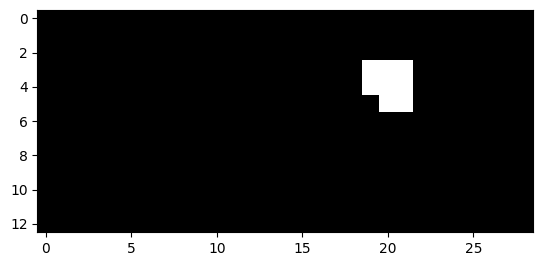

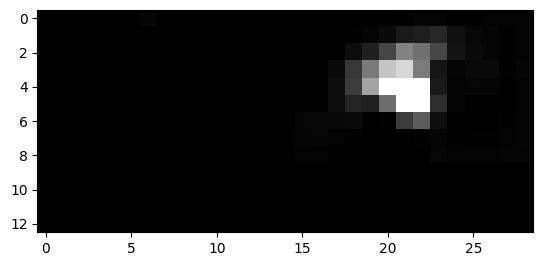

1806


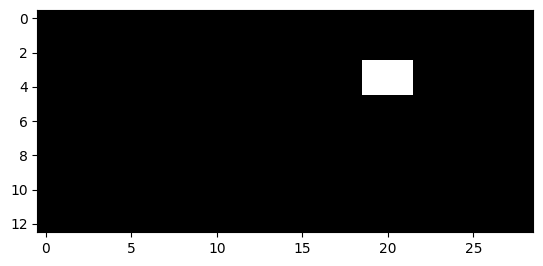

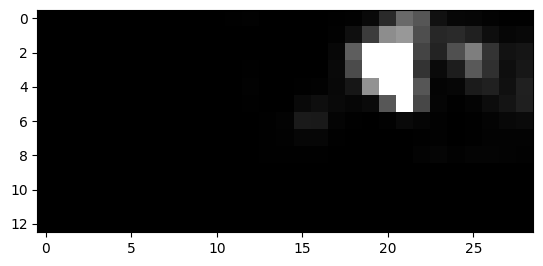

1807


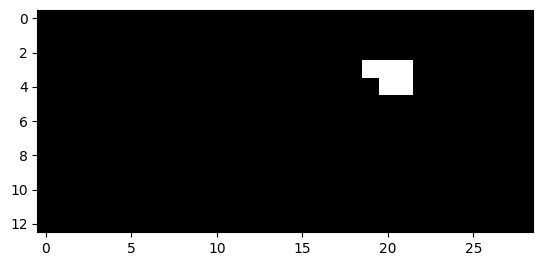

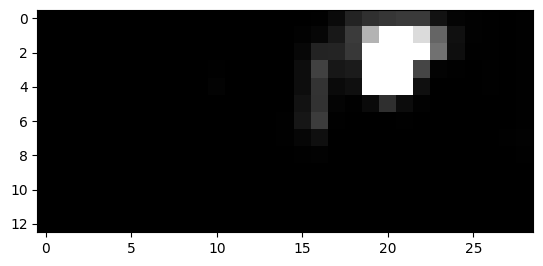

1808


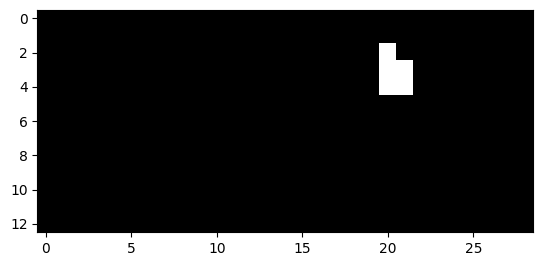

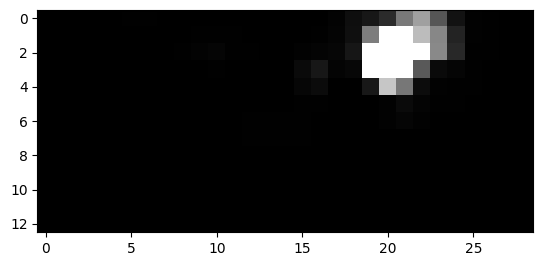

1809


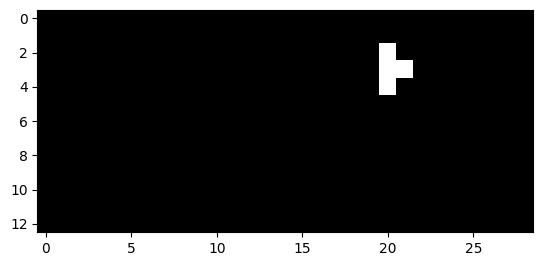

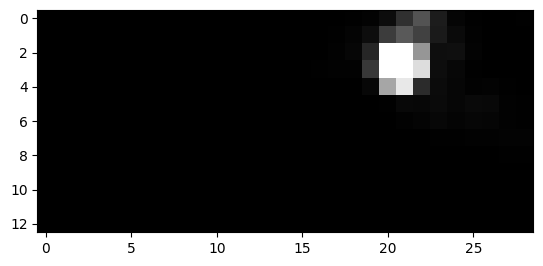

1844


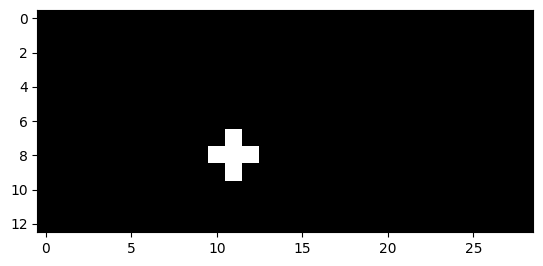

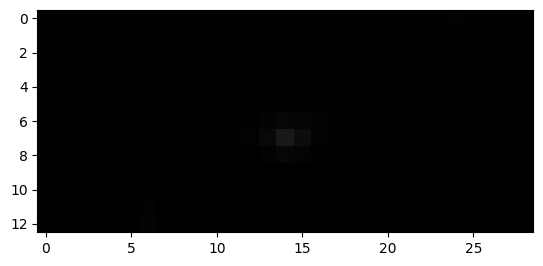

1845


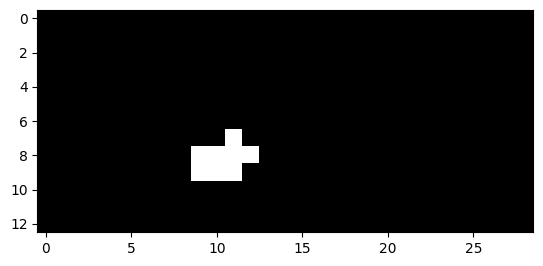

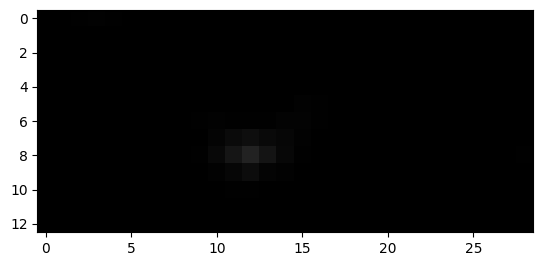

1846


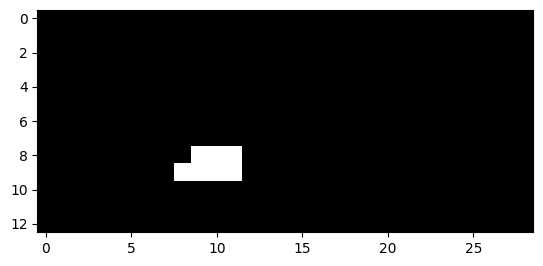

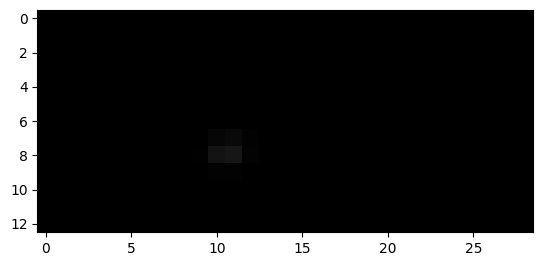

1847


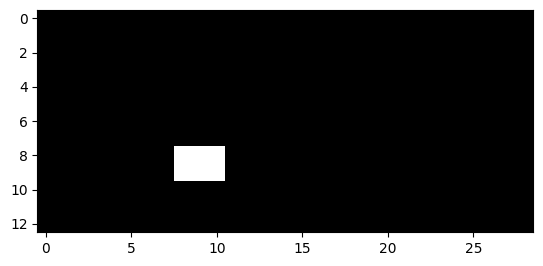

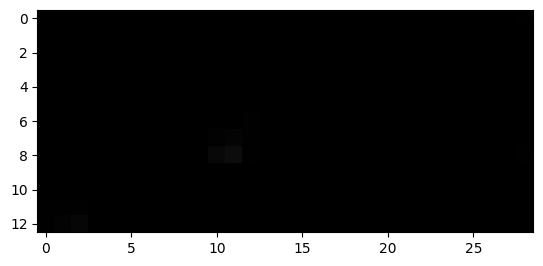

1848


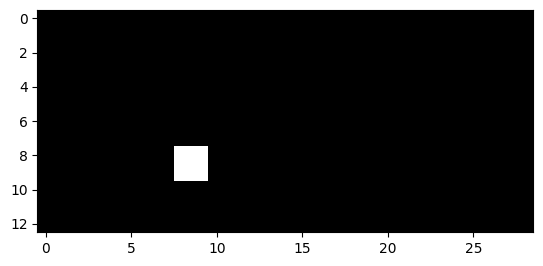

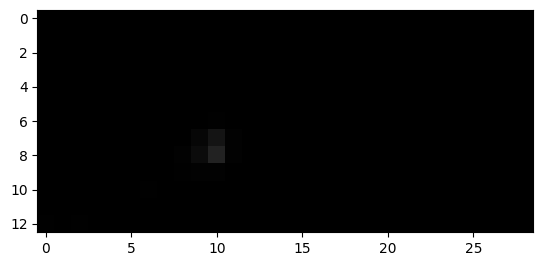

2121


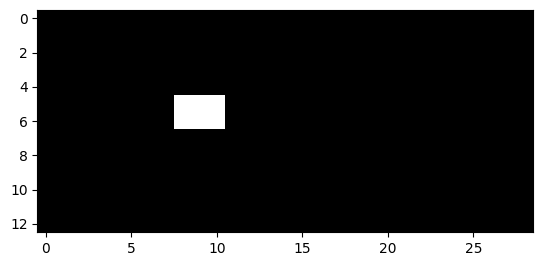

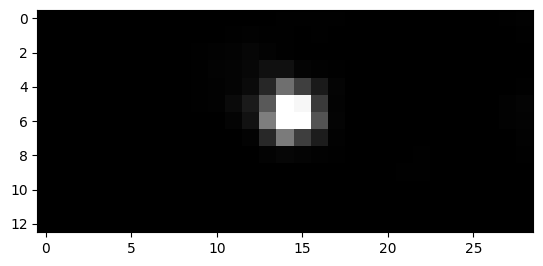

2122


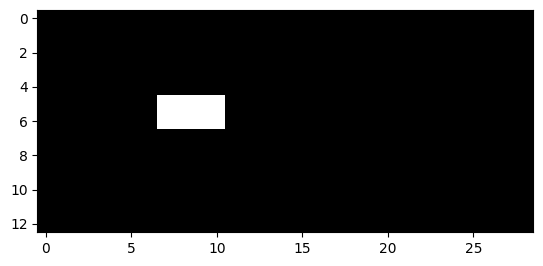

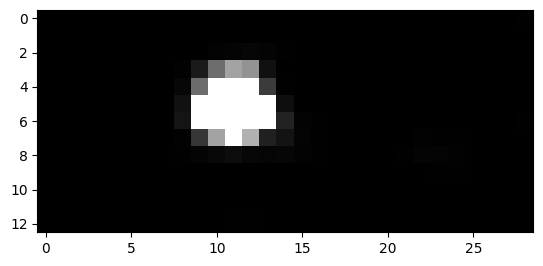

2123


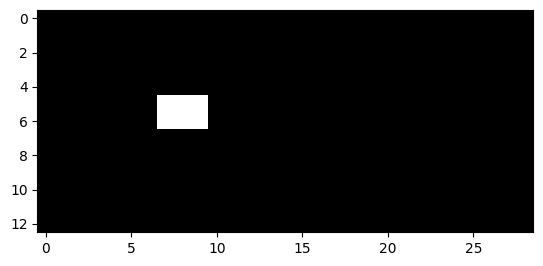

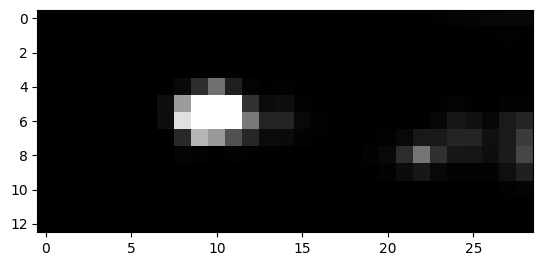

2125


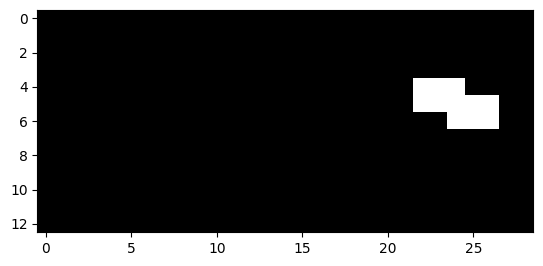

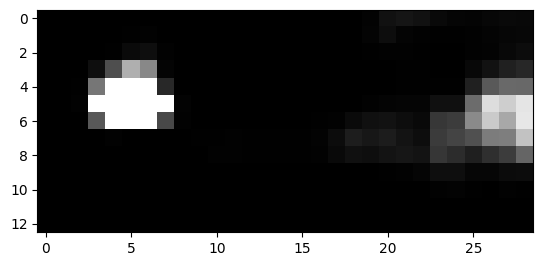

2126


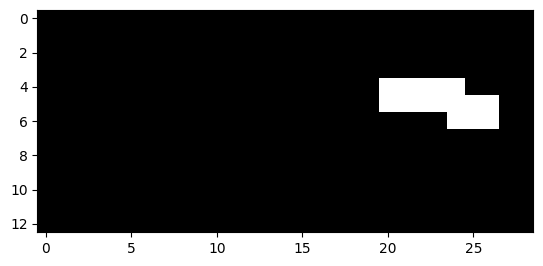

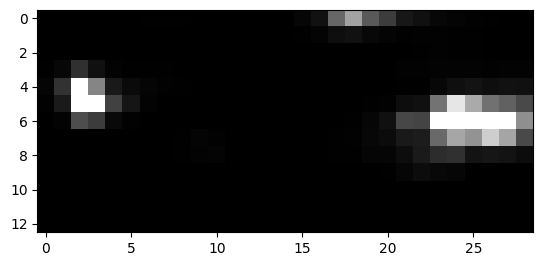

2127


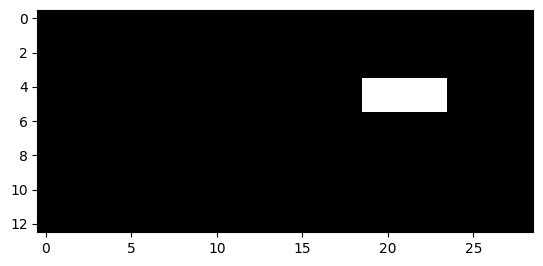

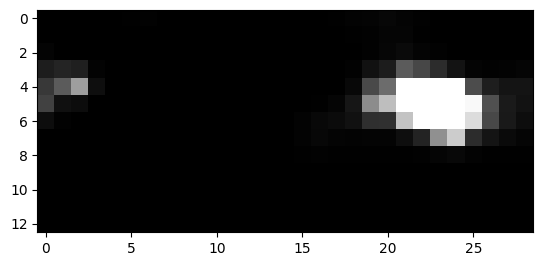

2128


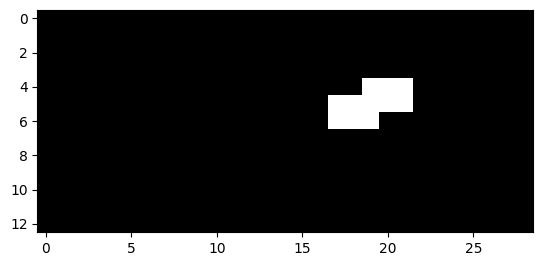

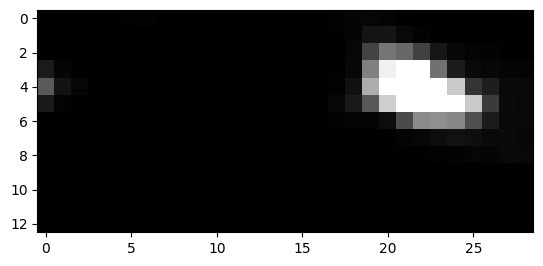

2129


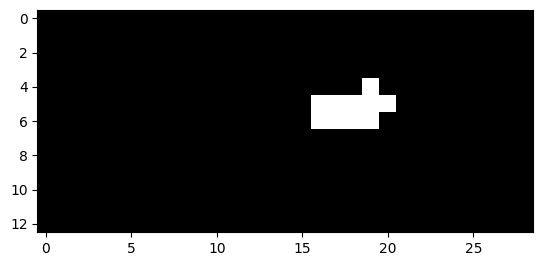

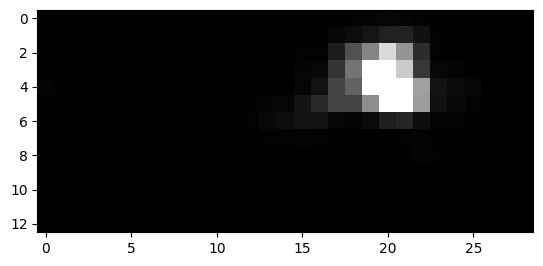

2130


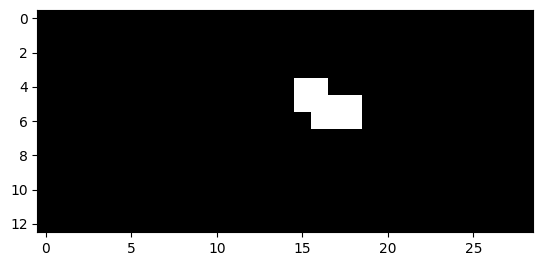

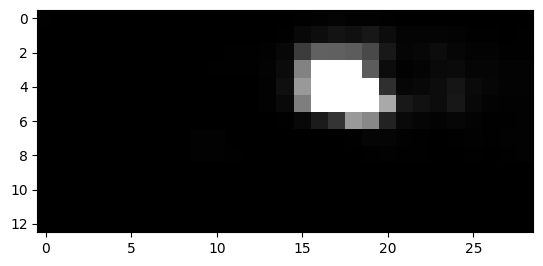

2131


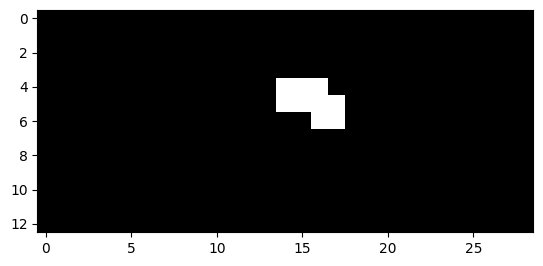

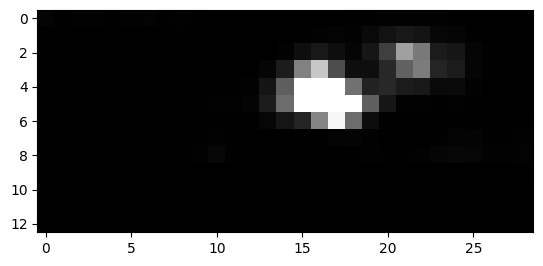

2132


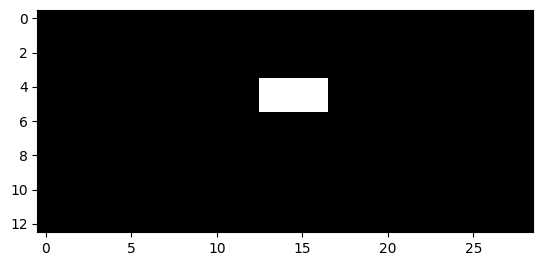

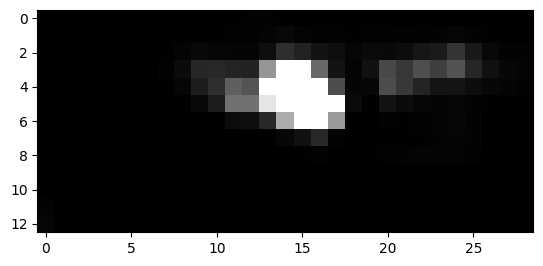

2133


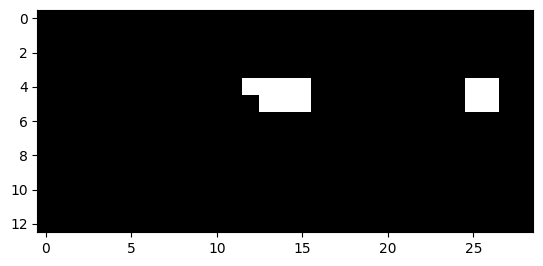

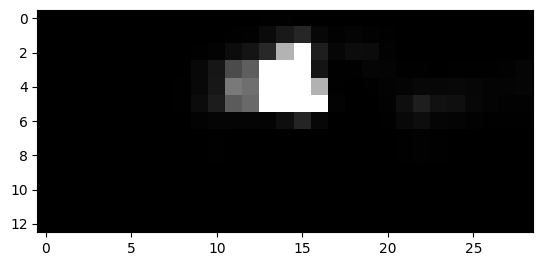

2134


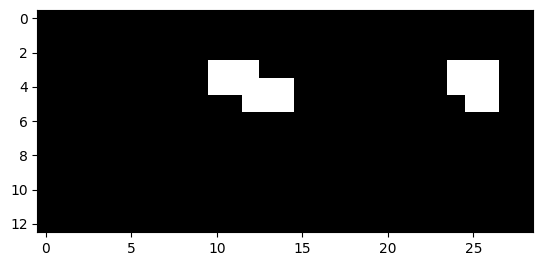

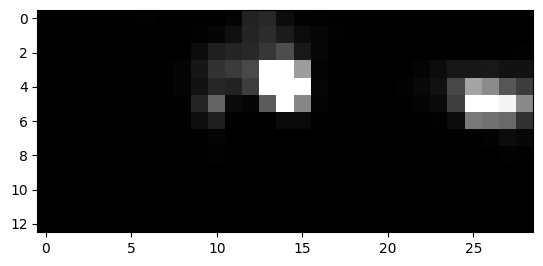

2135


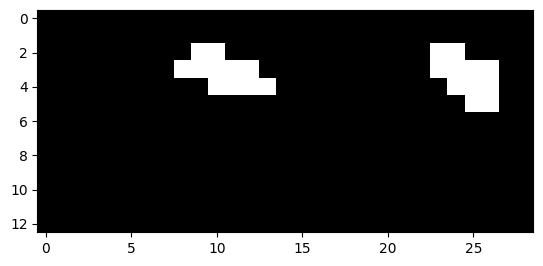

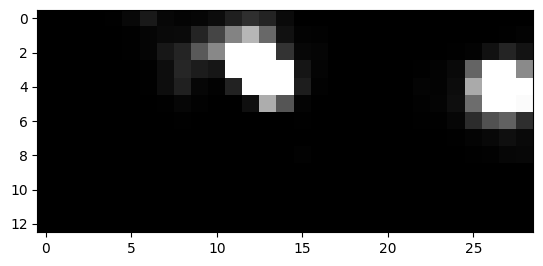

2136


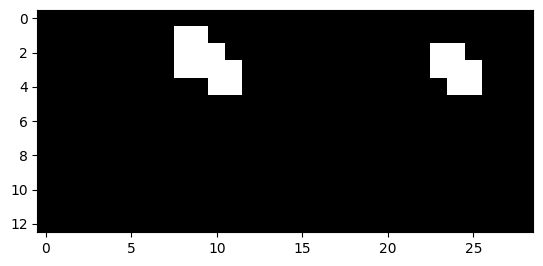

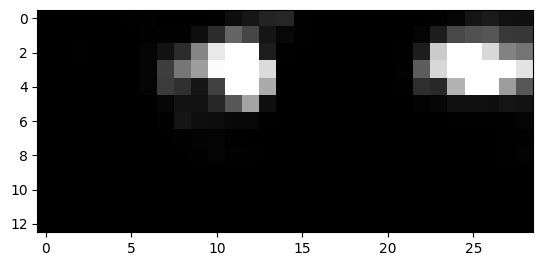

2137


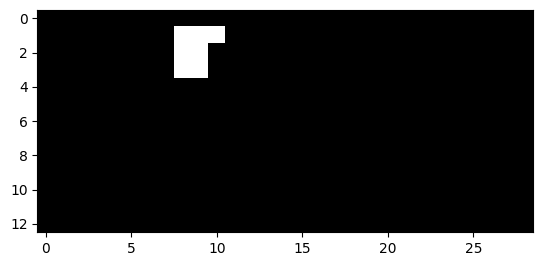

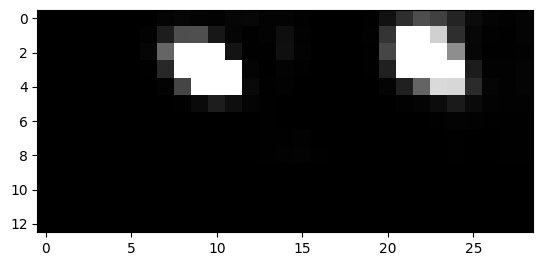

2138


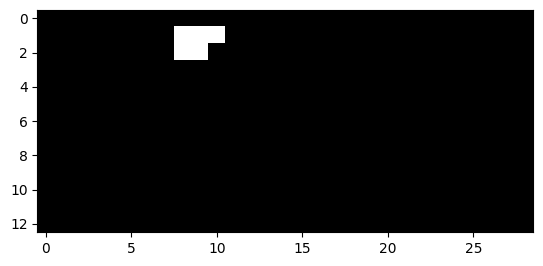

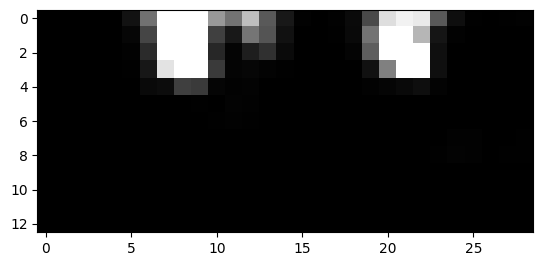

2142


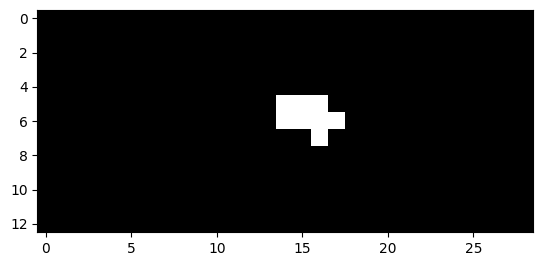

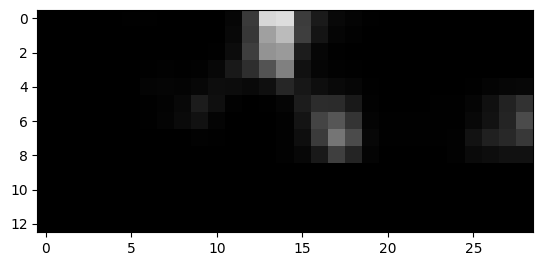

2143


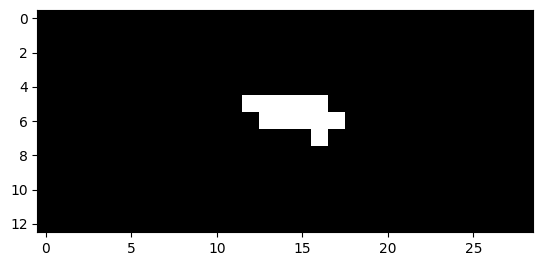

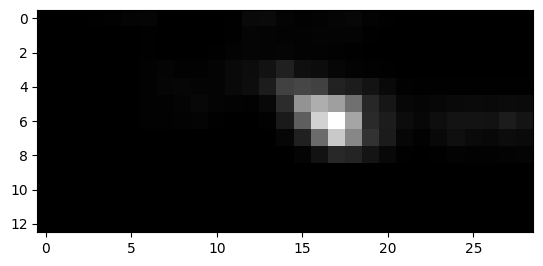

2144


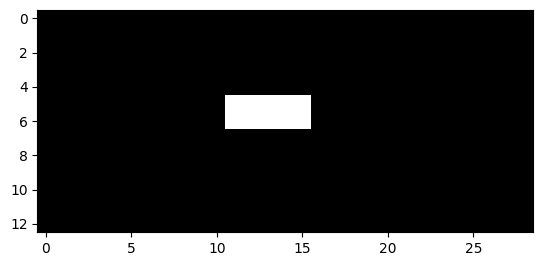

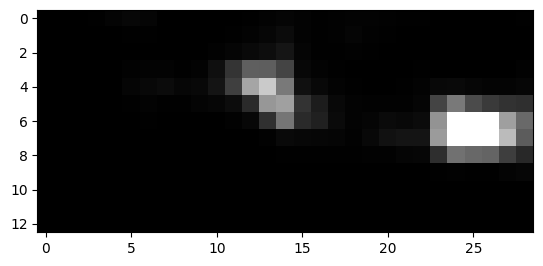

2145


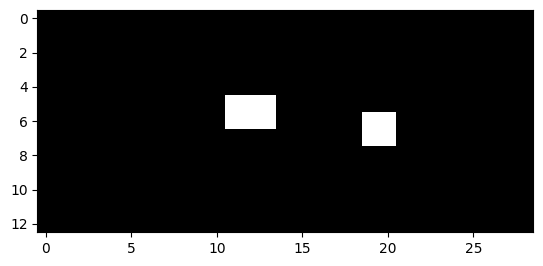

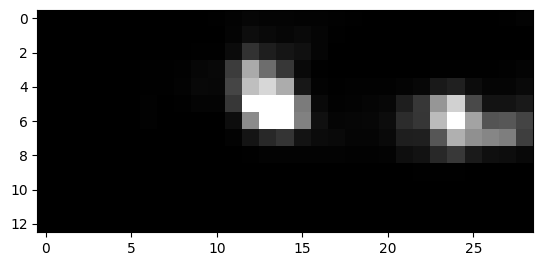

2146


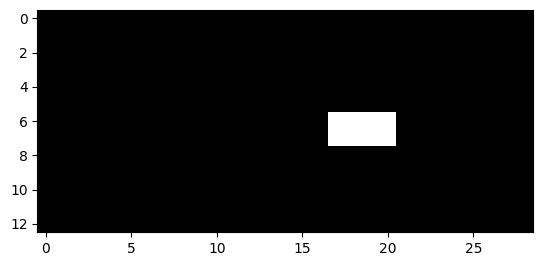

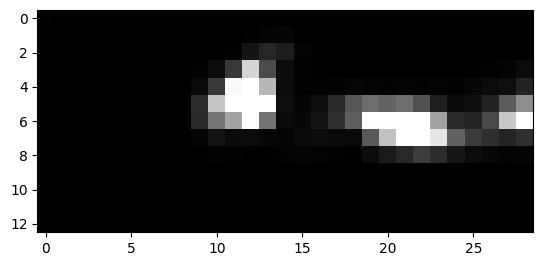

2147


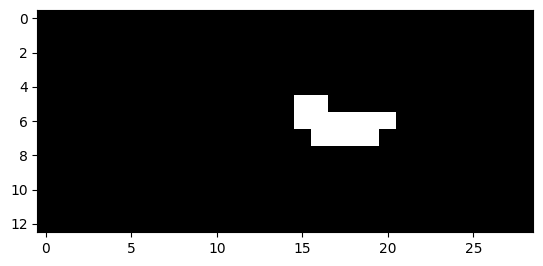

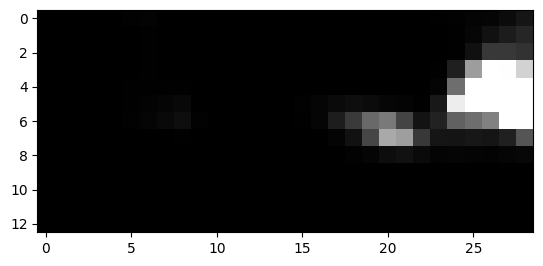

2148


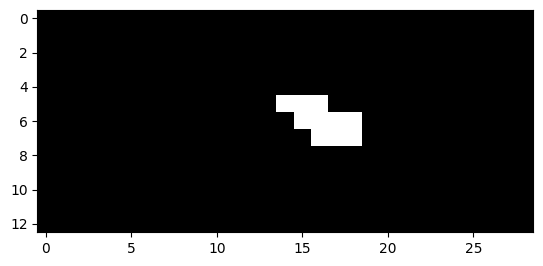

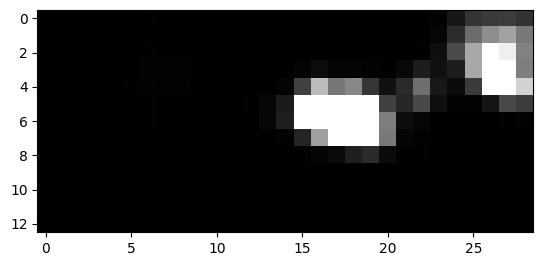

2149


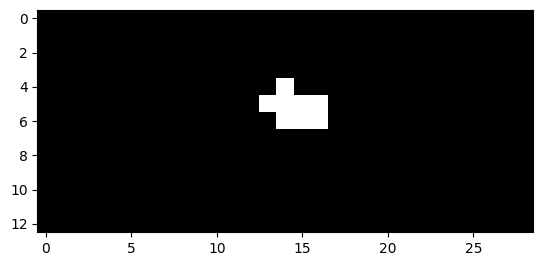

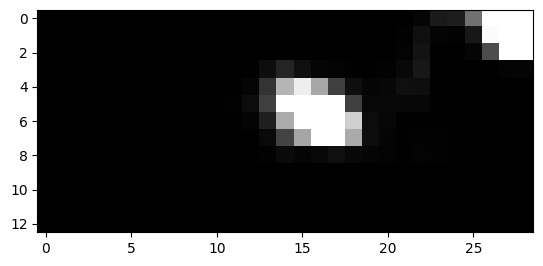

2150


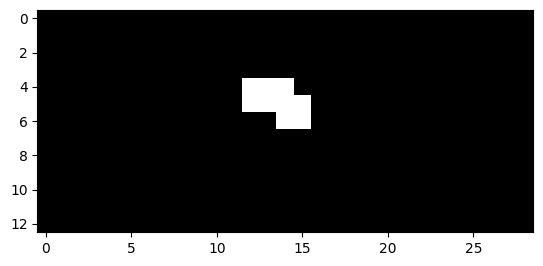

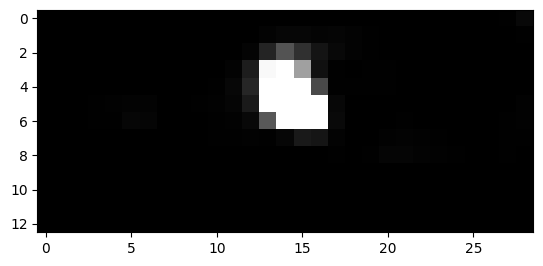

2151


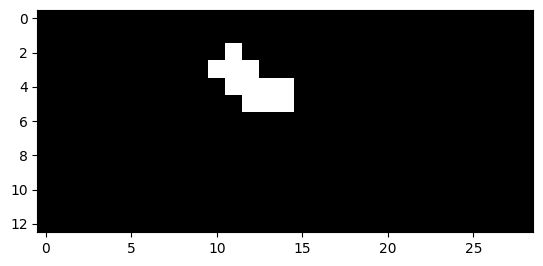

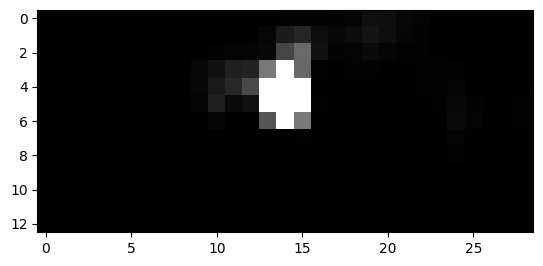

2152


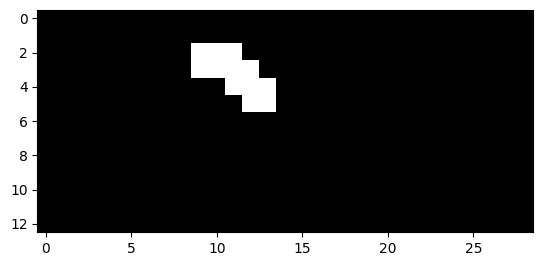

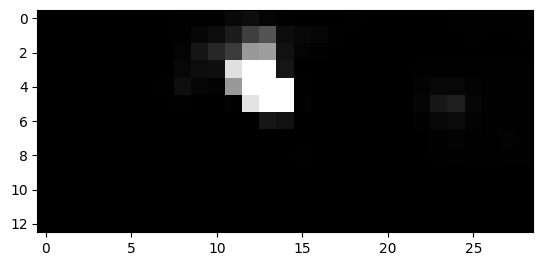

2153


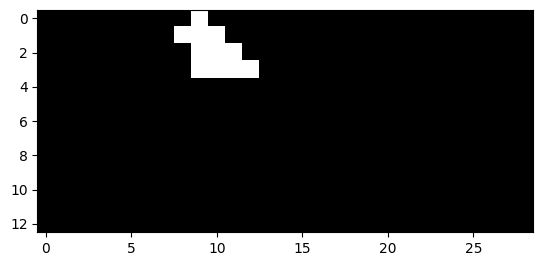

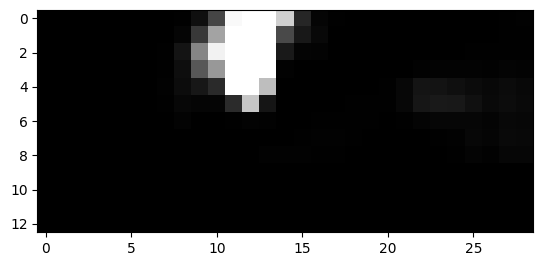

2154


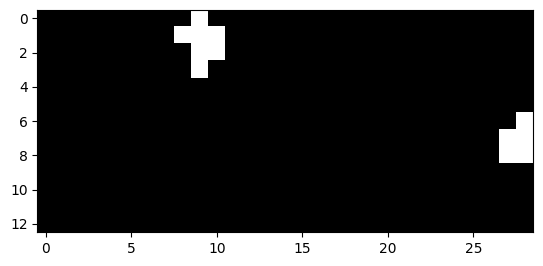

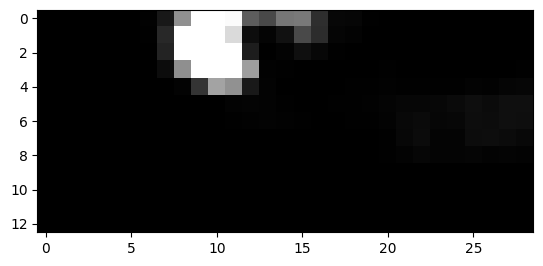

2155


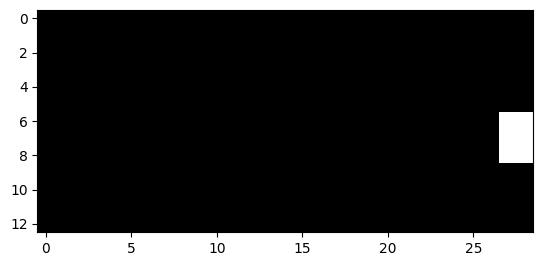

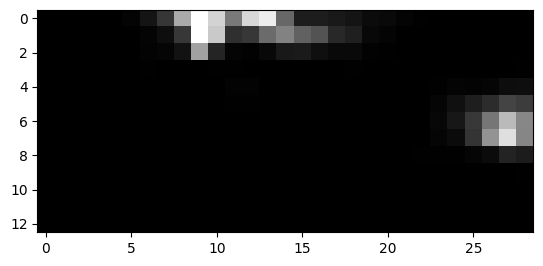

2156


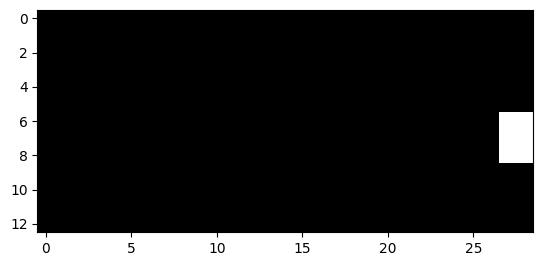

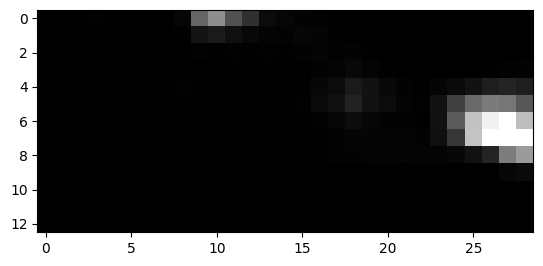

2165


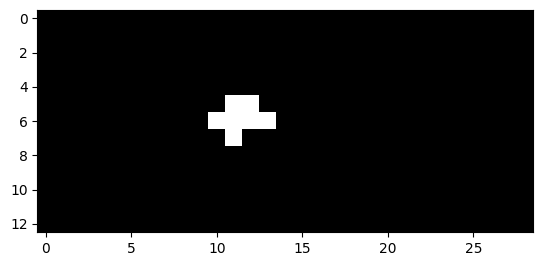

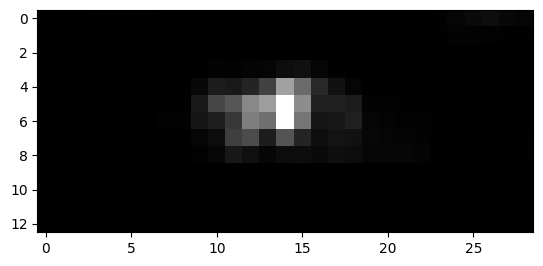

2166


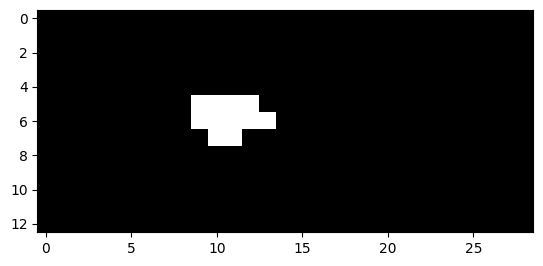

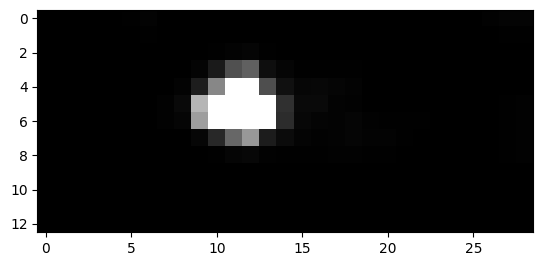

2167


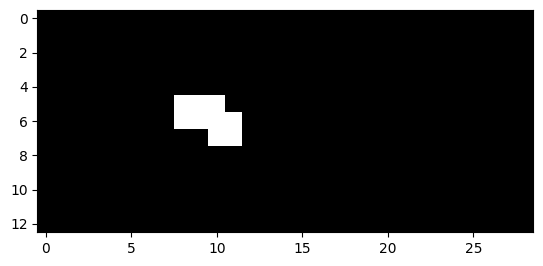

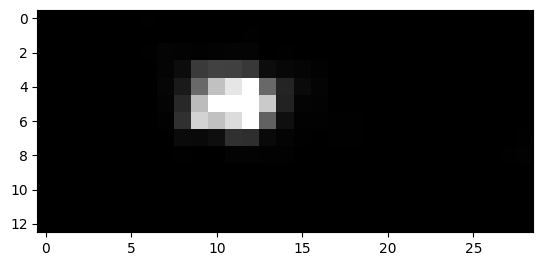

2168


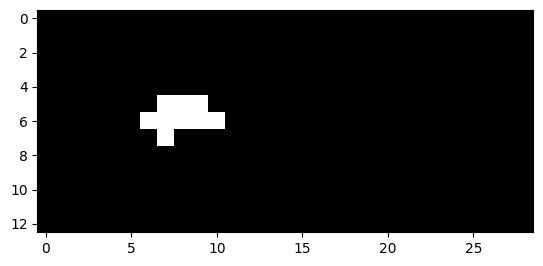

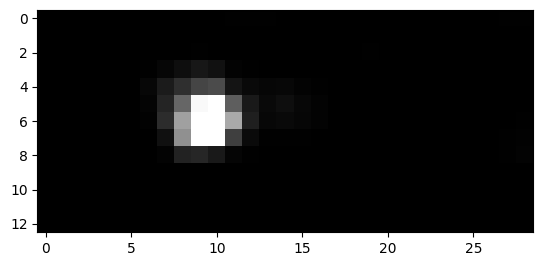

2169


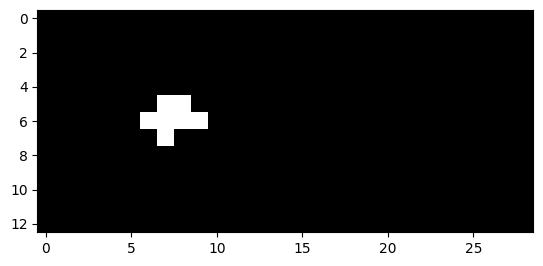

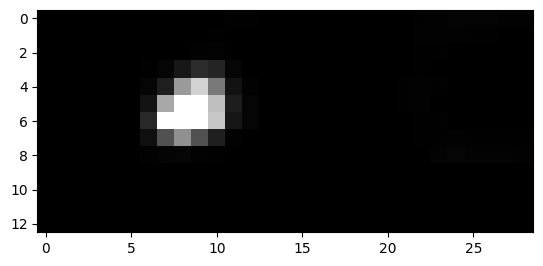

2170


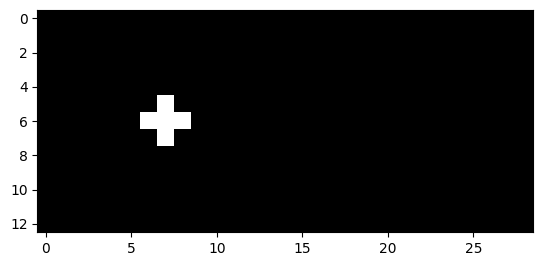

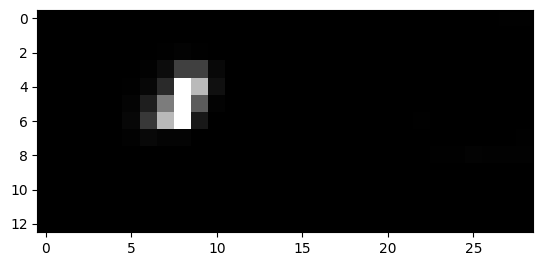

2173


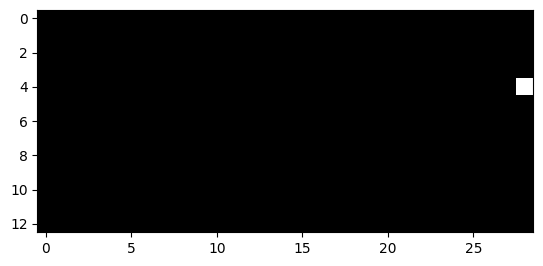

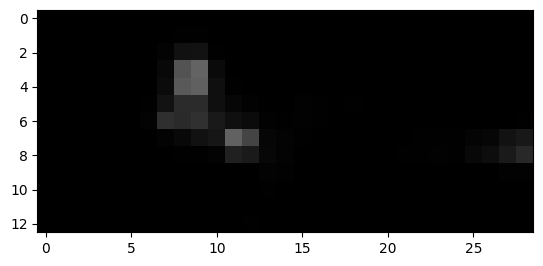

2174


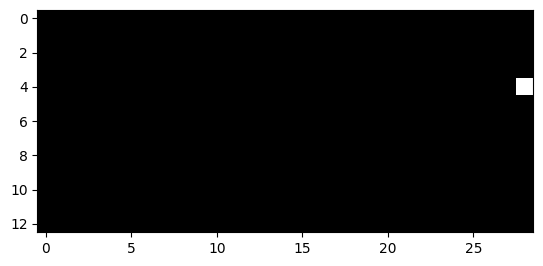

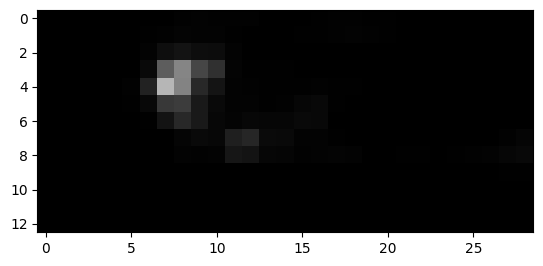

2180


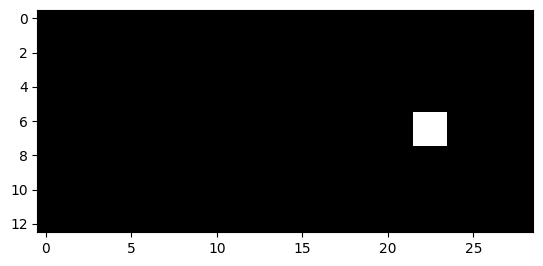

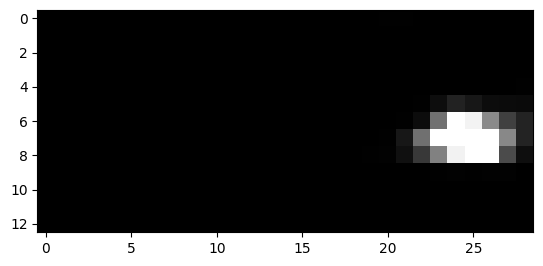

2181


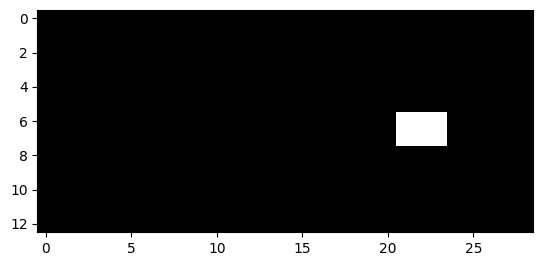

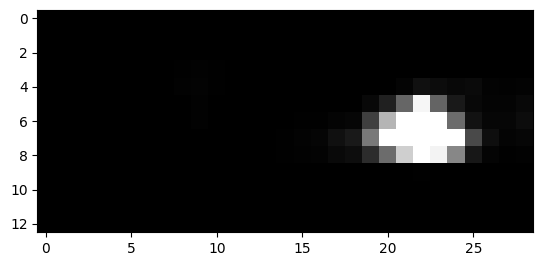

2182


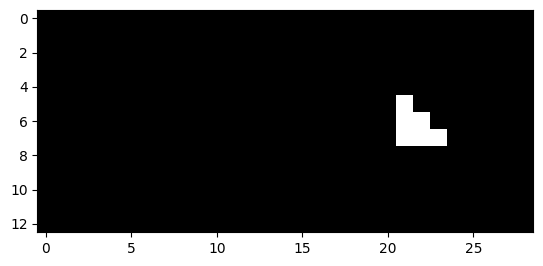

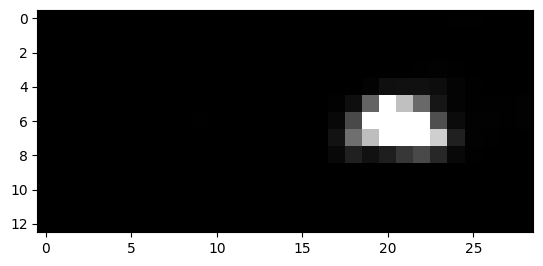

2183


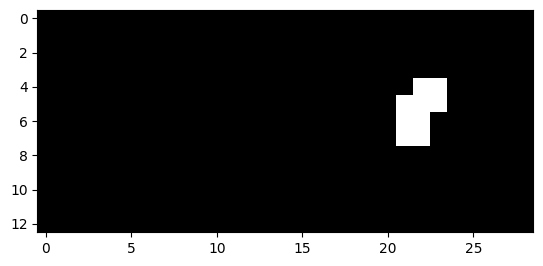

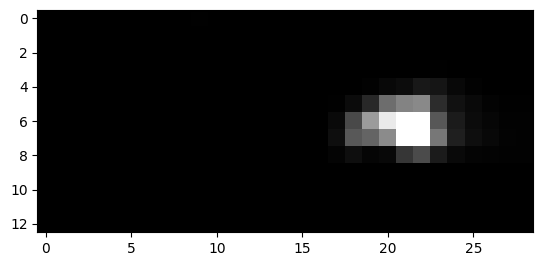

2184


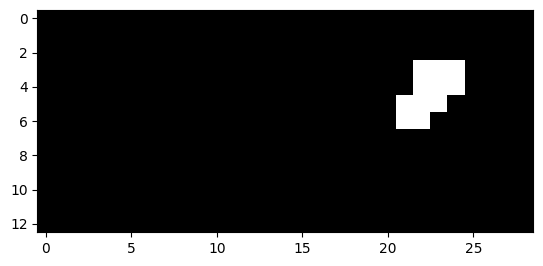

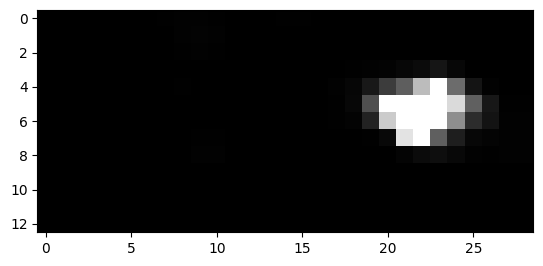

2185


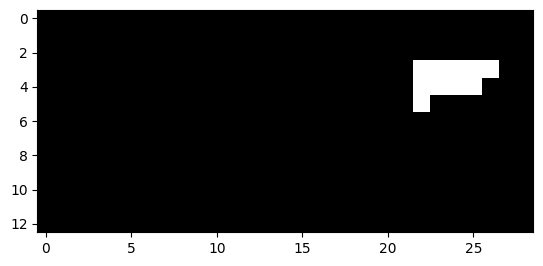

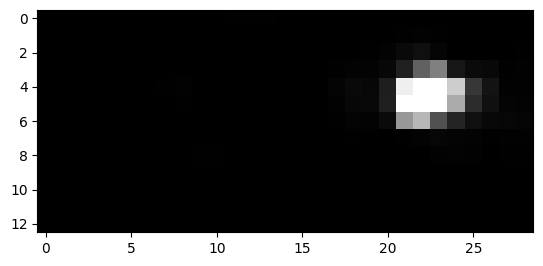

2186


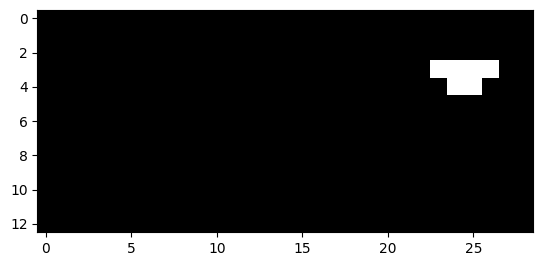

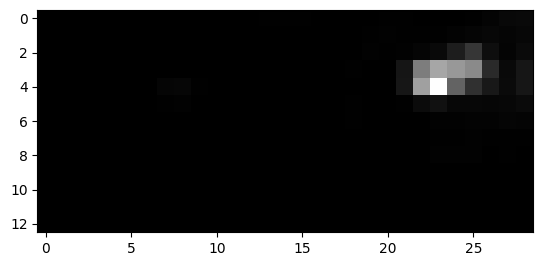

2187


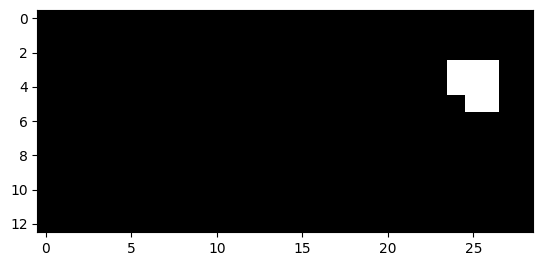

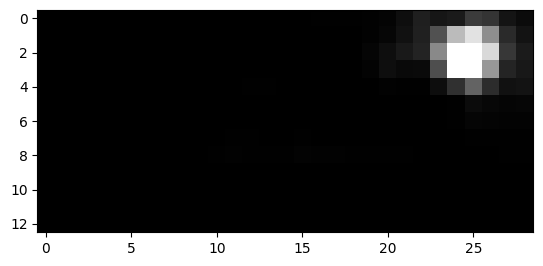

2188


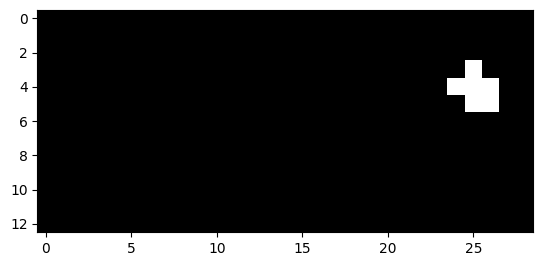

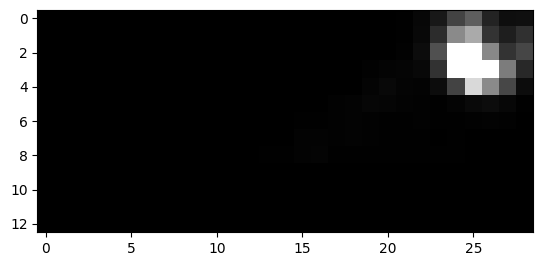

2189


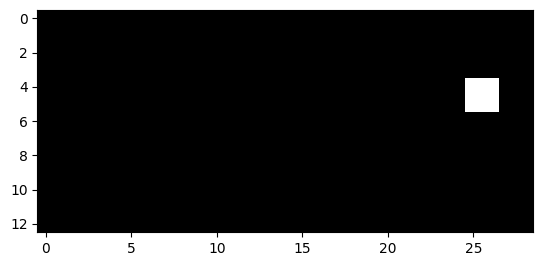

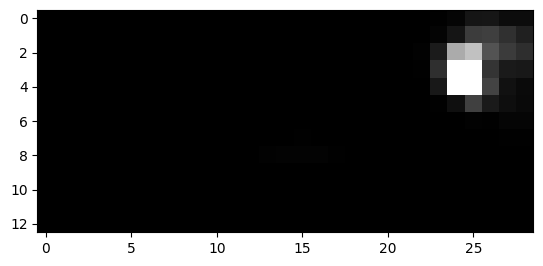

2190


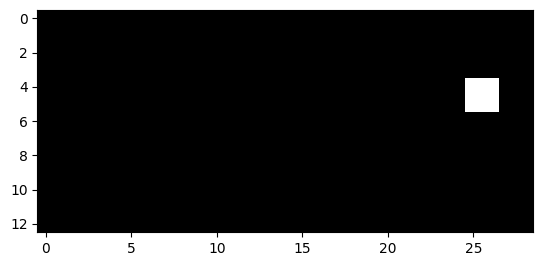

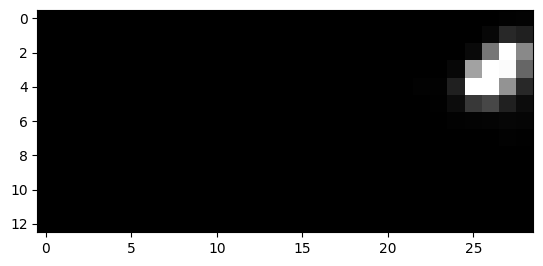

2213


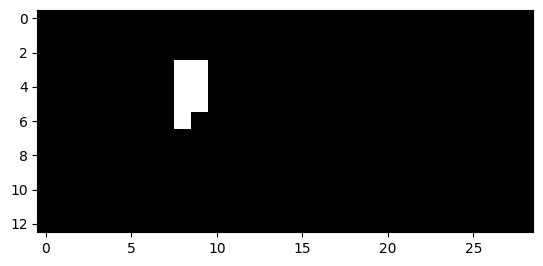

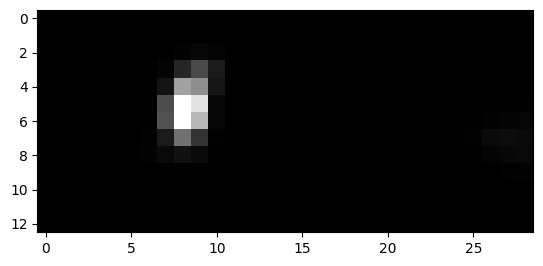

2214


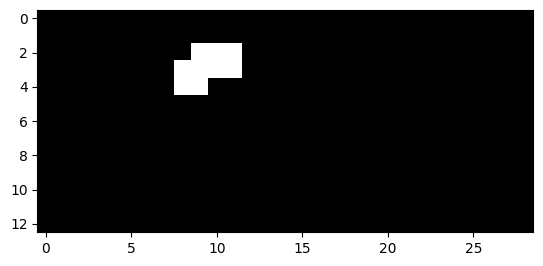

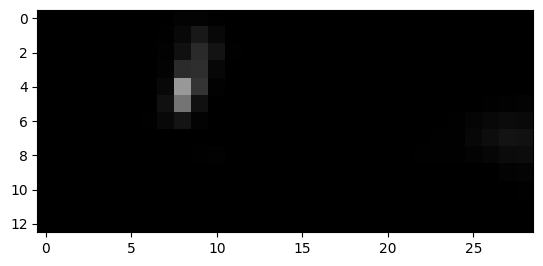

2215


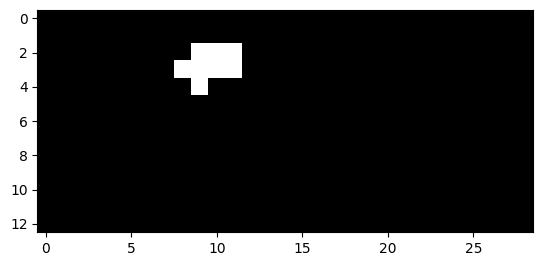

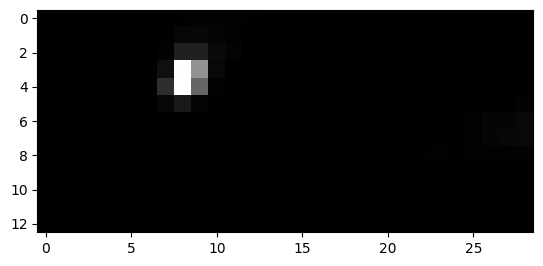

2225


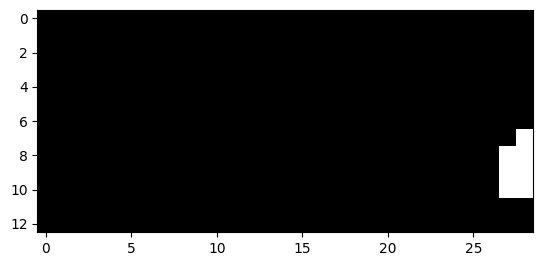

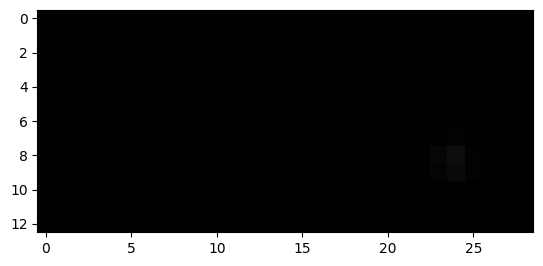

2226


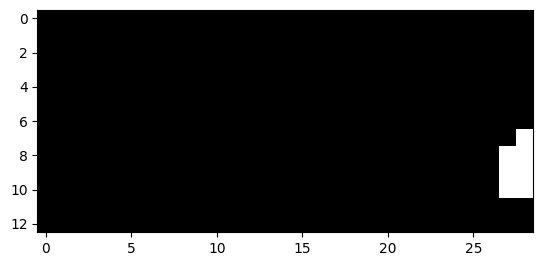

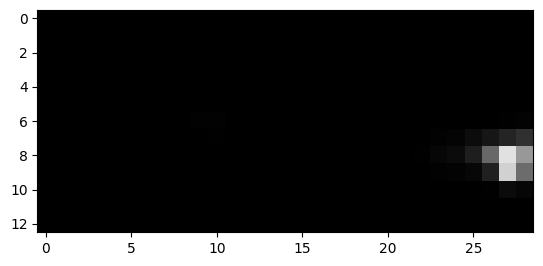

2227


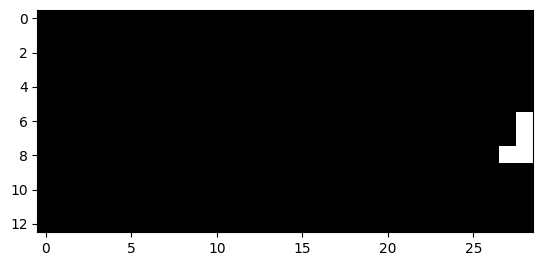

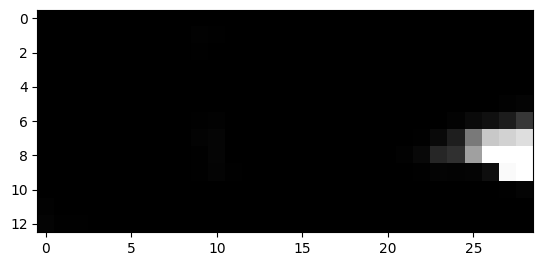

2228


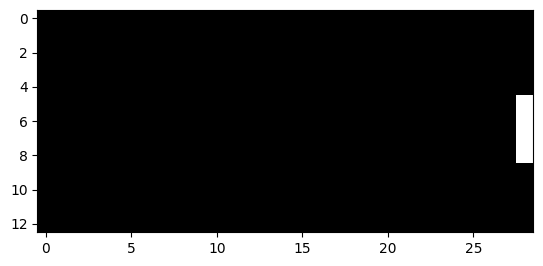

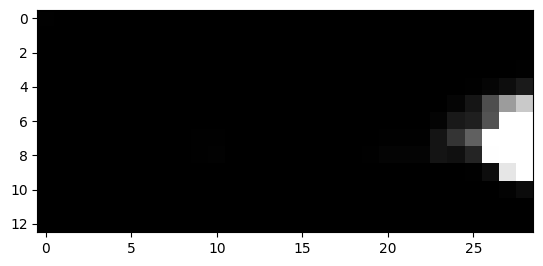

2229


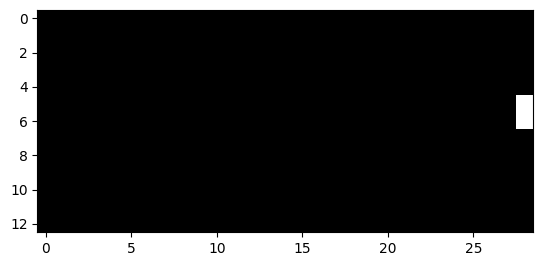

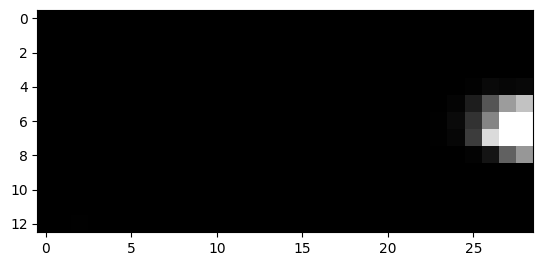

389


In [18]:
k=0
for i in range(len(y_test_img)): 
    if(np.max(y_test_img[i].reshape(-1))>0.1):
        print(i)
        plt.figure()
        plt.imshow(y_test_img[i], cmap = "gray", vmin=0, vmax=1)
        plt.show()
        plt.imshow(t[i], vmin=0, vmax=0.3, cmap = "gray")
        plt.show()
        k+=1
print(k)

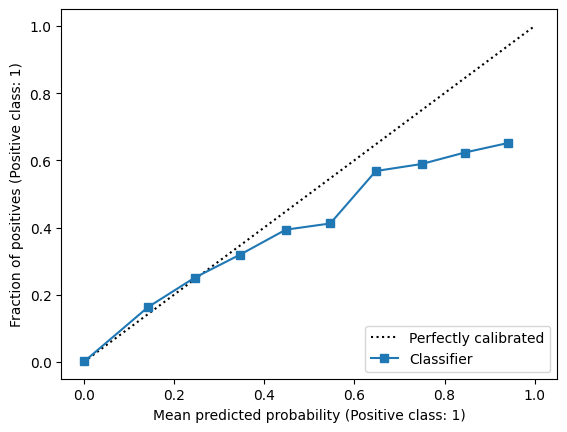

In [19]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)


In [22]:
from sklearn.metrics import brier_score_loss
### brier score con probabilità predette

print(f'All zeros Brier score: {brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1))))}')
print(f'Model Brier score: {brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1))}')

All zeros Brier score: 0.0035259368257102965
Model Brier score: 0.0027269690312729765


## another Model

In [30]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(9, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(9, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 29, 9)         738       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 15, 9)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 15, 9)          738       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 14, 30, 9)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 30, 1)         82        
                                                                 
 cropping2d_1 (Cropping2D)   (None, 13, 29, 1)        

In [31]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-02 09:08:01.080857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0480

2023-03-02 09:08:04.399642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 4s 9ms/step - loss: 0.0480 - val_loss: 0.0175
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0178 - val_loss: 0.0148
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0159 - val_loss: 0.0136
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0149 - val_loss: 0.0129
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0141 - val_loss: 0.0120
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0137 - val_loss: 0.0118
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0130 - val_loss: 0.0112
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0128 - val_loss: 0.0112
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0126 - val_loss: 0.0108
E

60/80 [=====================>........] - ETA: 0s

2023-03-02 09:11:04.988833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 0s 2ms/step


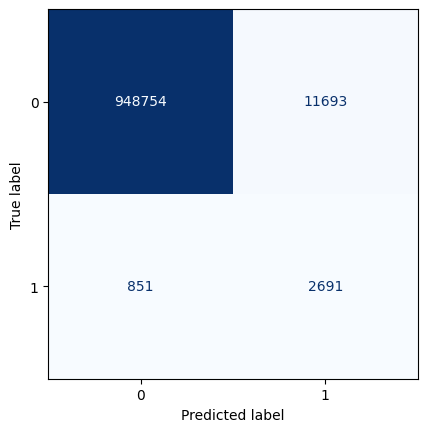

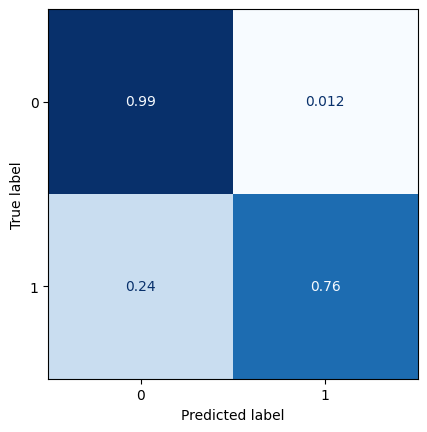

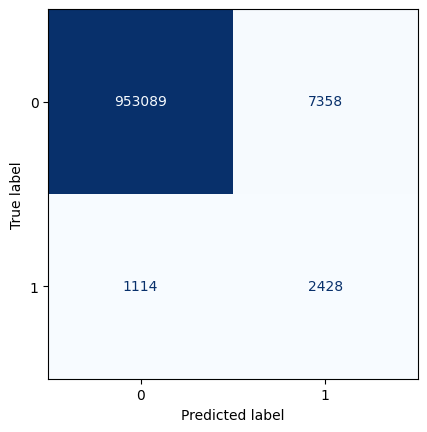

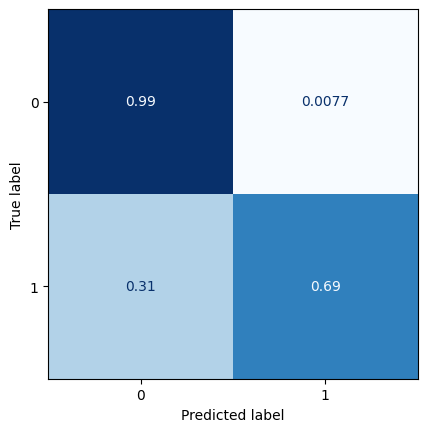

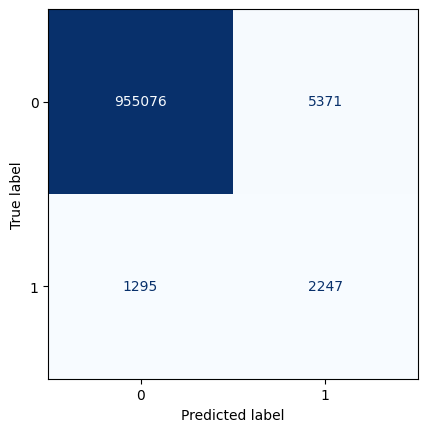

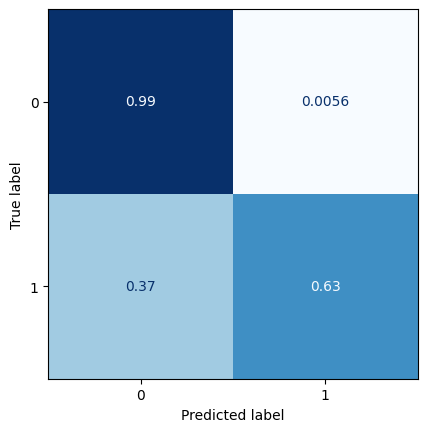

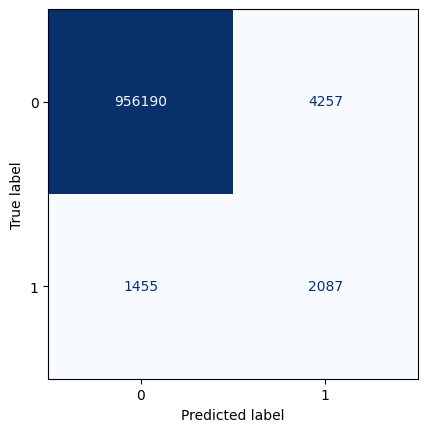

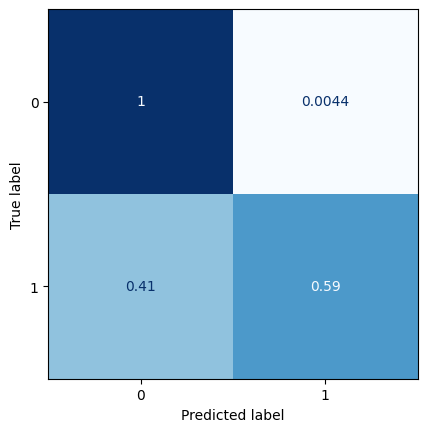

In [33]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    t = model.predict(test_img_std)
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

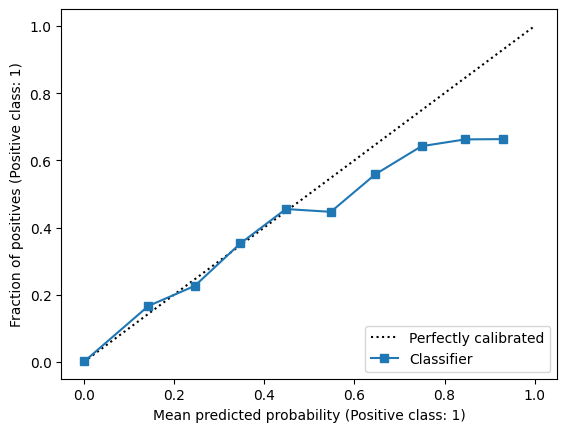

In [32]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)


## simpler model

In [36]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(4, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(4, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 13, 29, 4)         328       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 15, 4)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 15, 4)          148       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 30, 4)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 30, 1)         37        
                                                                 
 cropping2d_4 (Cropping2D)   (None, 13, 29, 1)        

In [37]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-02 09:12:18.037696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0980

2023-03-02 09:12:21.015715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0980 - val_loss: 0.0227
Epoch 2/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0231 - val_loss: 0.0177
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0199 - val_loss: 0.0159
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0184 - val_loss: 0.0151
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0175 - val_loss: 0.0146
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0168 - val_loss: 0.0144
Epoch 7/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0161 - val_loss: 0.0133
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0154 - val_loss: 0.0128
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0148 - val_loss: 0.0126
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0145 - val_loss: 0.0128
E

354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 82/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 83/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0105
Epoch 84/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 85/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0106
Epoch 86/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0105
Epoch 87/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 88/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 89/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0119 - val_loss: 0.0105
Epoch 90/100
354/354 [==============================] - 2s 7ms/step - loss: 0.0118 - val_loss: 

## Same of old target, only the sea

In [28]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d_1 (Cropping2D)   (None, 13, 29, 1)        

In [29]:
model.fit(train_img_std, y_train_img_sea, validation_data=(val_img_std,y_val_img_sea),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-09 13:32:09.165909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0316

2023-03-09 13:32:13.001550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 4s 10ms/step - loss: 0.0316 - val_loss: 0.0148
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0154 - val_loss: 0.0136
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0143 - val_loss: 0.0127
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0135 - val_loss: 0.0116
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0131 - val_loss: 0.0118
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0127 - val_loss: 0.0114
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0124 - val_loss: 0.0109
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0121 - val_loss: 0.0106
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0119 - val_loss: 0.0105


78/78 [==============================] - 0s 3ms/step


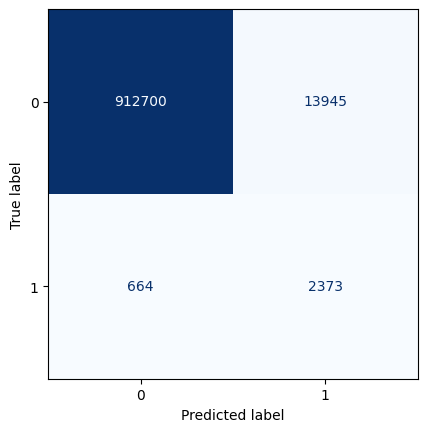

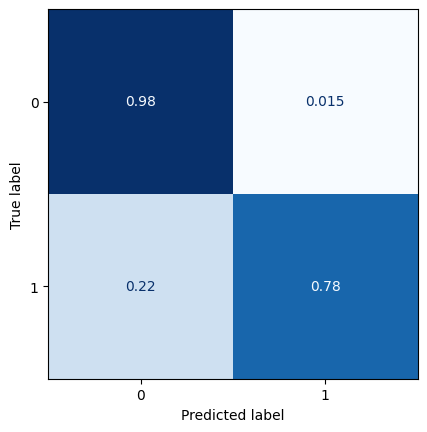

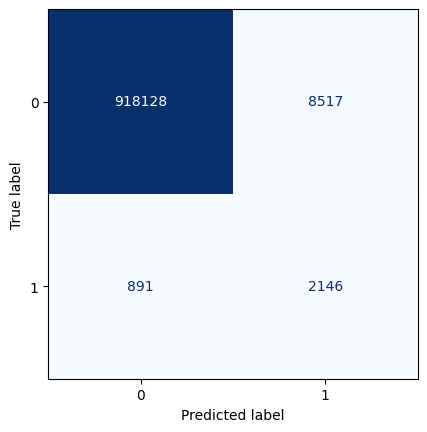

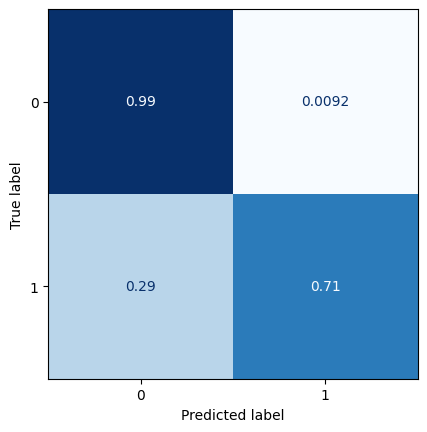

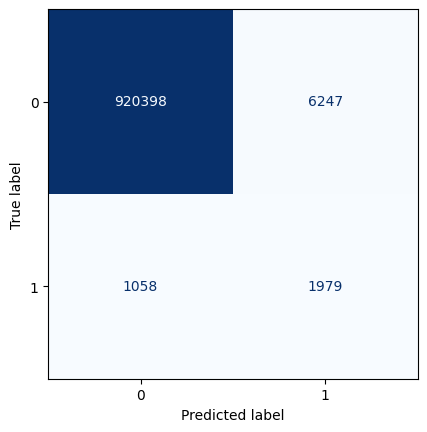

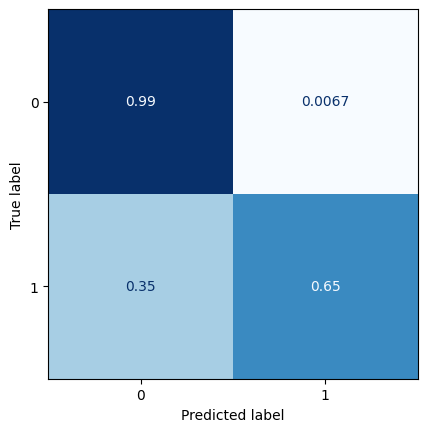

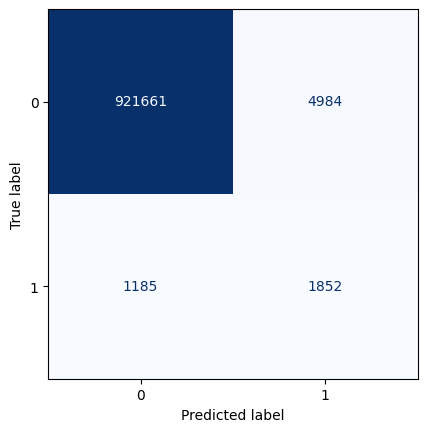

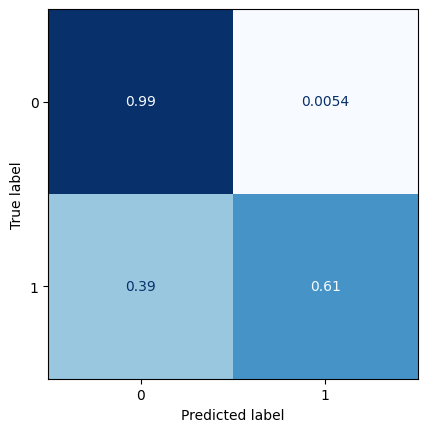

In [32]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img_sea.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img_sea.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

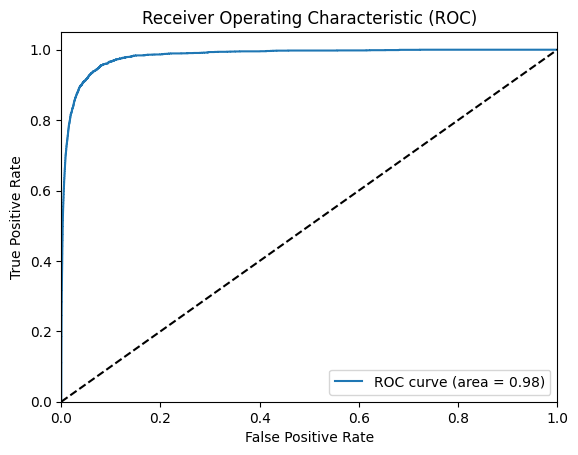

In [33]:
plot_roc(t.reshape(-1,1),y_test_img_sea.reshape(-1,1))

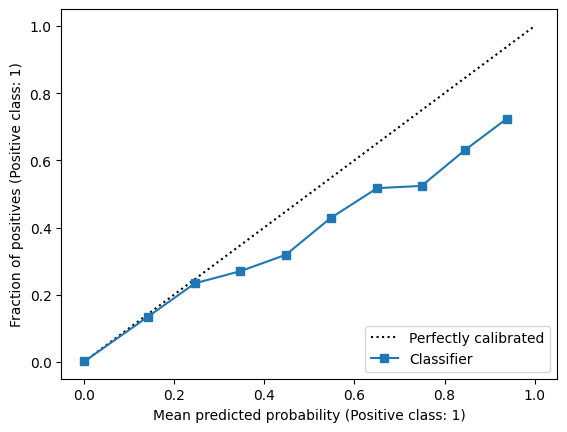

In [34]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test_img_sea.reshape(-1,1), t.reshape(-1,1), n_bins=10)


In [35]:
print(f'All zeros Brier score: {brier_score_loss(y_test_img_sea.reshape(-1,1), np.zeros(len(y_test_img_sea.reshape(-1,1))))}')
print(f'Model Brier score: {brier_score_loss(y_test_img_sea.reshape(-1,1), t.reshape(-1,1))}')


All zeros Brier score: 0.003266708401367349
Model Brier score: 0.0025659801358270803


# Higher threshold for class 1

In [48]:
train['target'] = train.apply(lambda x: 1 if x.Real_tom_target>=70 else 0,axis=1)
test['target'] = test.apply(lambda x: 1 if x.Real_tom_target>=70 else 0,axis=1)
val['target'] = val.apply(lambda x: 1 if x.Real_tom_target>=70 else 0,axis=1)

y_train = train.loc[:,['target','latitude','longitude','time']]
y_val = val.loc[:,['target','latitude','longitude','time']]
y_test = test.loc[:,['target','latitude','longitude','time']]

In [49]:
y_train_img = extract_images(y_train, variables, verbose=True)
y_val_img = extract_images(y_val, variables, verbose=True)
y_test_img = extract_images(y_test, variables, verbose=True)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [50]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 30, 1)         73        
                                                                 
 cropping2d_5 (Cropping2D)   (None, 13, 29, 1)        

In [51]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-03 18:00:45.946799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0302

2023-03-03 18:00:49.262493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 4s 9ms/step - loss: 0.0302 - val_loss: 0.0136
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0139 - val_loss: 0.0114
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0124 - val_loss: 0.0105
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0116 - val_loss: 0.0099
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0111 - val_loss: 0.0103
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0106 - val_loss: 0.0094
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0104 - val_loss: 0.0095
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0102 - val_loss: 0.0092
E

354/354 [==============================] - 3s 8ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 82/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 83/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 84/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 85/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 86/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 87/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 88/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 89/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 0.0084
Epoch 90/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0085 - val_loss: 

58/80 [====================>.........] - ETA: 0s

2023-03-03 18:05:13.678373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 0s 3ms/step


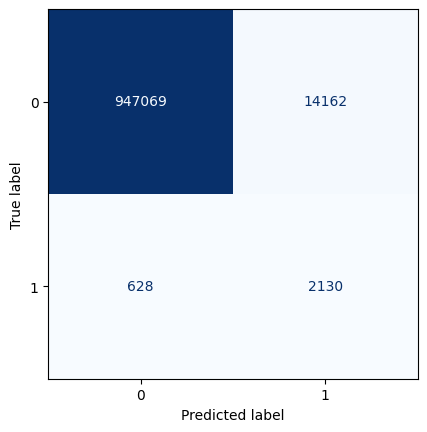

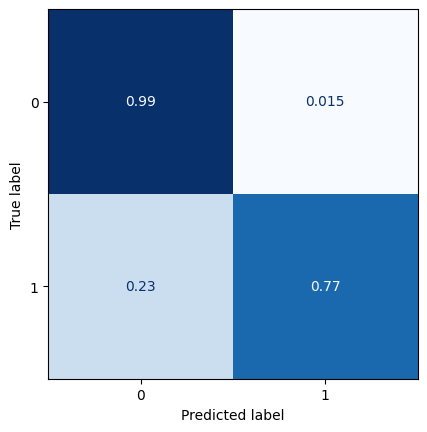

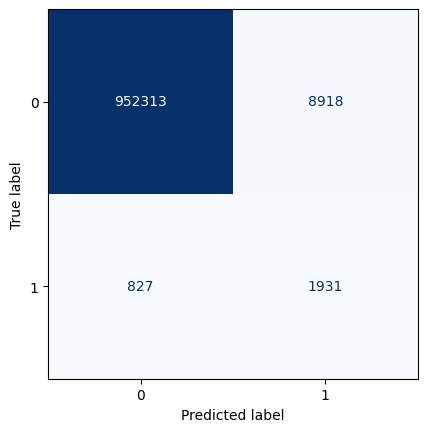

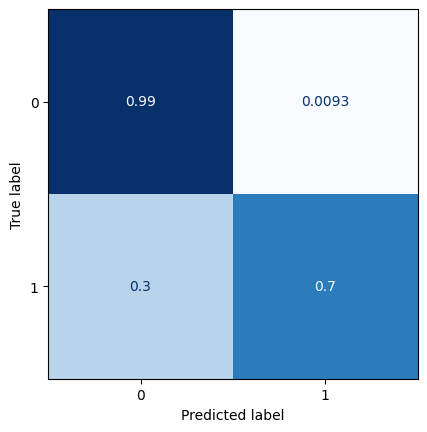

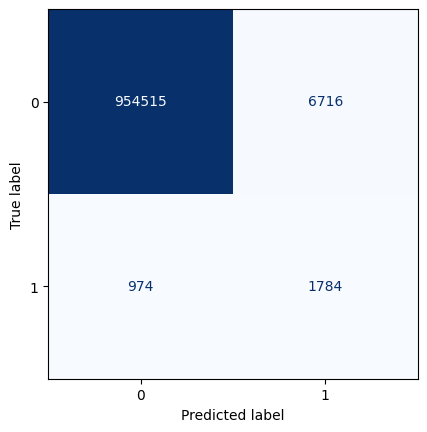

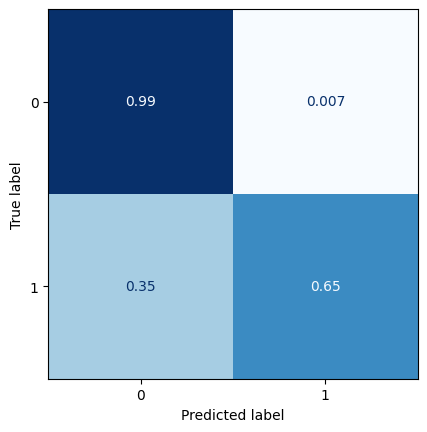

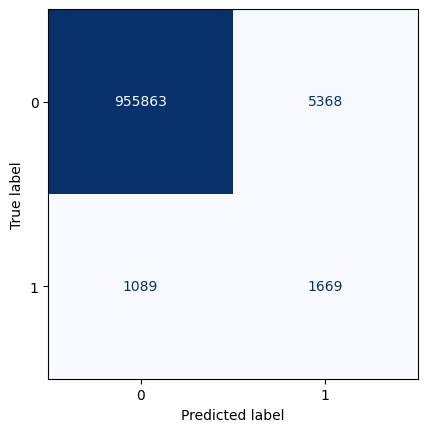

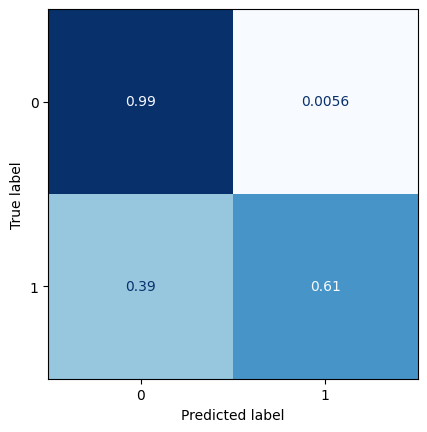

In [52]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

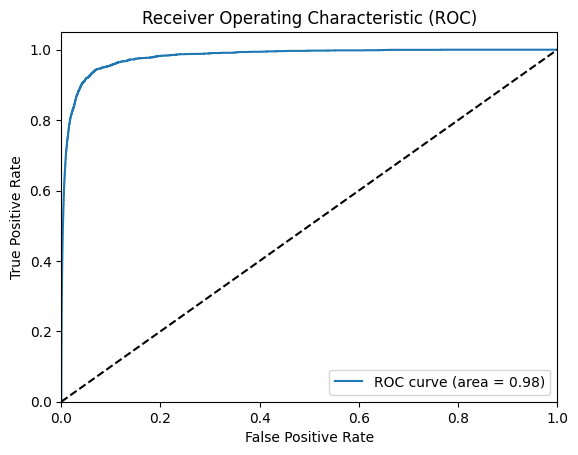

0.002396928127497421
0.0028610284972131425


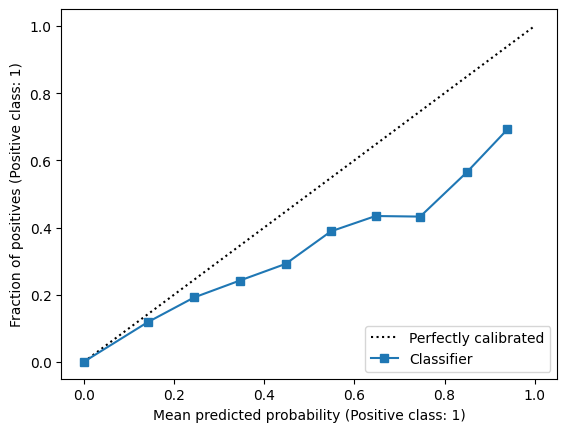

In [53]:
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))
print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))